In [71]:
import numpy as np
from pathlib import Path
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import pickle

In [2]:
path = Path.home() / 'Desktop' / 'pfc-3' / 'data'

data = loadmat(path / 'ELV007_1_1026.mat')['MatData'][0,0][0][0,:]
# data = loadmat(path / 'ADR001_1_3000.mat')['MatData'][0,0][0][0,:]

9 cue directions -> 12 trials -> 11 column names of the data matrix

11 columns:

Cue_onT | Sample_onT | trialnum | TS | IsMatch | fix | cuerate | cuedelay | samplerate | sampledelay | Reward_onT

In [6]:
# ELV monkey cue = 2, trial = 12
# column order inconsistent with what is shown above
matrix_column_names = list(data[0][0].dtype.fields.keys())
print(matrix_column_names)
matrix_column_names.index('TS')

['Cue_onT', 'Sample_onT', 'Reward_onT', 'trialnum', 'TS', 'IsMatch', 'fix', 'cuerate', 'cuedelay', 'samplerate', 'sampledelay']


4

## Retrieving metadata

In [9]:
metadata = pd.read_csv(Path.home()/'Desktop'/'spatial_task.csv')
metadata

Filename  Neuron     Task Training    Area  Cue_position   Cue_onT  \
0       ADR001_1    3000  SPATIAL      PRE  dorsal             1  1.286575   
1       ADR001_1    3000  SPATIAL      PRE  dorsal             1  1.299075   
2       ADR001_1    3000  SPATIAL      PRE  dorsal             1  1.275575   
3       ADR001_1    3000  SPATIAL      PRE  dorsal             1  1.818300   
4       ADR001_1    3000  SPATIAL      PRE  dorsal             1  1.429975   
...          ...     ...      ...      ...     ...           ...       ...   
284042  ELV182_1    2605  SPATIAL     POST  dorsal             9  1.059975   
284043  ELV182_1    2605  SPATIAL     POST  dorsal             9  1.065375   
284044  ELV182_1    2605  SPATIAL     POST  dorsal             9  1.074775   
284045  ELV182_1    2605  SPATIAL     POST  dorsal             9  1.065725   
284046  ELV182_1    2605  SPATIAL     POST  dorsal             9  1.066475   

        Sample_onT  Target_onT  Reward_onT  trialnum  IsMatch  
0         3.320800    0.000000    5.354975        13      0.0  
1         3.333250    0.000000    5.367450        22      1.0  
2         3.309825    0.000000    5.343975        34      0.0  
3         3.852500    0.000000    5.886725        54      1.0  
4         3.464175    0.000000    5.498350        82      1.0  
...            ...         ...         ...       ...      ...  
284042    3.094175    5.128400    6.012050       136      0.0  
284043    3.099600    5.133775    6.017525       148      0.0  
284044    3.108975    5.143200    6.043625       157      1.0  
284045    3.099950    5.134150    6.067875       183      0.0  
284046    3.100650    5.134850    6.068575       217      1.0  

[284047 rows x 12 columns]

In [10]:
print(f"Monkey ADR has {metadata[metadata.Filename.str.contains('ADR')].Neuron.unique().shape[0]} neurons")
print(f"Monkey BEN has {metadata[metadata.Filename.str.contains('BEN')].Neuron.unique().shape[0]} neurons")
print(f"Monkey ELV has {metadata[metadata.Filename.str.contains('ELV')].Neuron.unique().shape[0]} neurons")

Monkey ADR has 313 neurons
Monkey BEN has 419 neurons
Monkey ELV has 1158 neurons


In [11]:
ELV_df = metadata[metadata.Filename.str.contains('ELV')]

In [12]:
post_training_match_trials = ELV_df[(ELV_df.IsMatch==1.0) & (ELV_df.Training=='POST')]
post_training_match_trials.shape

(39154, 12)

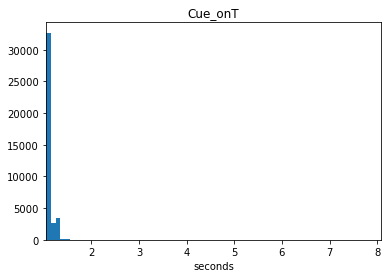

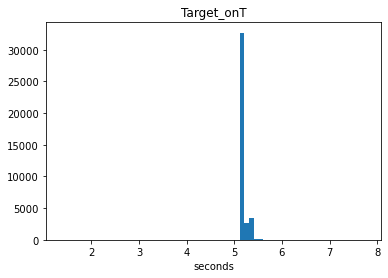

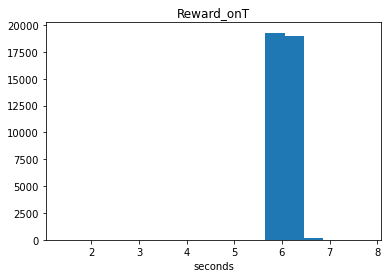

In [13]:
xlim = [post_training_match_trials.Cue_onT.min(), post_training_match_trials.Reward_onT.max()]

plt.title('Cue_onT')
plt.hist(post_training_match_trials.Cue_onT,bins=20)
plt.xlim(xlim)
plt.xlabel('seconds')
plt.show()

plt.title('Sample_onT')
plt.hist(post_training_match_trials.Sample_onT,bins=20)
plt.xlim(xlim)
plt.xlabel('seconds')
plt.show()

plt.title('Target_onT')
plt.hist(post_training_match_trials.Target_onT,bins=20)
plt.xlim(xlim)
plt.xlabel('seconds')
plt.show()

plt.title('Reward_onT')
plt.hist(post_training_match_trials.Reward_onT,bins=20)
plt.xlim(xlim)
plt.xlabel('seconds')
plt.show()

## Loading spike trains

In [14]:
post_training_match_trials

Filename  Neuron     Task Training    Area  Cue_position   Cue_onT  \
179082  ELV088_1    2001  SPATIAL     POST  dorsal             1  1.062900   
179083  ELV088_1    2001  SPATIAL     POST  dorsal             1  1.069300   
179085  ELV088_1    2001  SPATIAL     POST  dorsal             1  1.065825   
179088  ELV088_1    2001  SPATIAL     POST  dorsal             1  1.054450   
179089  ELV088_1    2001  SPATIAL     POST  dorsal             1  1.055900   
...          ...     ...      ...      ...     ...           ...       ...   
284036  ELV182_1    2605  SPATIAL     POST  dorsal             9  1.113950   
284039  ELV182_1    2605  SPATIAL     POST  dorsal             9  1.061000   
284041  ELV182_1    2605  SPATIAL     POST  dorsal             9  1.069050   
284044  ELV182_1    2605  SPATIAL     POST  dorsal             9  1.074775   
284046  ELV182_1    2605  SPATIAL     POST  dorsal             9  1.066475   

        Sample_onT  Target_onT  Reward_onT  trialnum  IsMatch  
179082    3.097125    5.131300    0.000000        25      1.0  
179083    3.103500    5.137725    0.000000        27      1.0  
179085    3.100025    5.134200    0.000000        49      1.0  
179088    3.088625    5.122825    0.000000        92      1.0  
179089    3.090125    5.124350    0.000000        98      1.0  
...            ...         ...         ...       ...      ...  
284036    3.148100    5.182325    6.032725        18      1.0  
284039    3.095175    5.129400    6.046475        69      1.0  
284041    3.103200    5.120750    5.987850       119      1.0  
284044    3.108975    5.143200    6.043625       157      1.0  
284046    3.100650    5.134850    6.068575       217      1.0  

[39154 rows x 12 columns]

In [15]:
data_path = Path.home() / 'Desktop' / 'pfc-3' / 'data'

In [16]:
def get_spike_trains(filepath, cue_directions, trialnums_list):

    data = loadmat(filepath)['MatData'][0,0][0][0,:]

    collected_spike_trains = []

    # Getting appropriate column indices
    matrix_column_names = list(data[0][0].dtype.fields.keys())
    trialnum_index = matrix_column_names.index('trialnum')
    TS_index = matrix_column_names.index('TS')

    # Looping through cue directions
    for cue in cue_directions:
        for trial in range(data[cue][0][0].shape[0]):
            # Only collecting spike trains with specified trialnums (e.g. match/non-match ones)
            if data[cue][0][0][trial][trialnum_index] in trialnums_list:
                collected_spike_trains.append(data[cue][0][0][trial][TS_index])

    return collected_spike_trains

In [17]:
def retrieve_ST_data_from_metadata(df, cue_directions):
    all_ST = {}
    for filename in tqdm(df.Filename.unique(), 'Loading spike times from Matlab files'):
        for neuron in df[df.Filename==filename].Neuron.unique():
            trialnums_list = df[(df.Filename==filename) & (df.Neuron==neuron)].trialnum.to_list()
            try:
                ST = get_spike_trains(data_path/f'{filename}_{neuron}.mat', cue_directions, trialnums_list)
            except:
                print(f'ERROR: {filename}_{neuron}. Continuing...')
                continue
            all_ST[f'{filename}_{neuron}'] = ST
    return all_ST

In [18]:
cue_directions = [i for i in range(9)]

all_ST = retrieve_ST_data_from_metadata(post_training_match_trials, cue_directions)

Loading spike times from Matlab files: 100%|██████████| 105/105 [00:10<00:00, 10.00it/s]


In [19]:
all_ST.keys()

dict_keys(['ELV088_1_2001', 'ELV088_1_2002', 'ELV088_1_2003', 'ELV089_1_2004', 'ELV089_1_2006', 'ELV090_1_2007', 'ELV090_1_2008', 'ELV091_1_2011', 'ELV091_1_2012', 'ELV091_1_2014', 'ELV091_1_2015', 'ELV091_1_2016', 'ELV091_1_2017', 'ELV092_1_2018', 'ELV092_1_2020', 'ELV092_1_2021', 'ELV093_1_2022', 'ELV093_1_2023', 'ELV094_1_2024', 'ELV095_1_2025', 'ELV095_1_2026', 'ELV095_1_2028', 'ELV095_1_2029', 'ELV095_1_2031', 'ELV095_1_2035', 'ELV096_1_2032', 'ELV097_1_2033', 'ELV097_1_2036', 'ELV098_1_2039', 'ELV099_1_2042', 'ELV099_1_2045', 'ELV099_1_2046', 'ELV099_1_2047', 'ELV099_1_2048', 'ELV100_1_2049', 'ELV101_1_2051', 'ELV102_1_2052', 'ELV102_1_2054', 'ELV102_1_2056', 'ELV103_1_2057', 'ELV103_1_2059', 'ELV103_1_2060', 'ELV103_1_2061', 'ELV103_1_2065', 'ELV103_1_2066', 'ELV103_1_2067', 'ELV103_1_2068', 'ELV103_1_2069', 'ELV104_1_2070', 'ELV104_1_2071', 'ELV104_1_2078', 'ELV104_1_2079', 'ELV105_1_2080', 'ELV105_1_2081', 'ELV105_1_2082', 'ELV105_1_2084', 'ELV105_1_2087', 'ELV105_1_2088', 'EL

In [20]:
# Converting numpy arrays into lists to plot with plt.eventplot
def get_spike_trains_as_list(spike_trains):
    list_spikes = [spike_trains[i].tolist() for i in range(len(spike_trains))]
    list_spikes_formatted = []
    for elem in list_spikes:
        try:
            list_spikes_formatted.append(elem[0])
        except:
            list_spikes_formatted.append(elem)
    return list_spikes_formatted

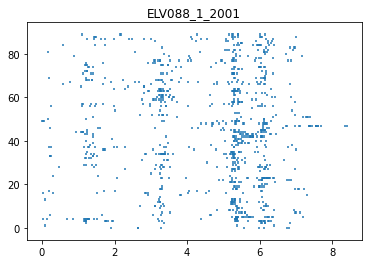

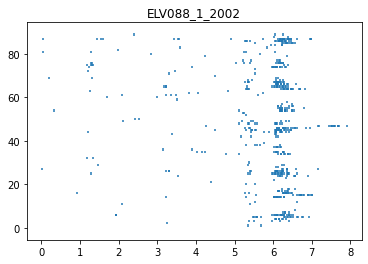

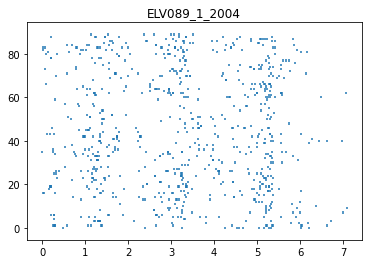

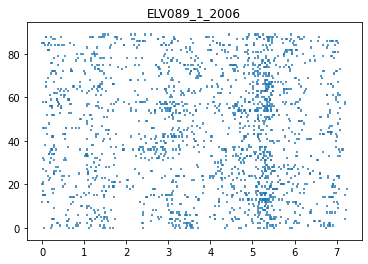

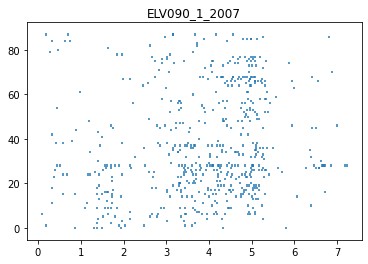

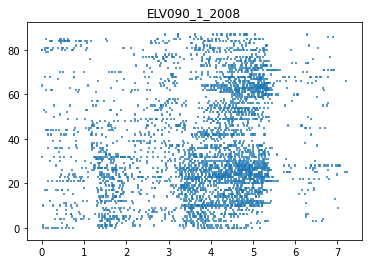

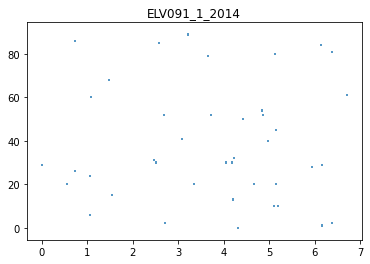

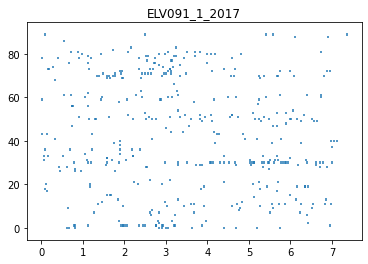

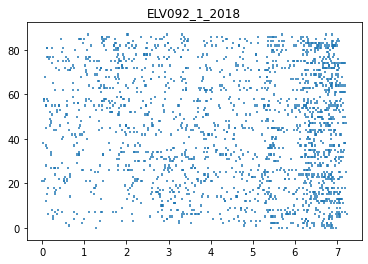

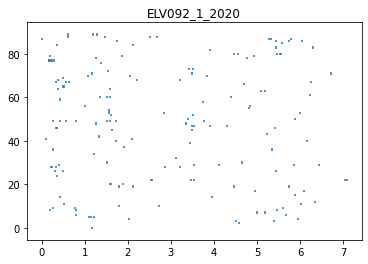

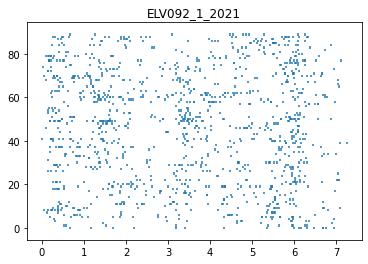

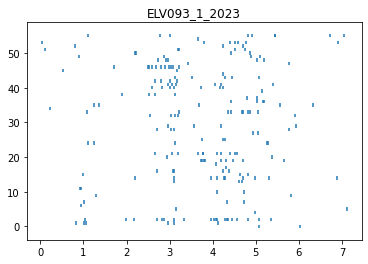

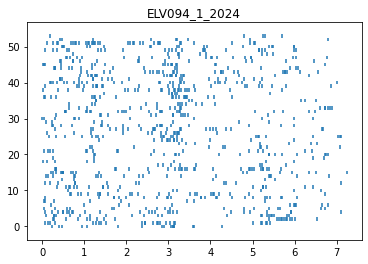

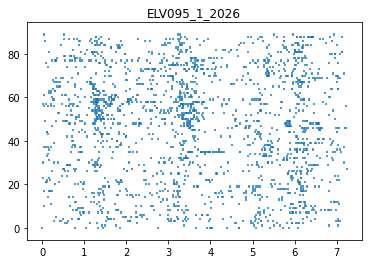

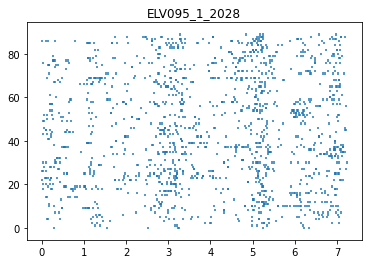

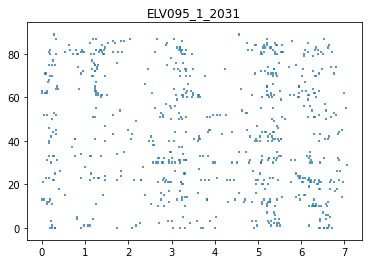

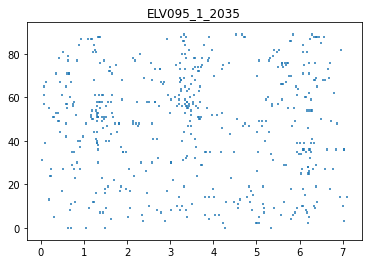

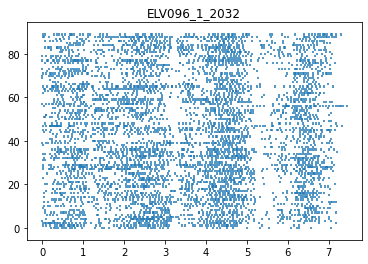

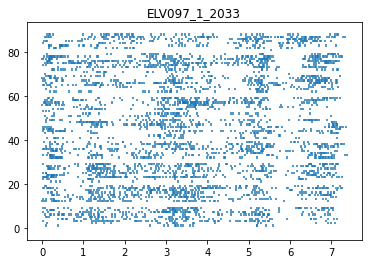

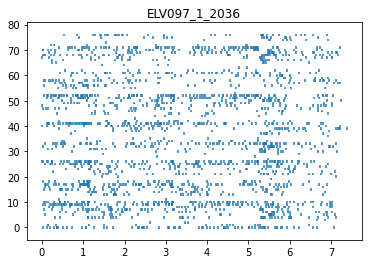

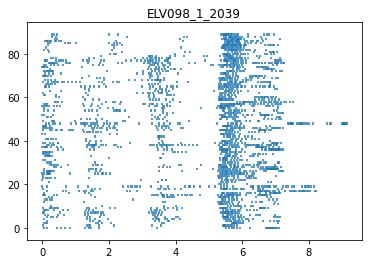

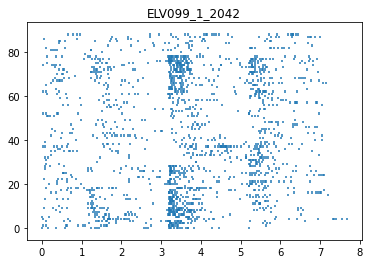

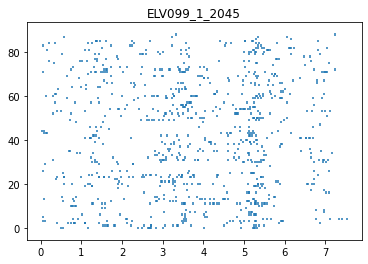

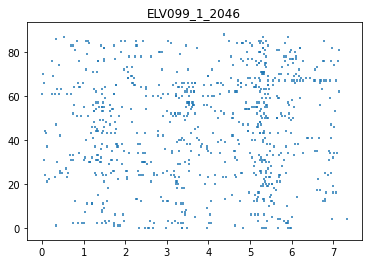

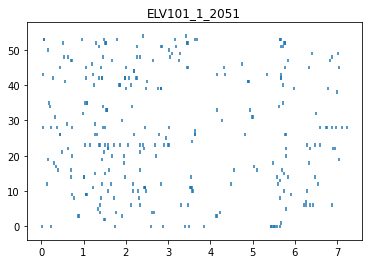

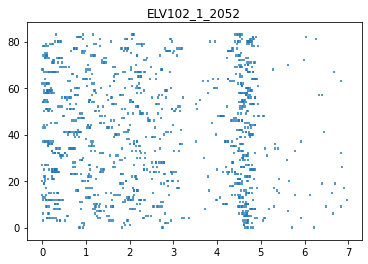

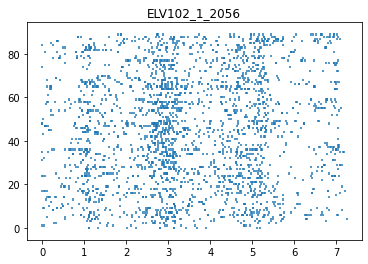

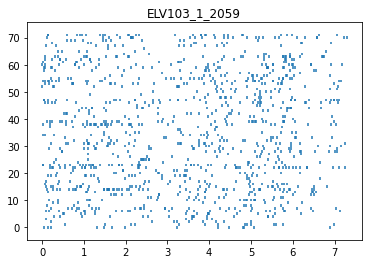

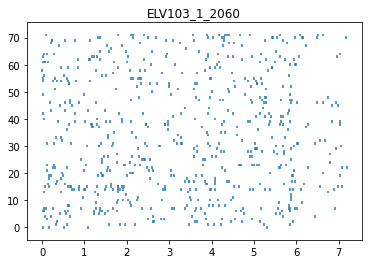

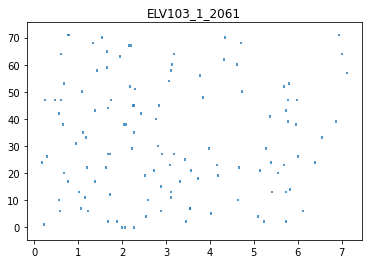

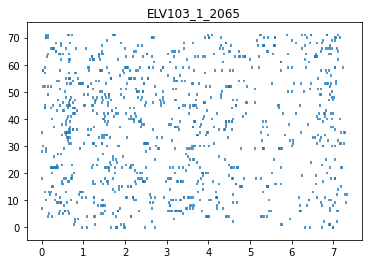

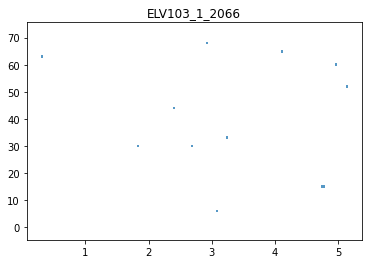

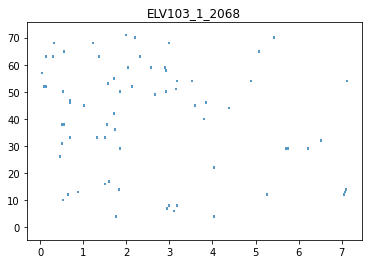

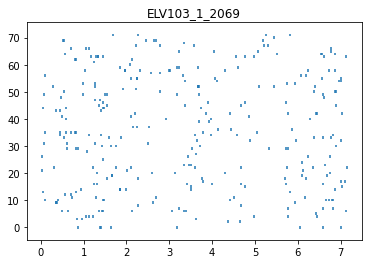

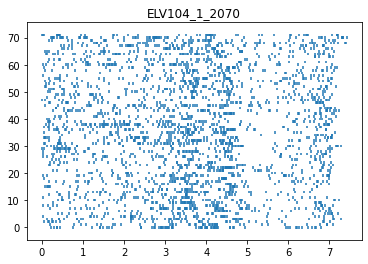

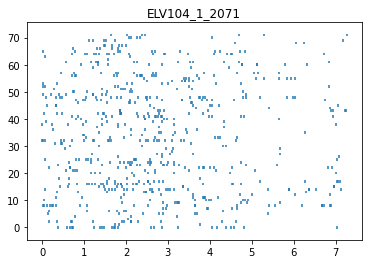

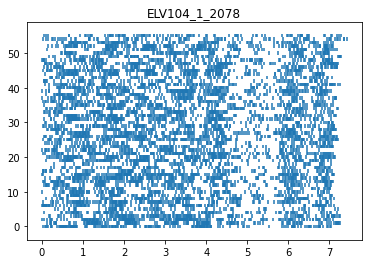

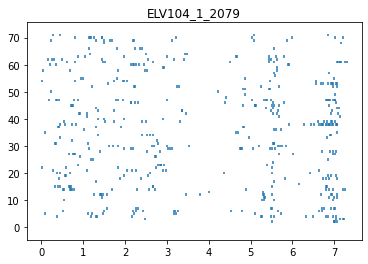

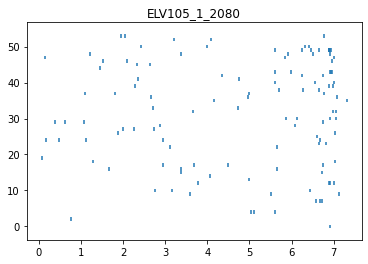

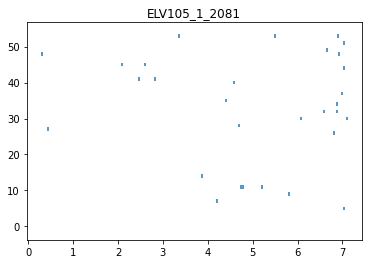

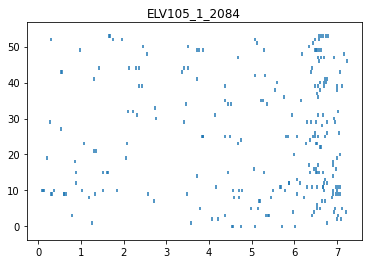

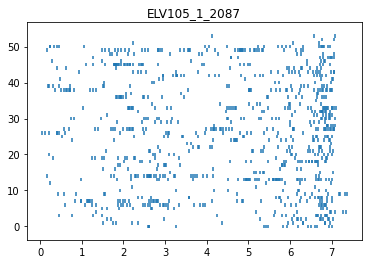

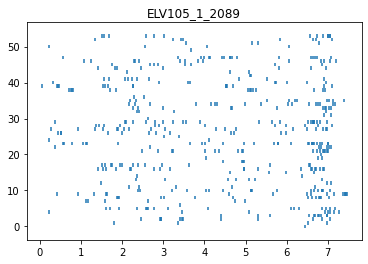

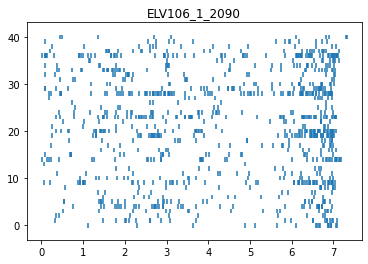

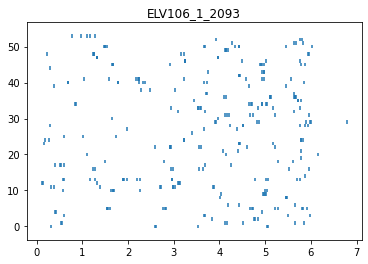

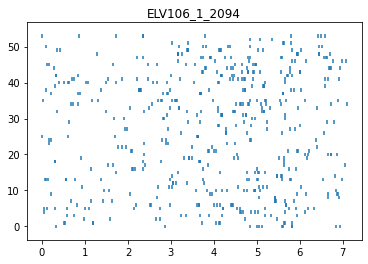

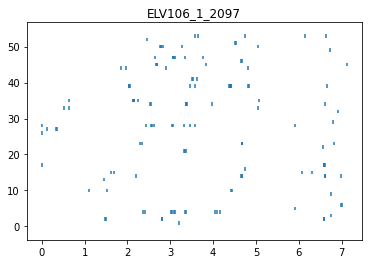

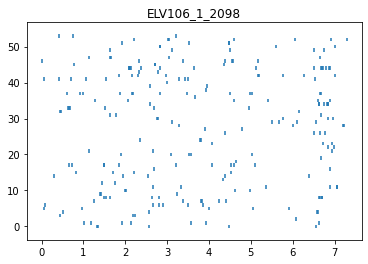

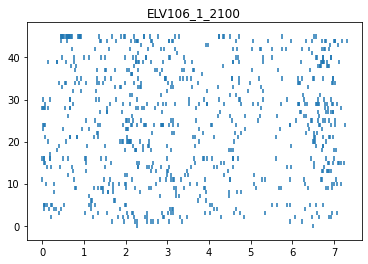

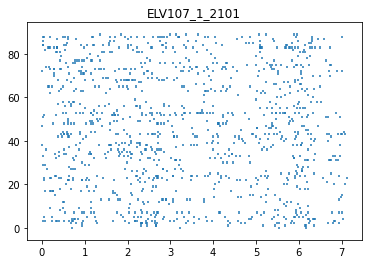

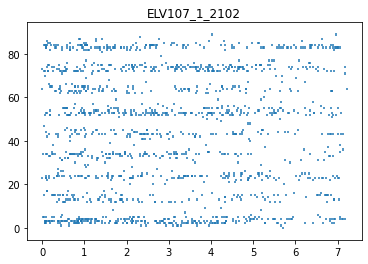

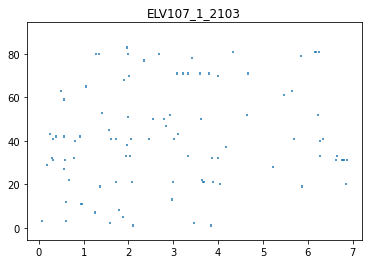

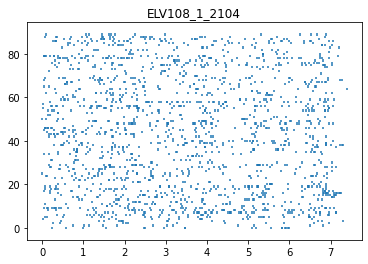

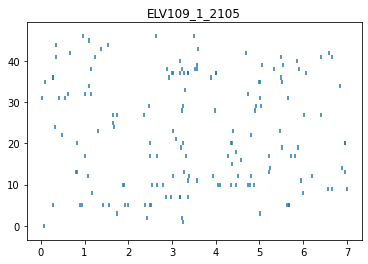

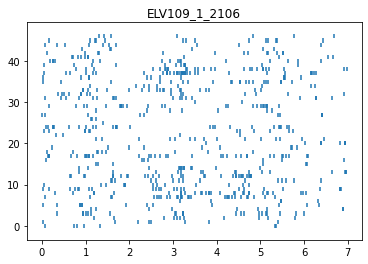

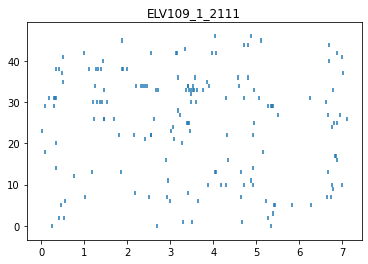

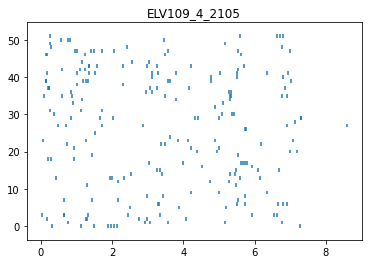

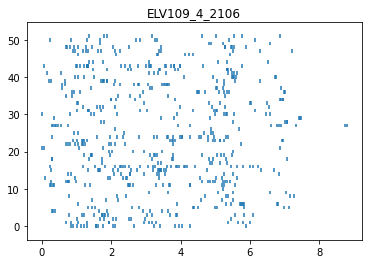

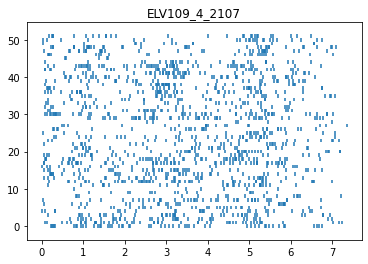

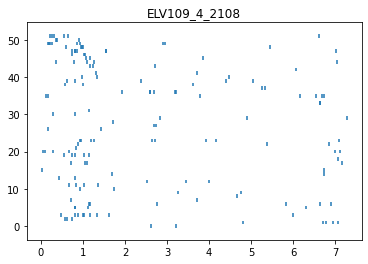

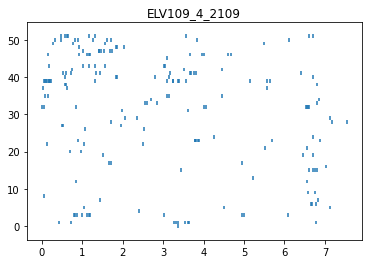

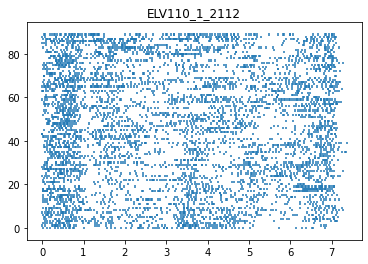

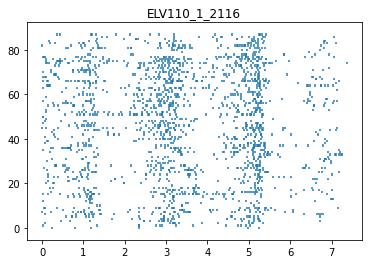

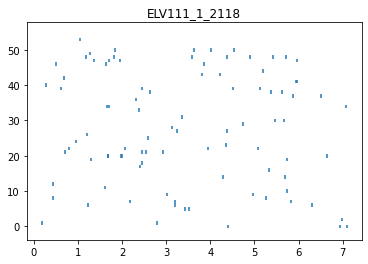

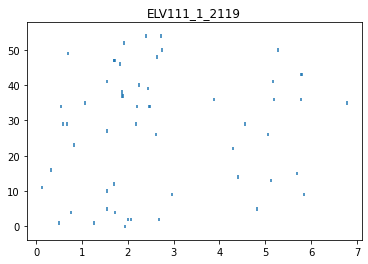

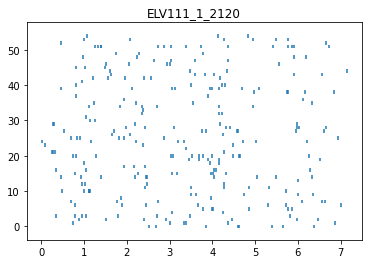

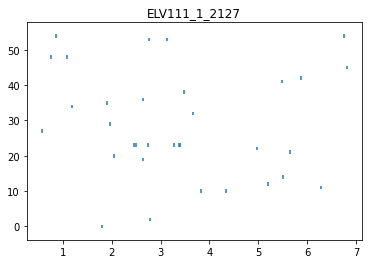

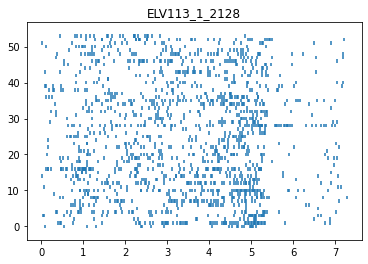

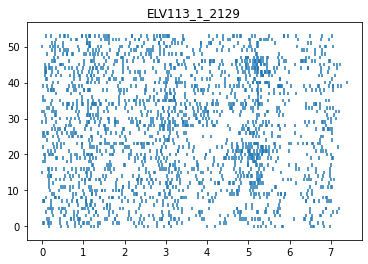

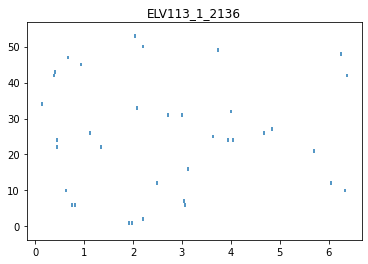

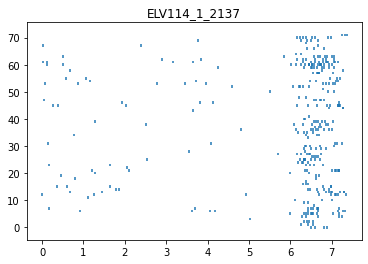

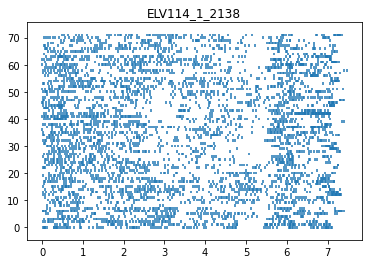

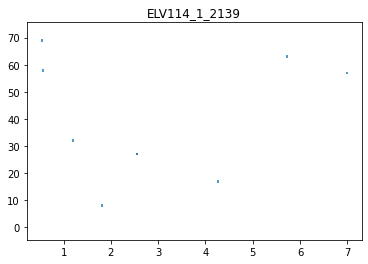

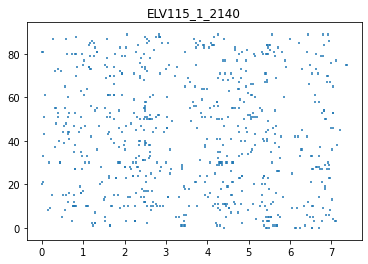

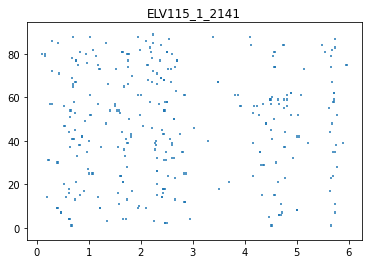

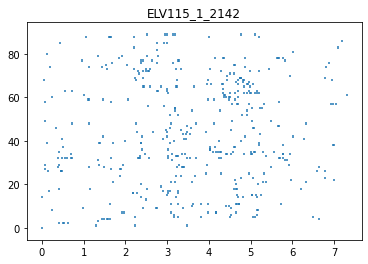

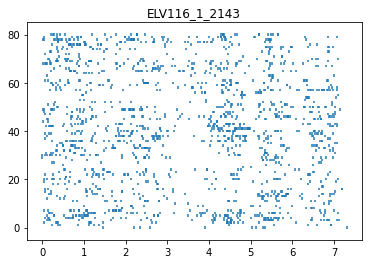

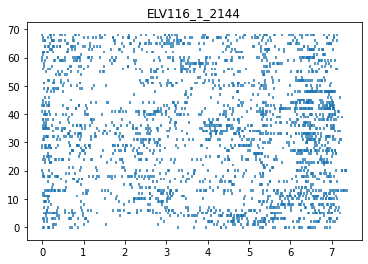

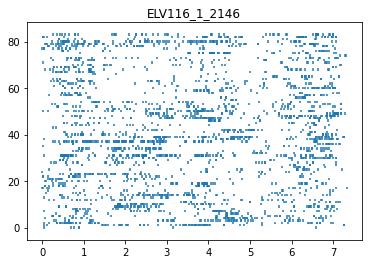

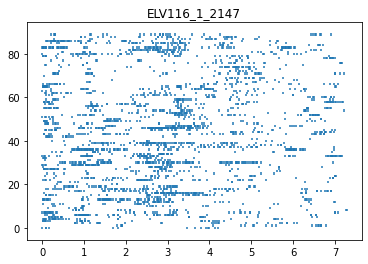

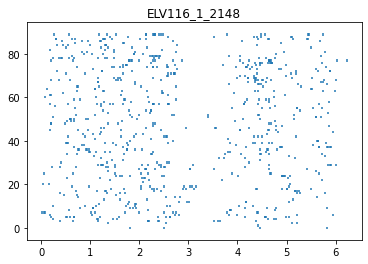

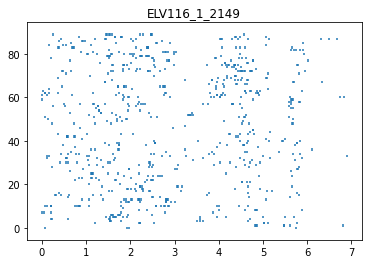

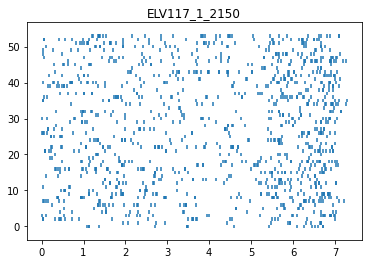

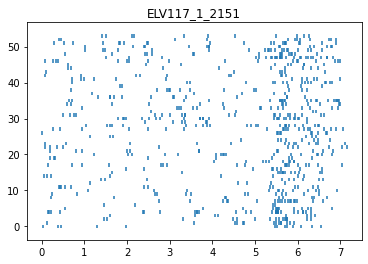

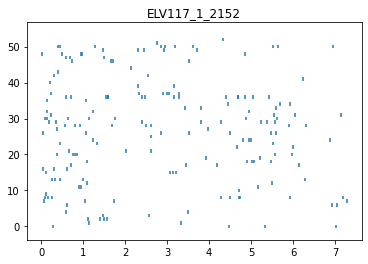

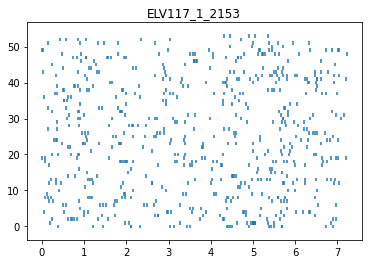

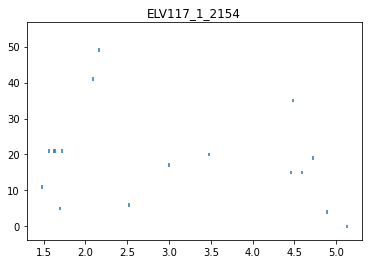

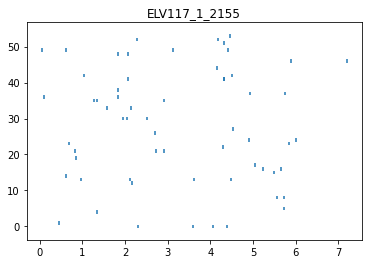

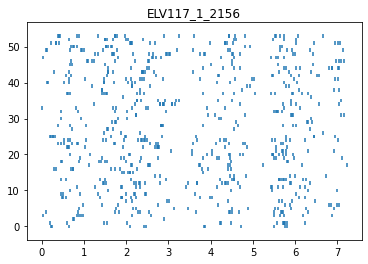

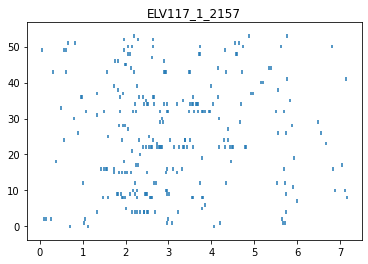

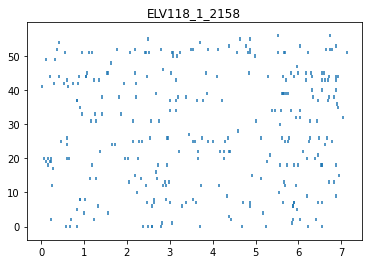

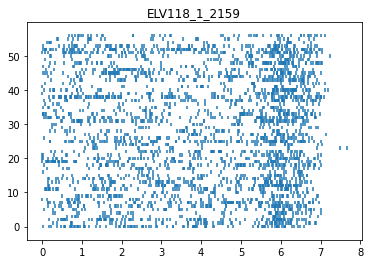

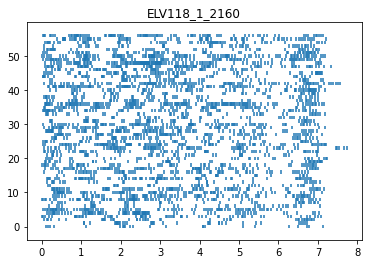

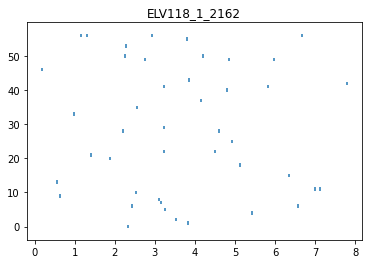

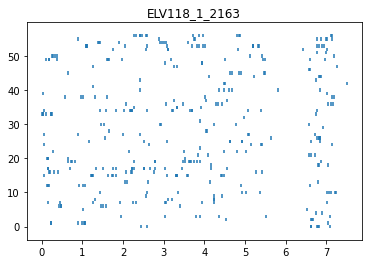

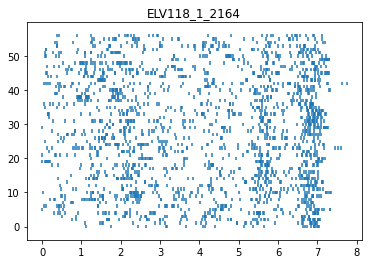

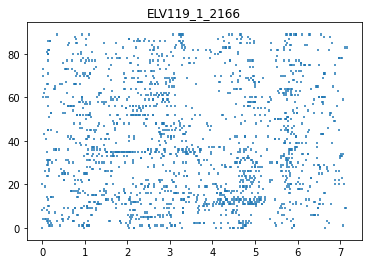

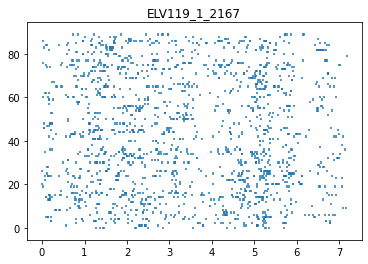

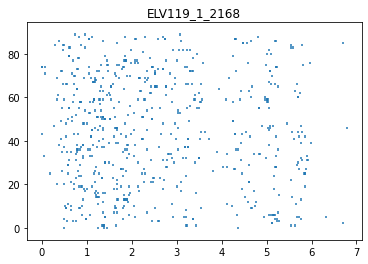

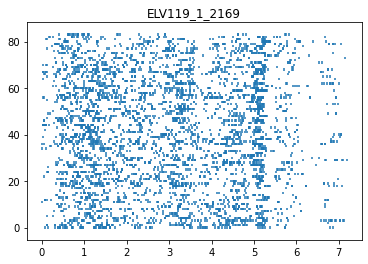

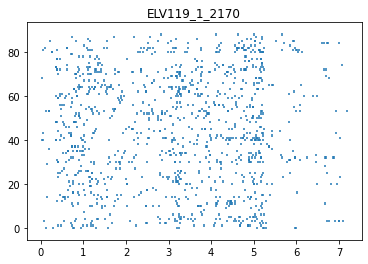

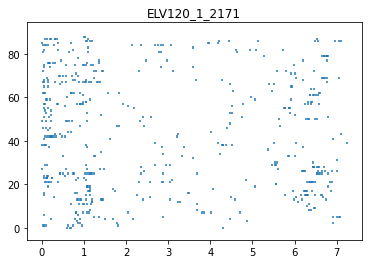

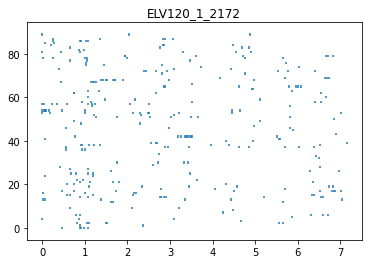

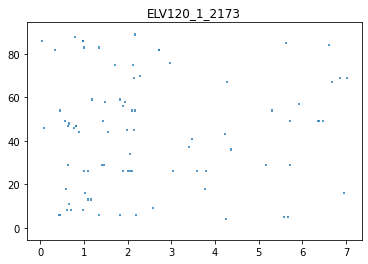

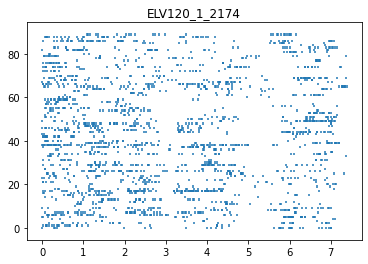

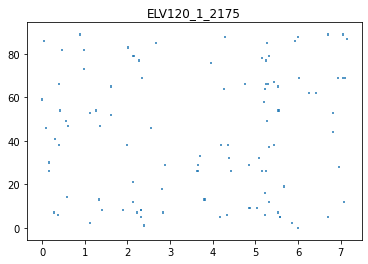

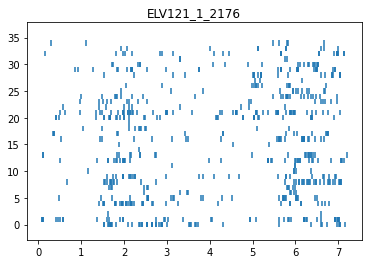

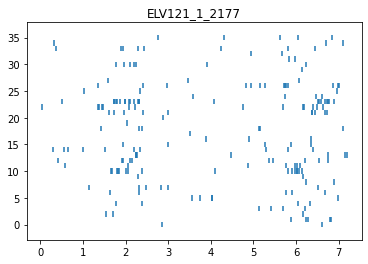

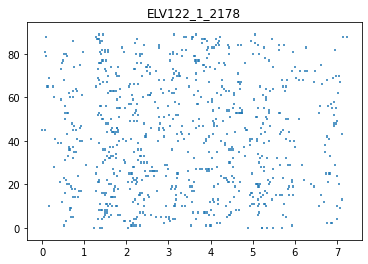

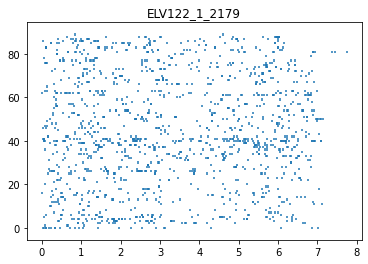

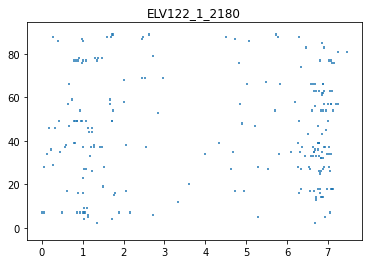

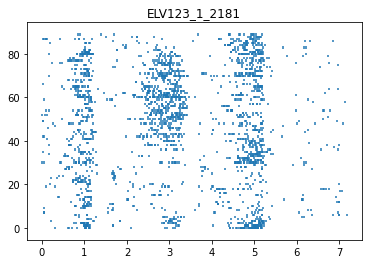

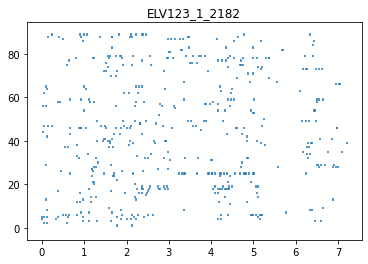

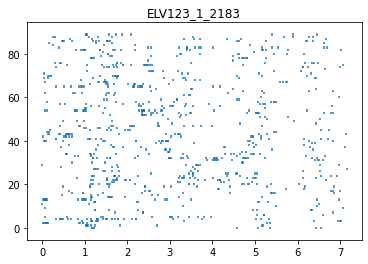

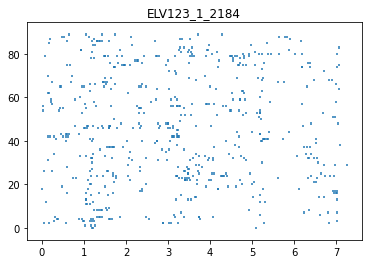

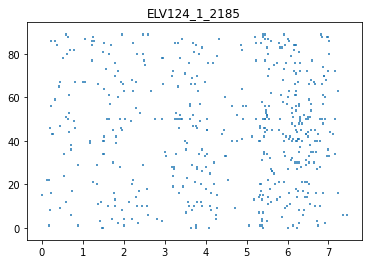

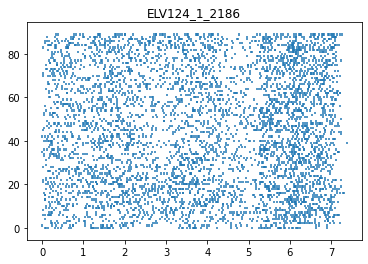

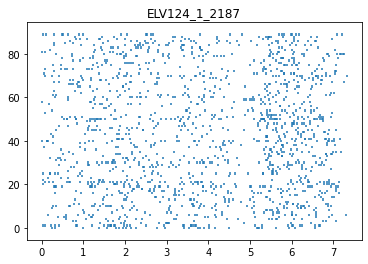

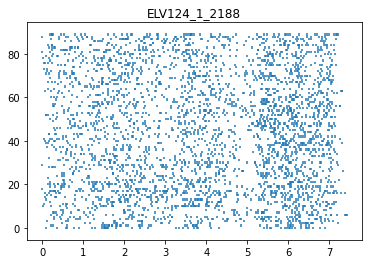

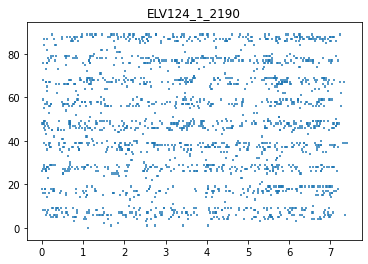

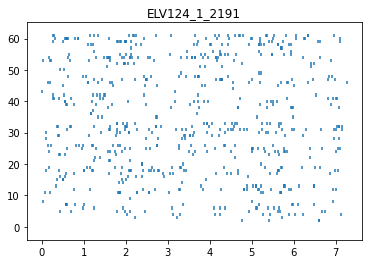

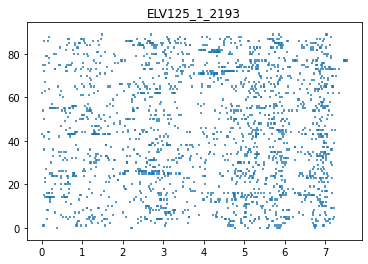

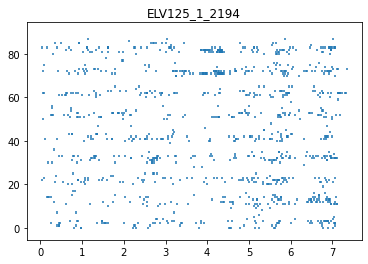

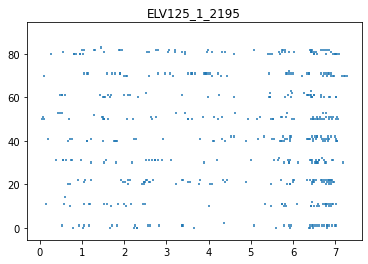

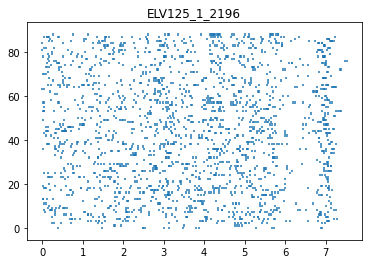

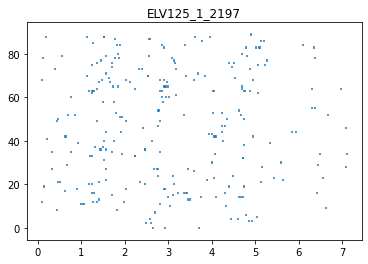

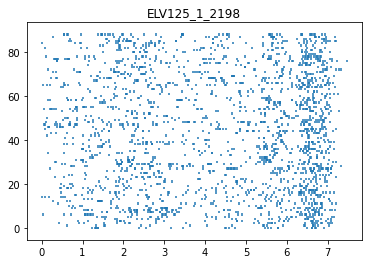

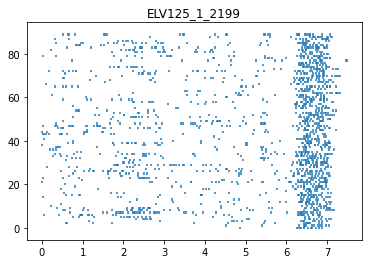

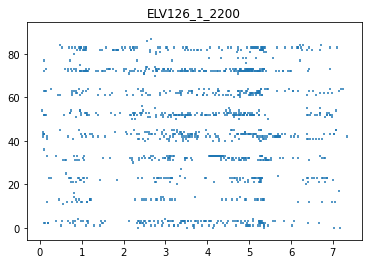

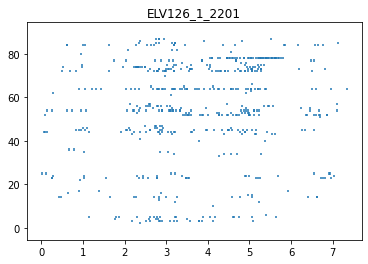

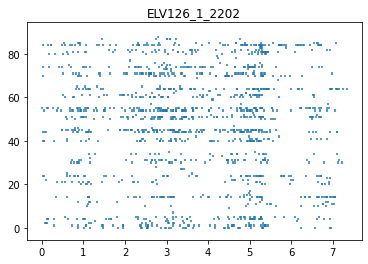

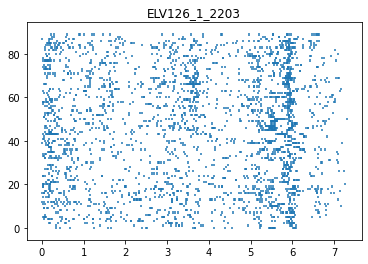

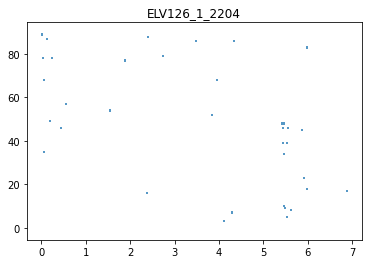

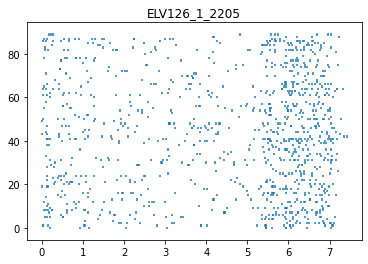

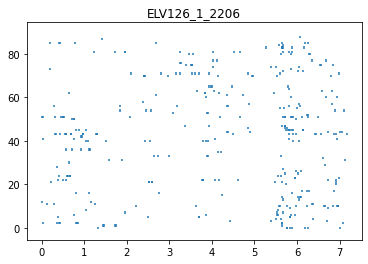

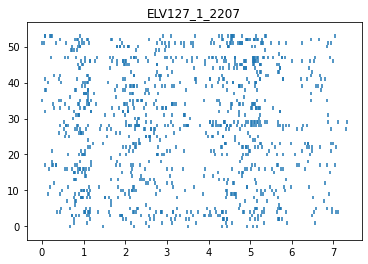

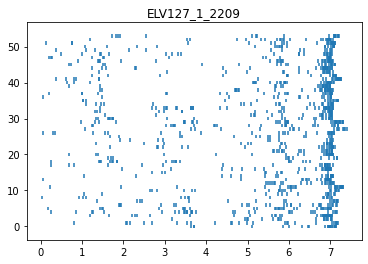

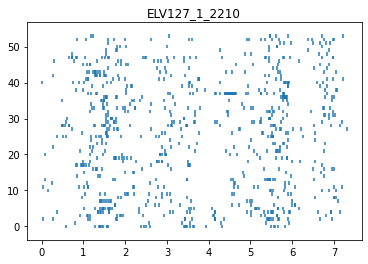

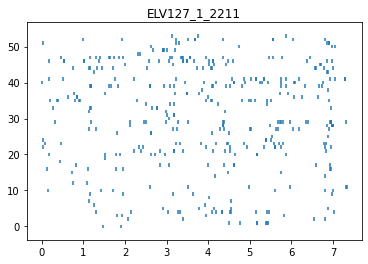

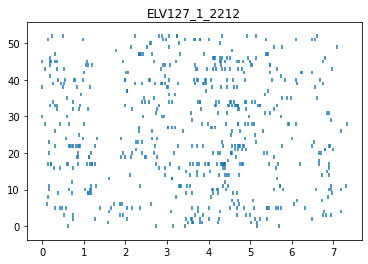

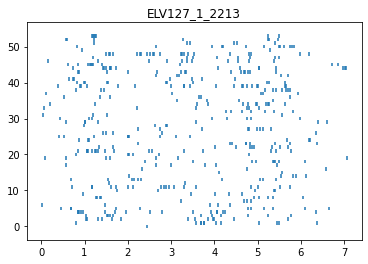

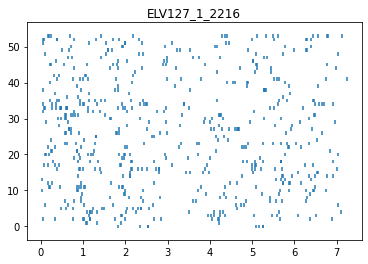

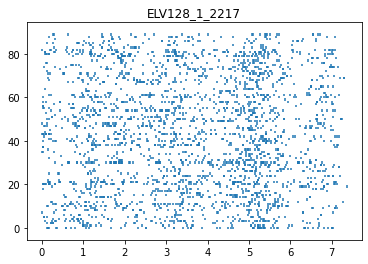

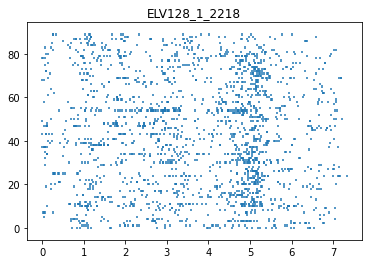

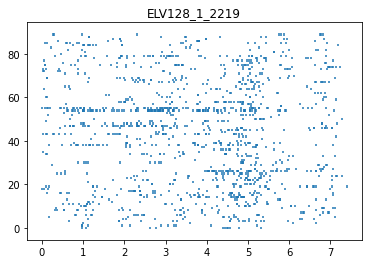

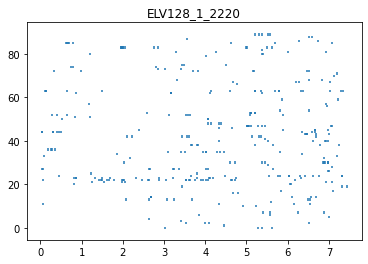

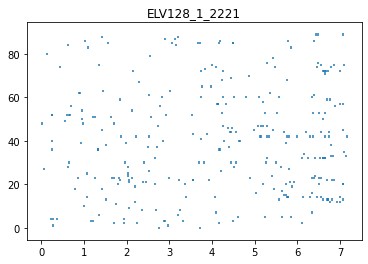

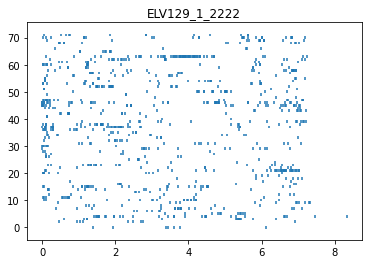

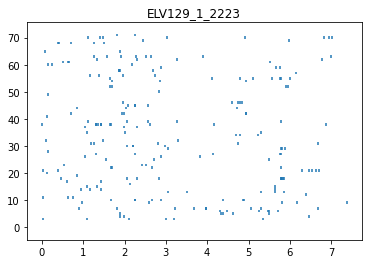

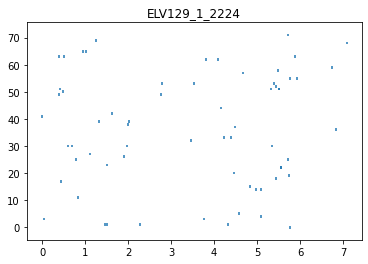

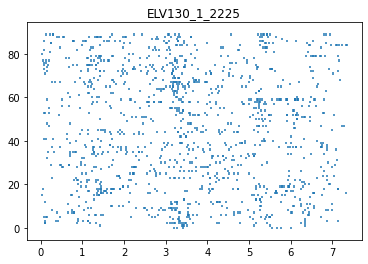

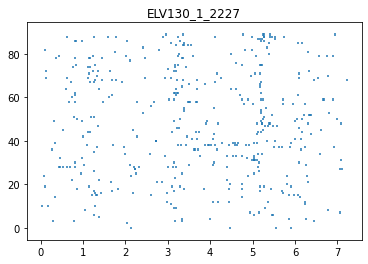

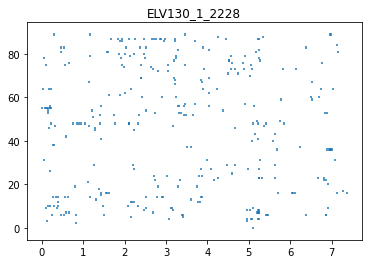

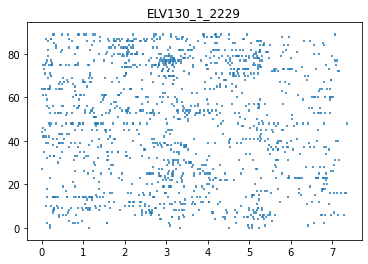

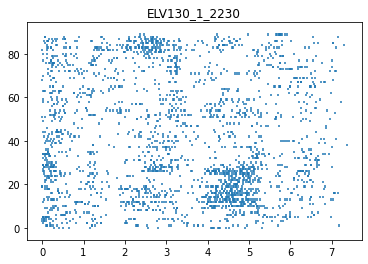

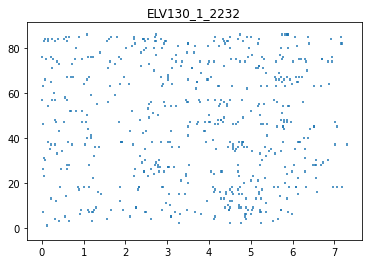

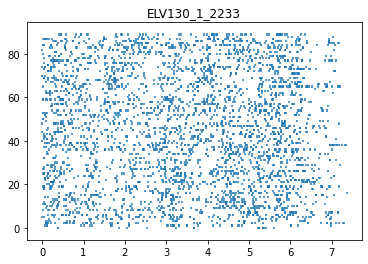

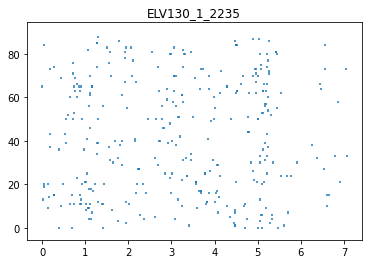

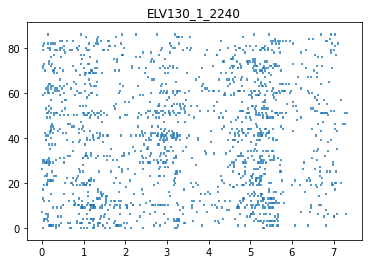

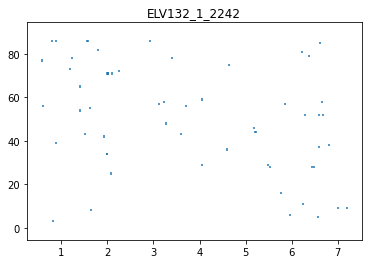

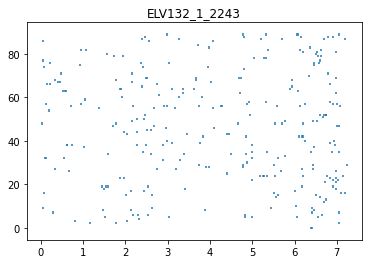

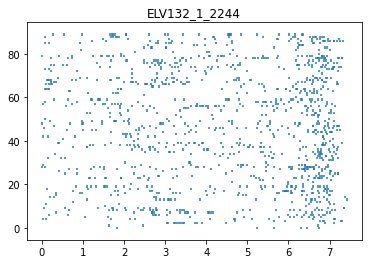

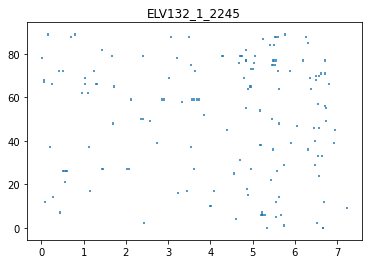

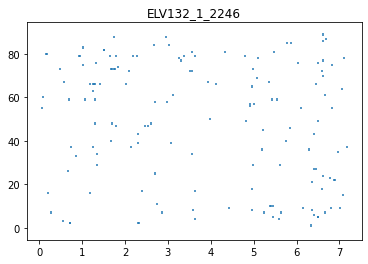

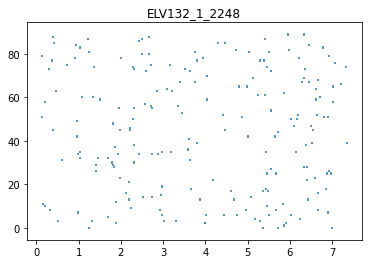

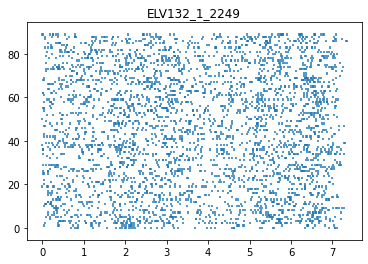

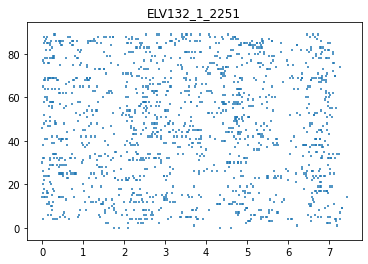

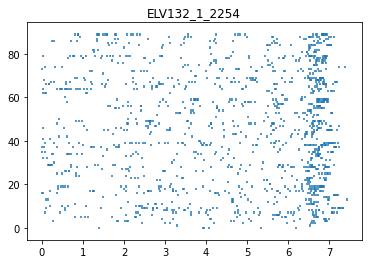

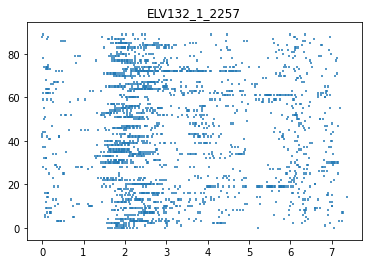

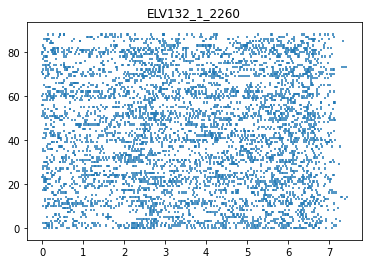

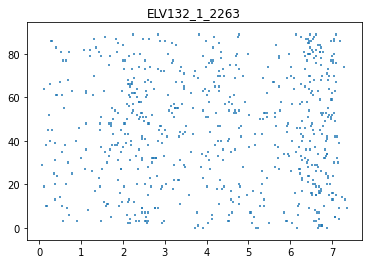

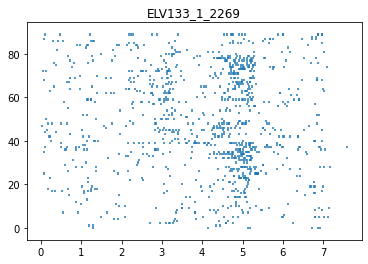

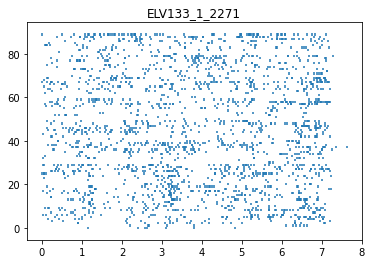

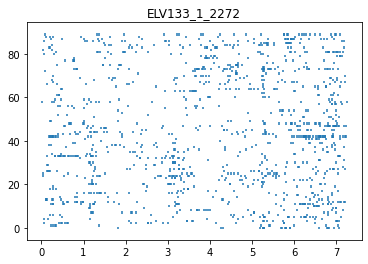

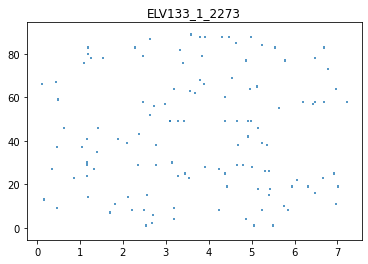

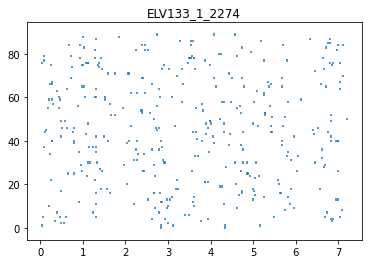

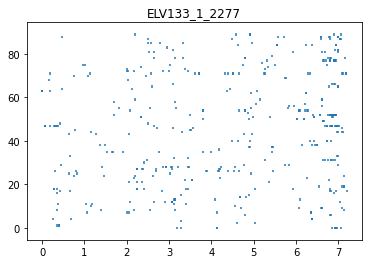

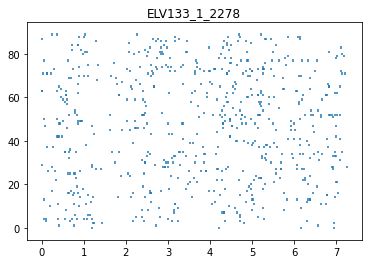

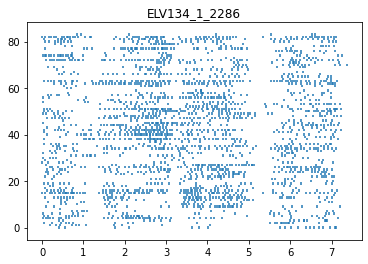

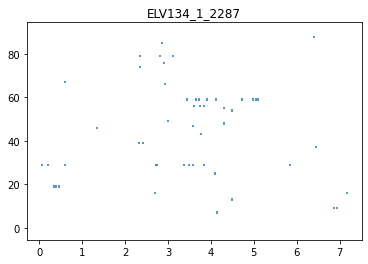

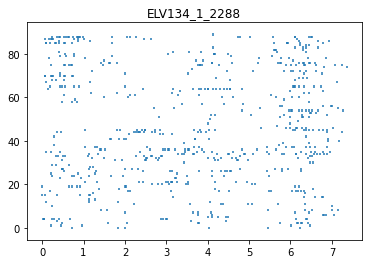

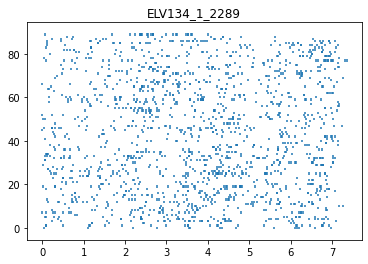

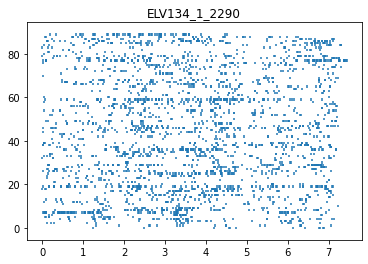

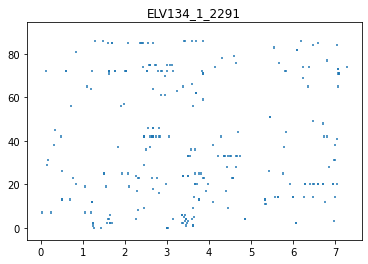

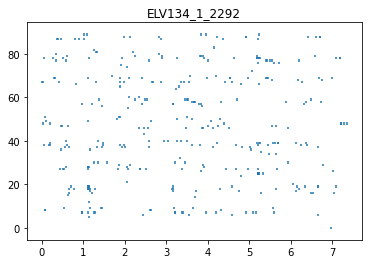

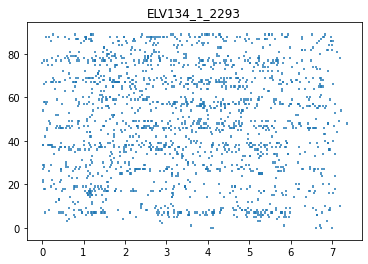

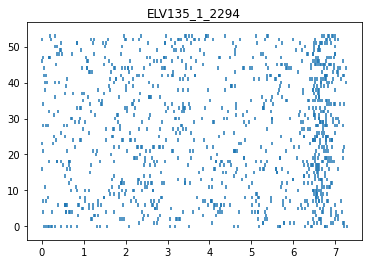

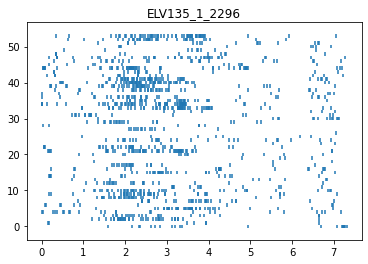

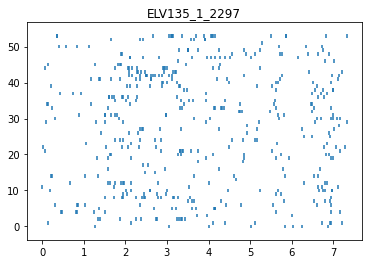

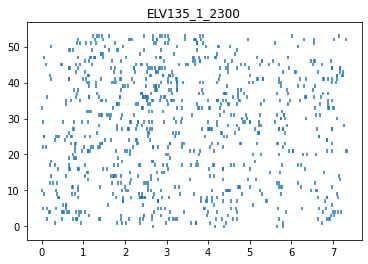

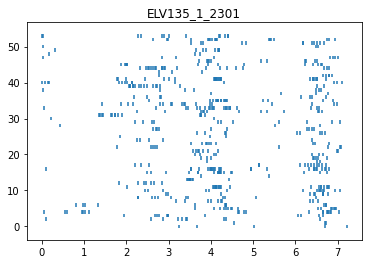

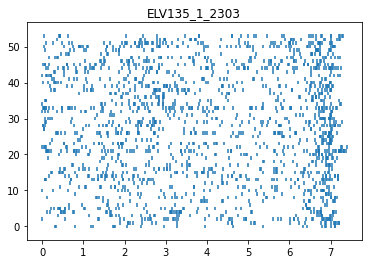

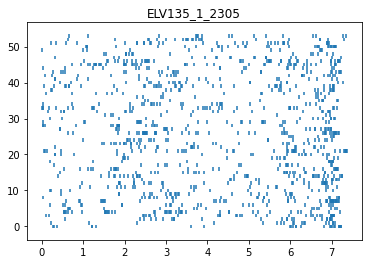

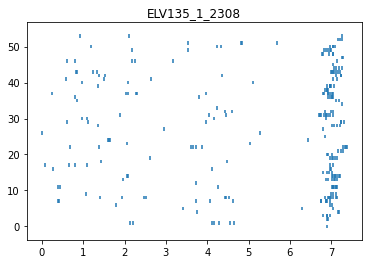

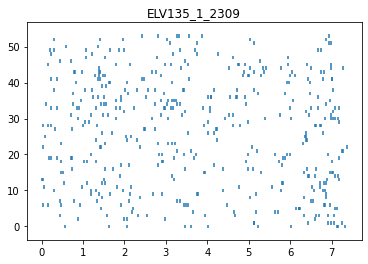

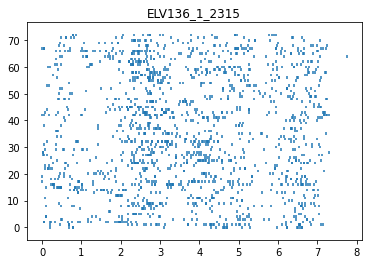

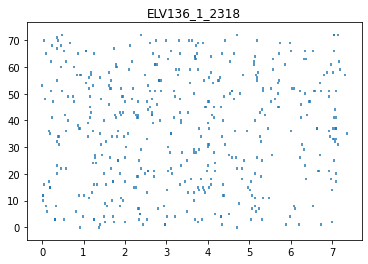

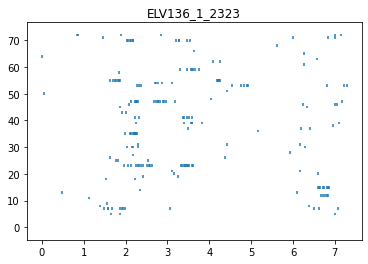

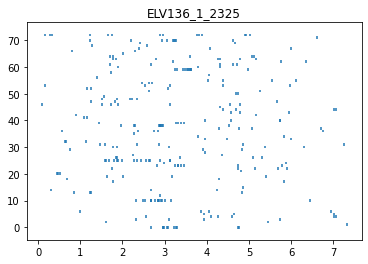

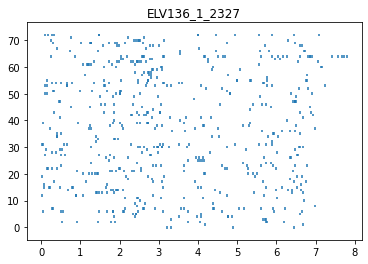

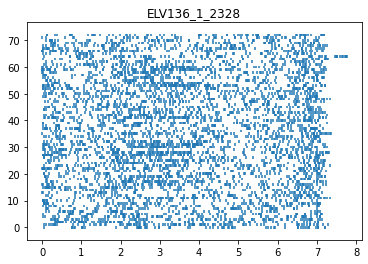

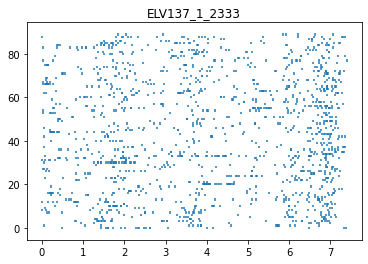

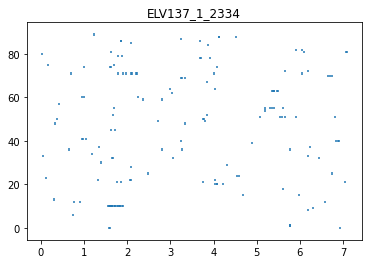

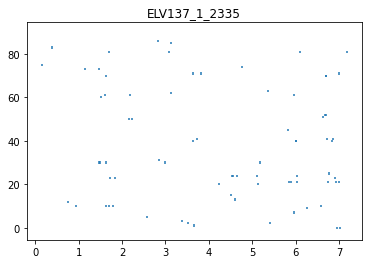

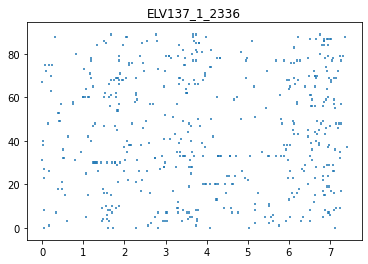

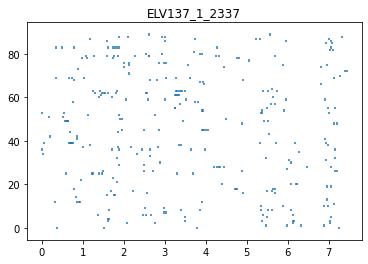

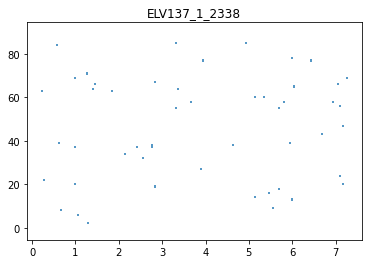

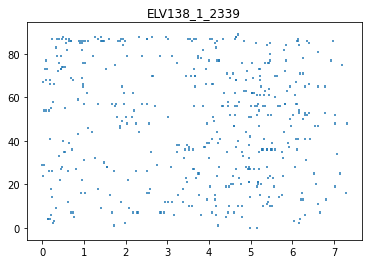

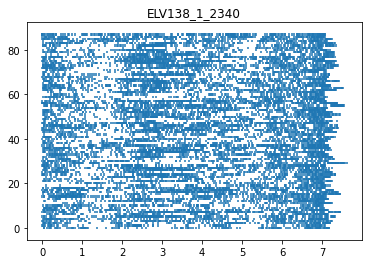

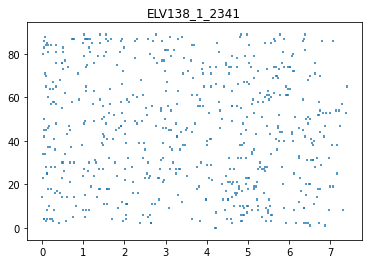

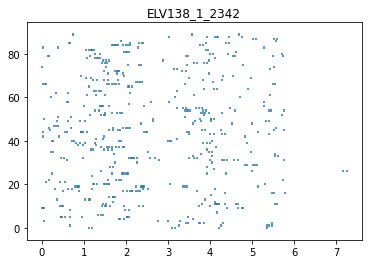

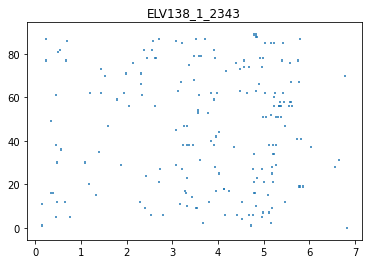

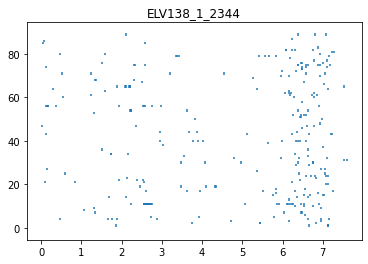

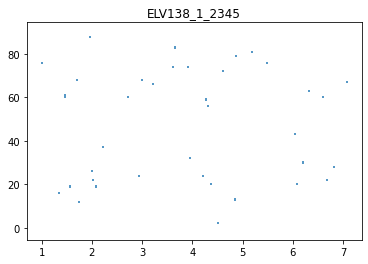

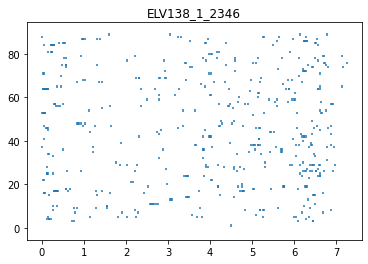

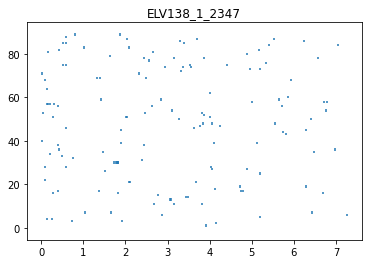

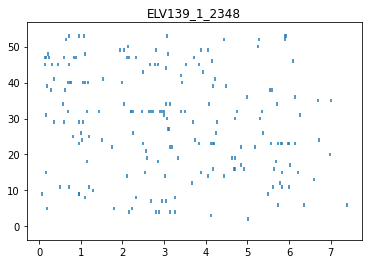

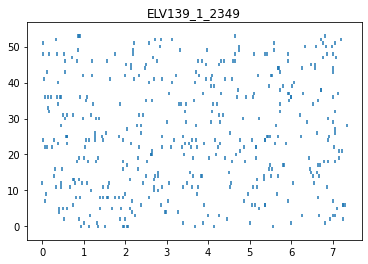

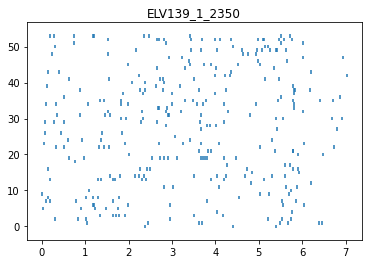

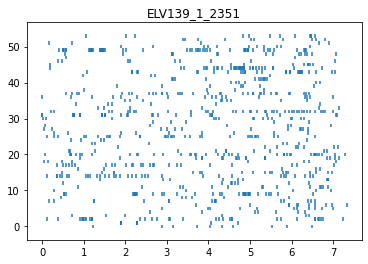

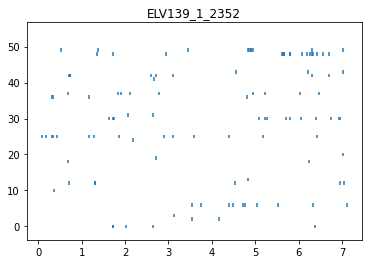

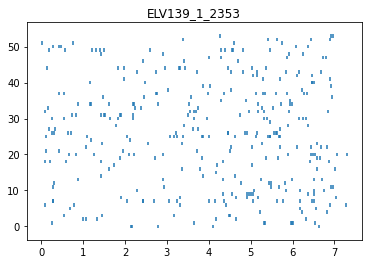

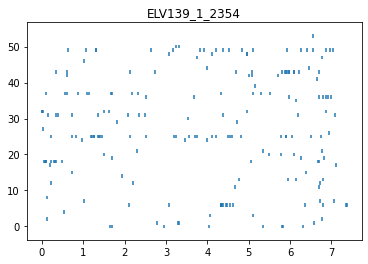

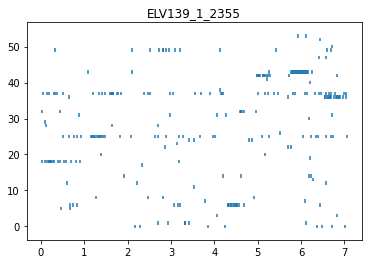

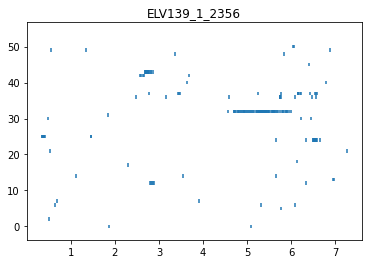

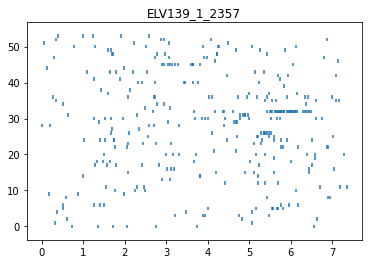

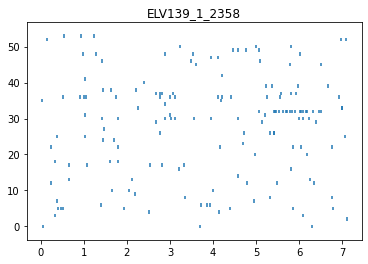

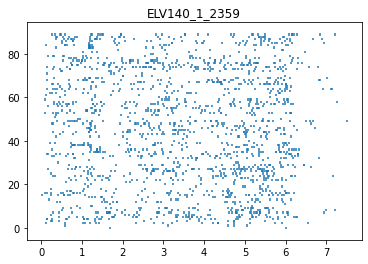

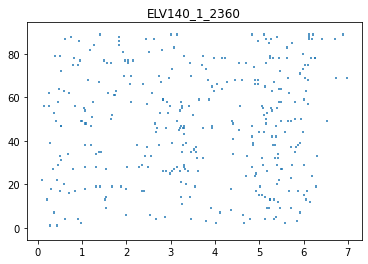

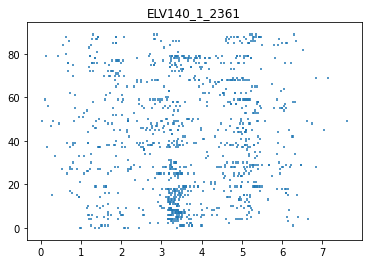

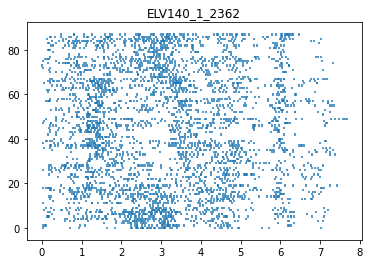

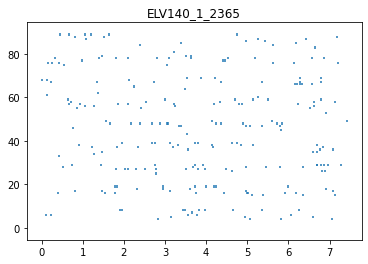

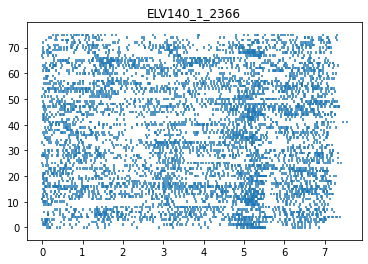

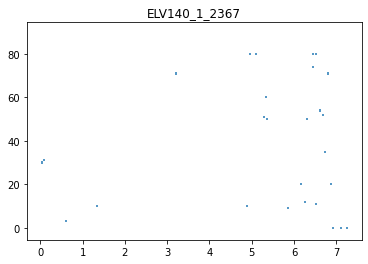

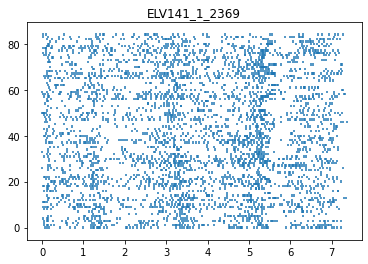

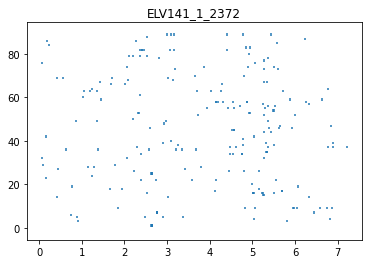

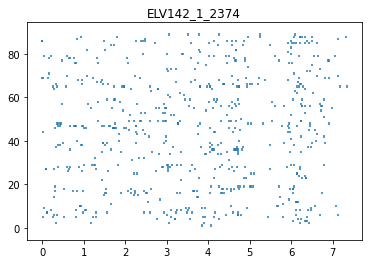

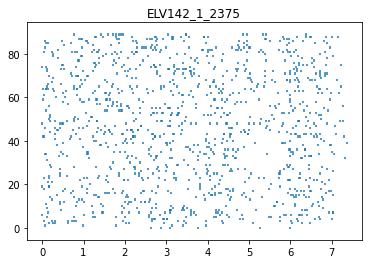

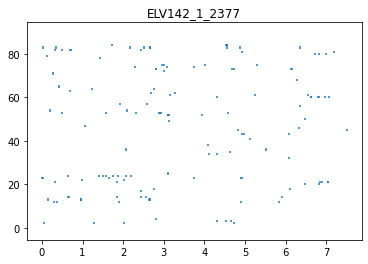

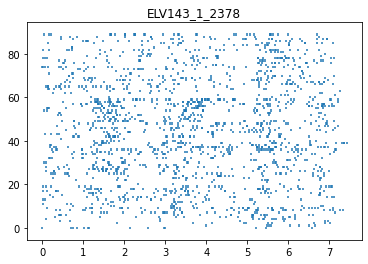

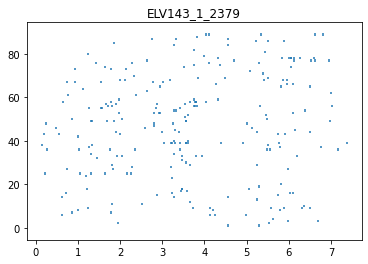

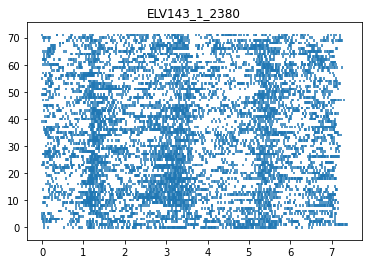

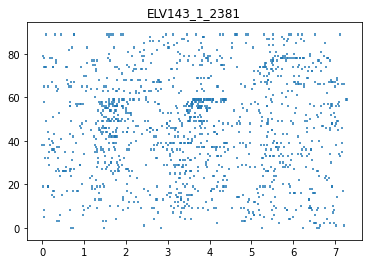

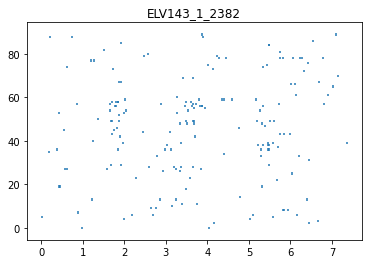

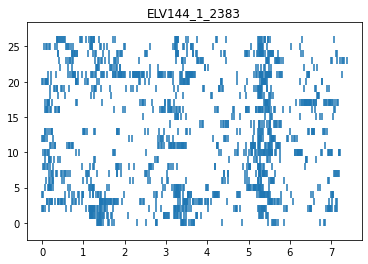

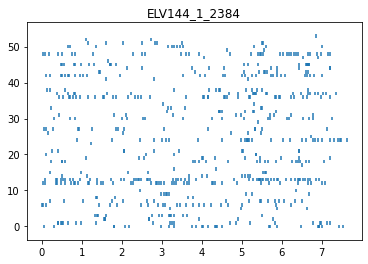

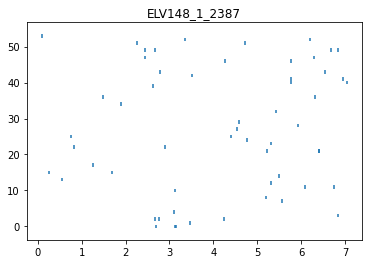

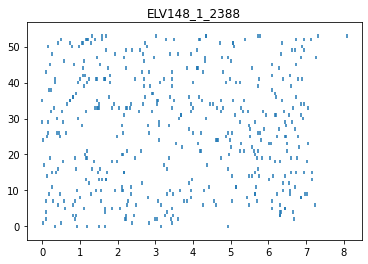

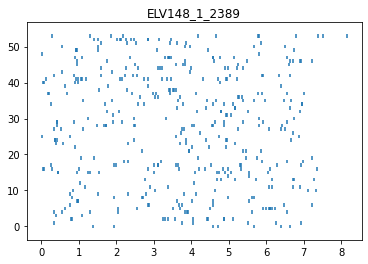

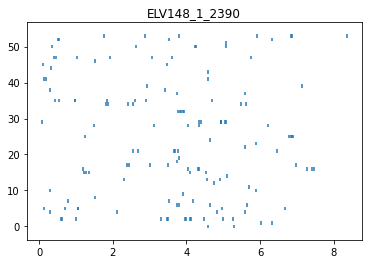

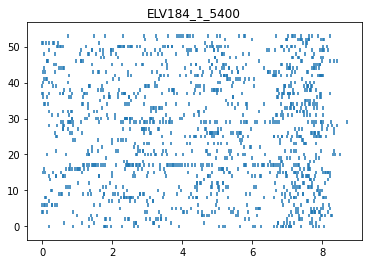

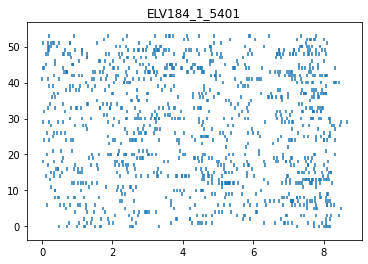

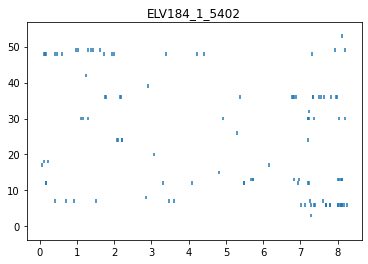

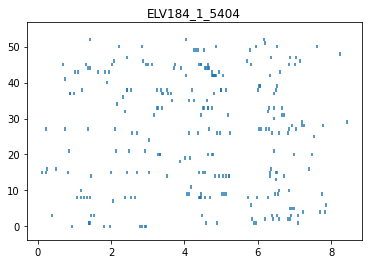

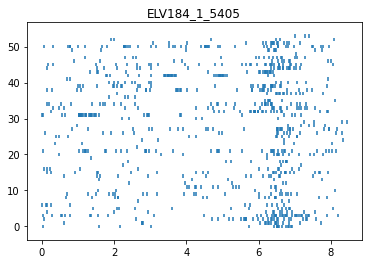

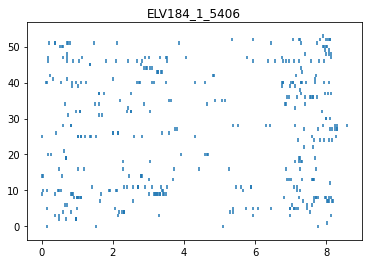

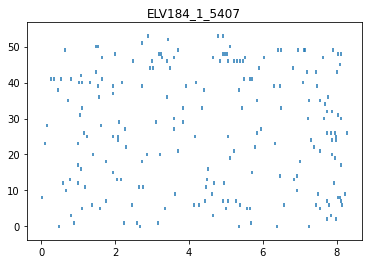

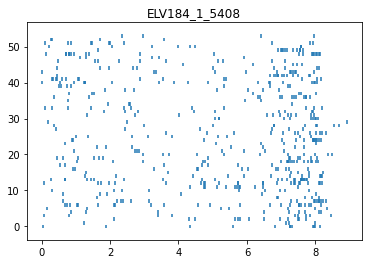

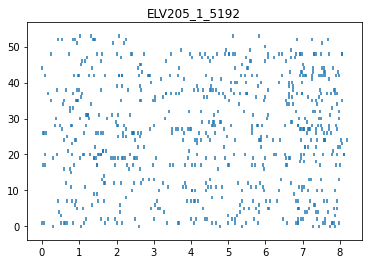

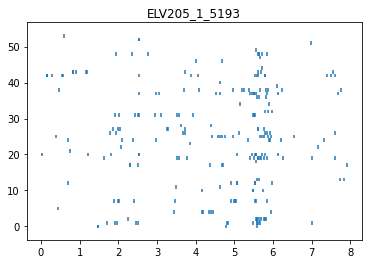

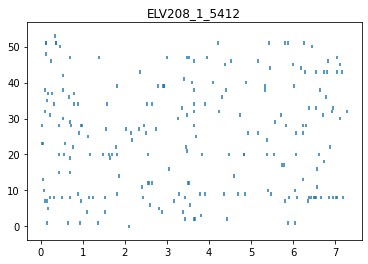

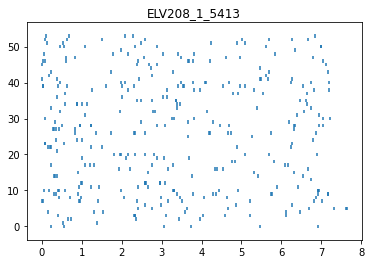

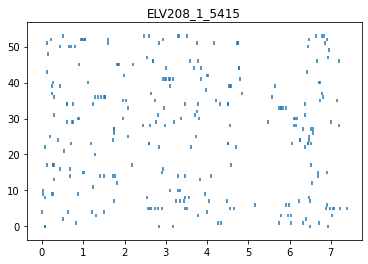

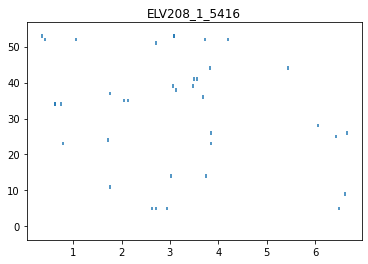

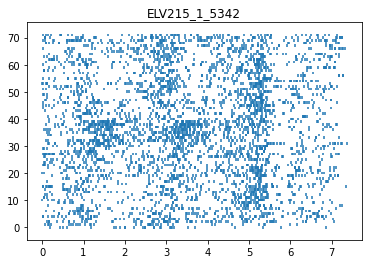

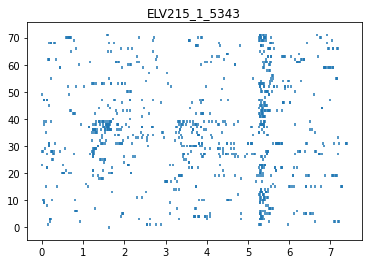

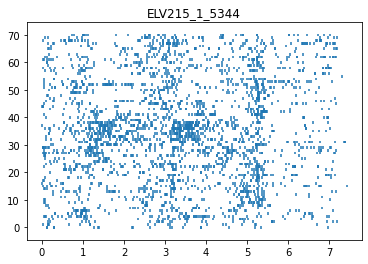

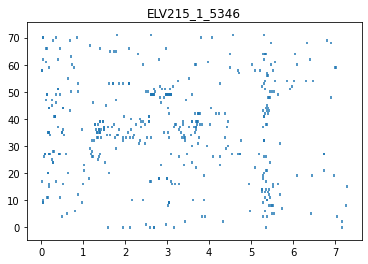

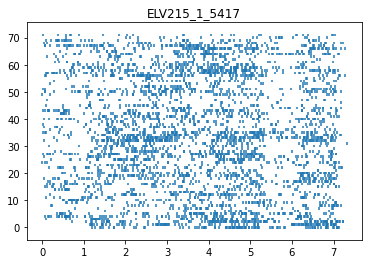

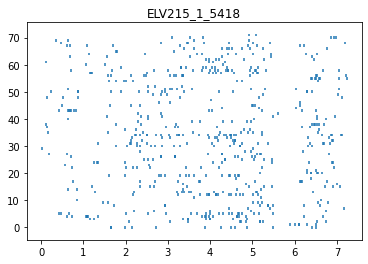

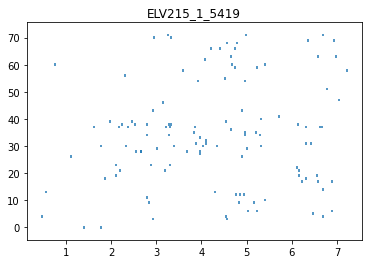

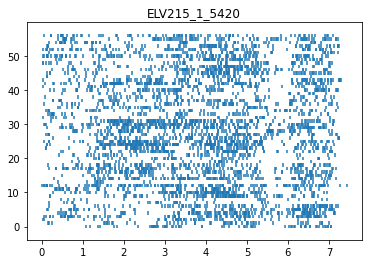

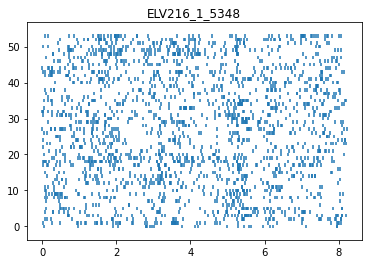

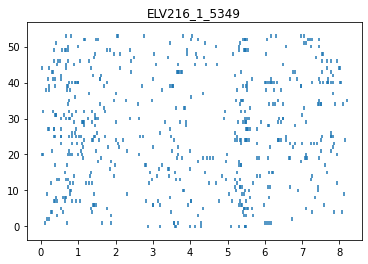

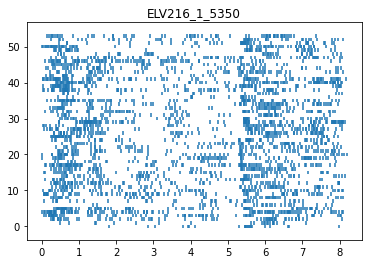

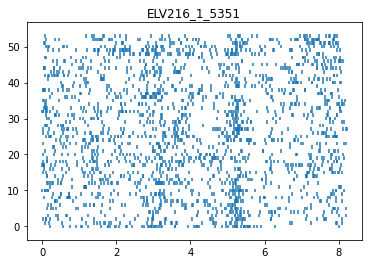

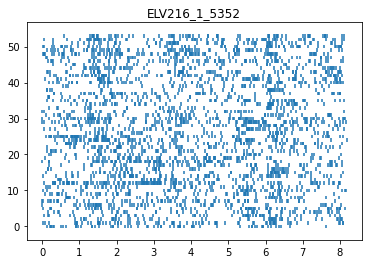

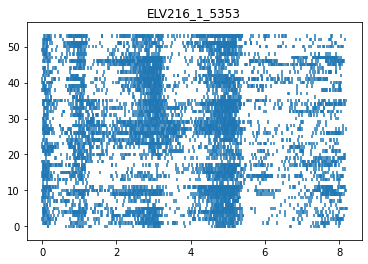

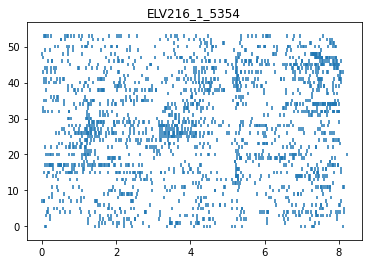

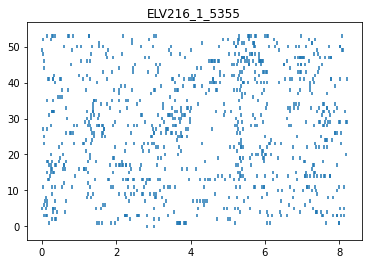

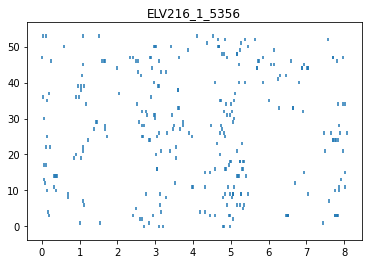

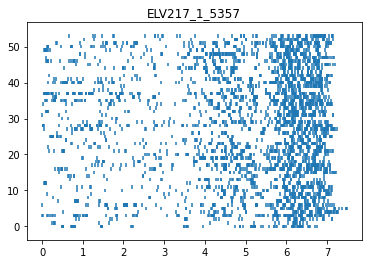

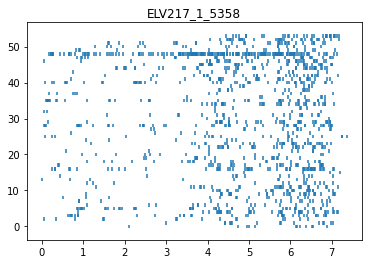

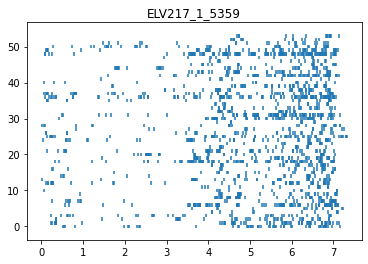

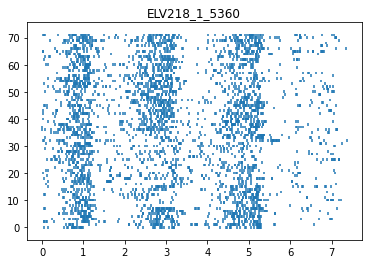

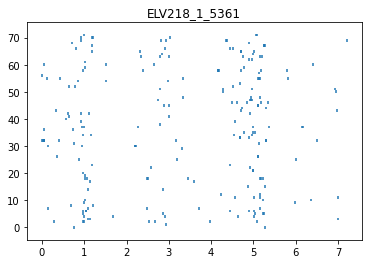

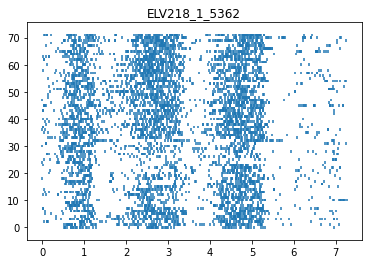

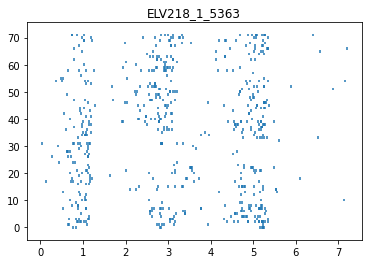

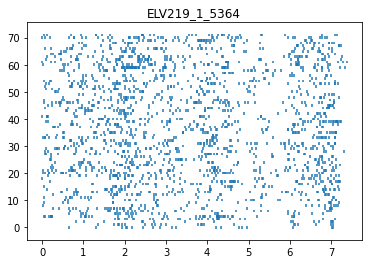

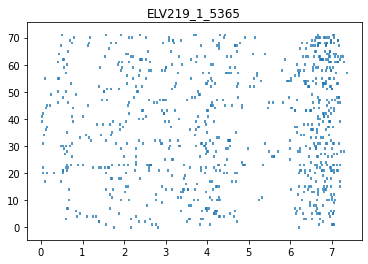

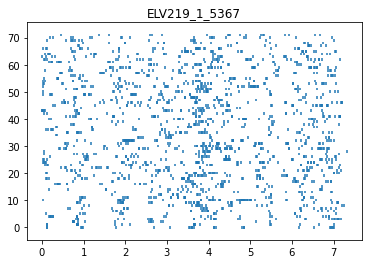

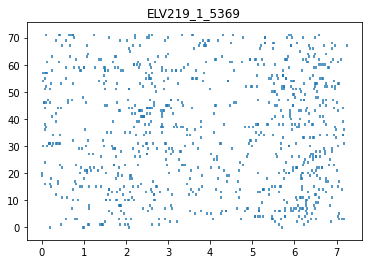

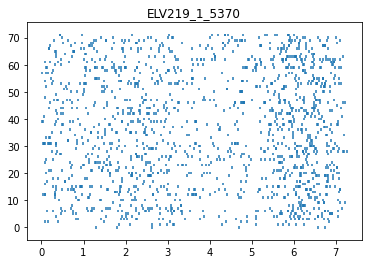

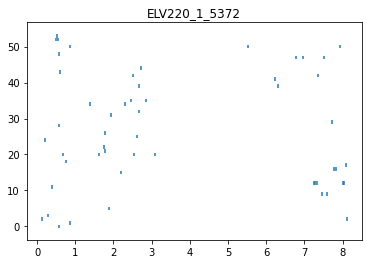

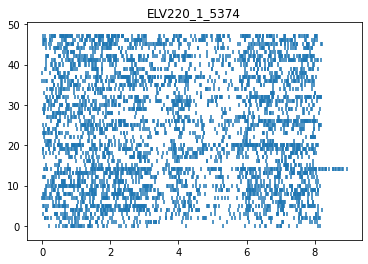

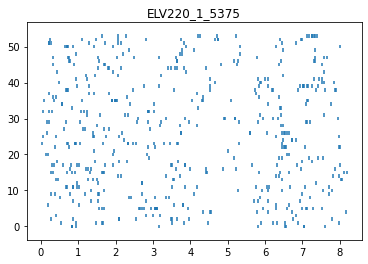

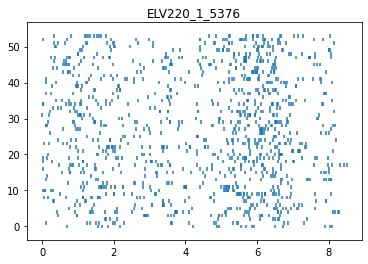

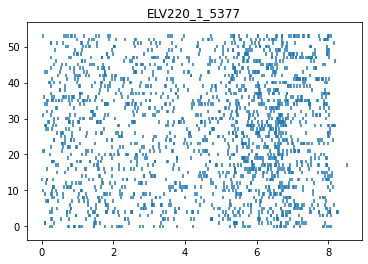

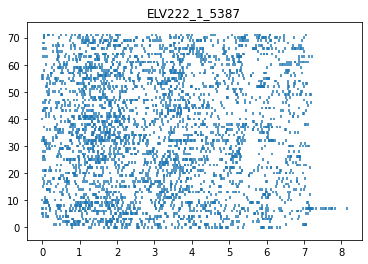

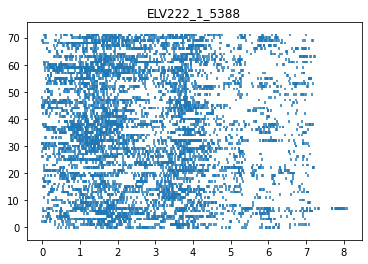

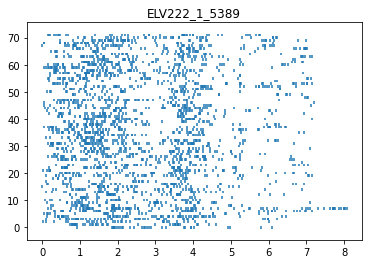

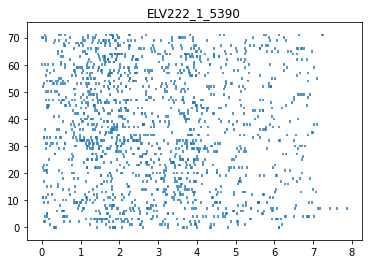

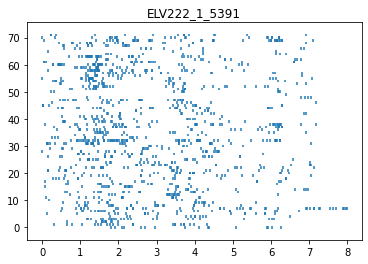

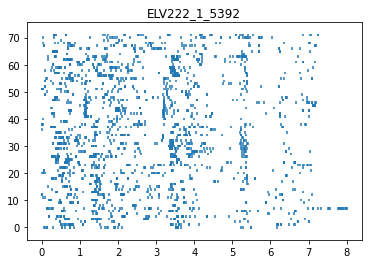

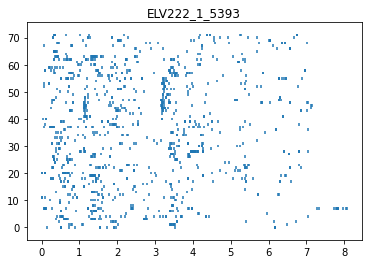

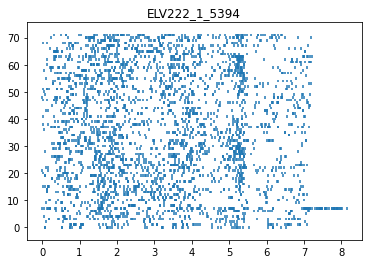

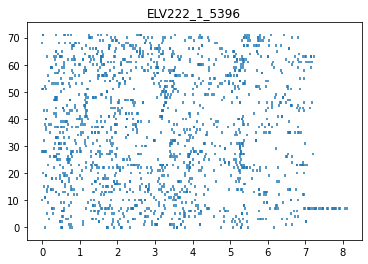

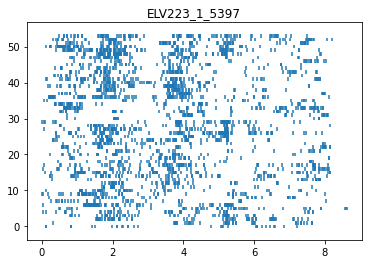

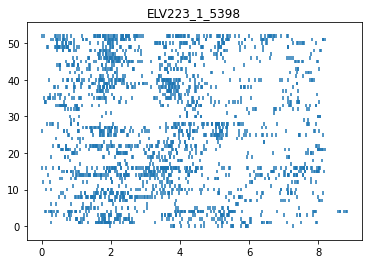

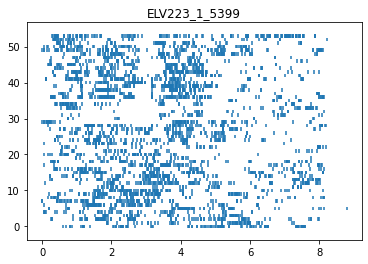

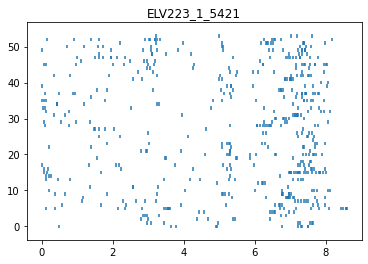

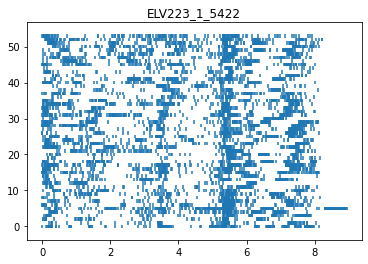

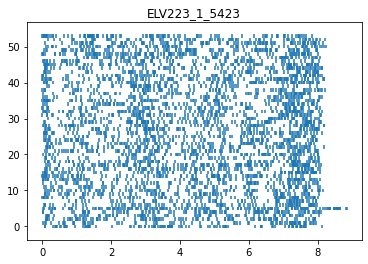

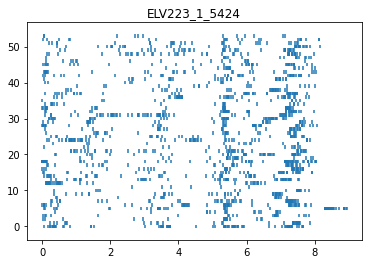

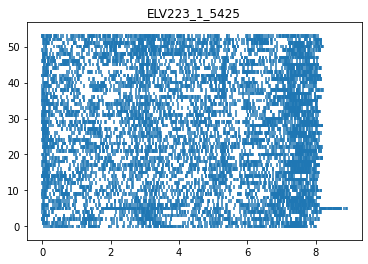

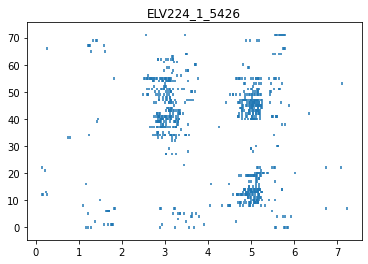

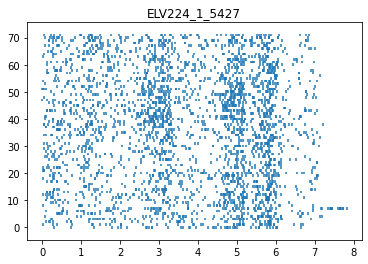

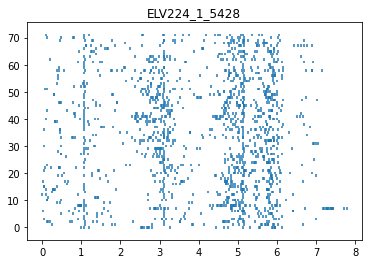

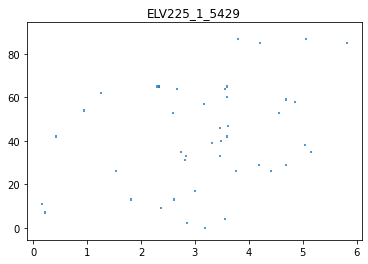

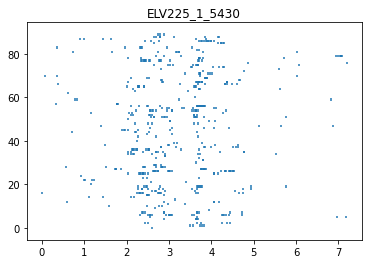

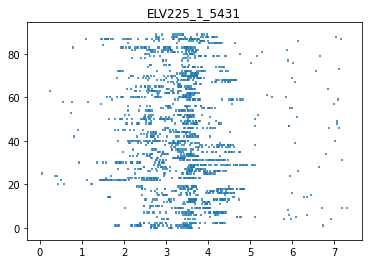

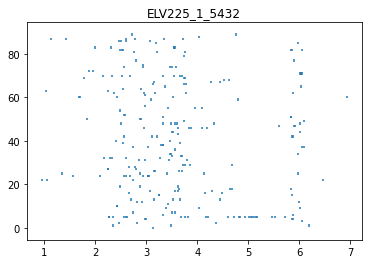

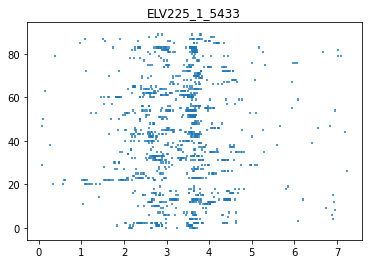

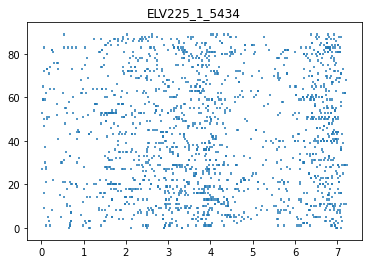

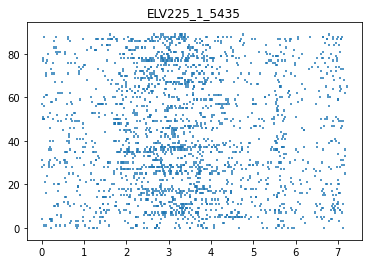

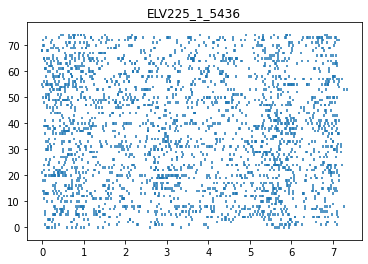

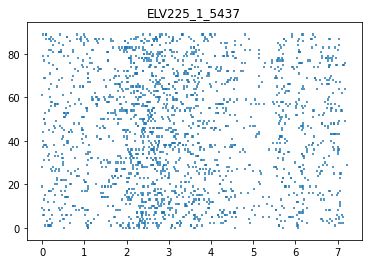

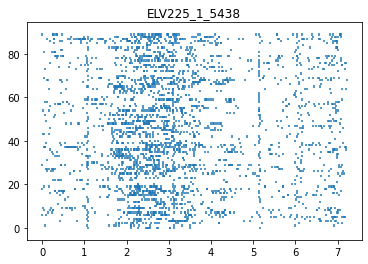

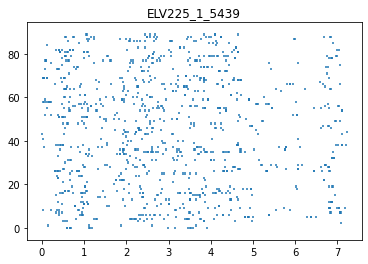

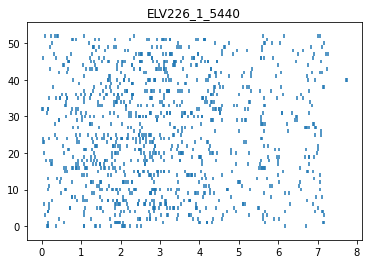

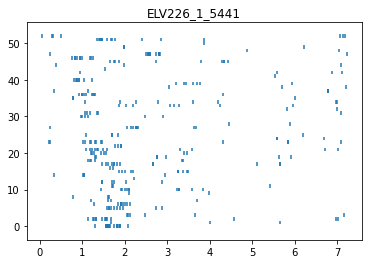

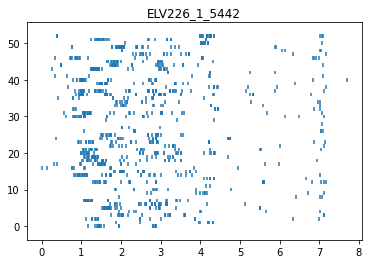

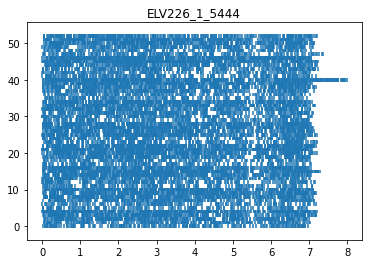

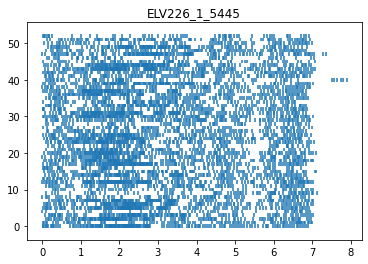

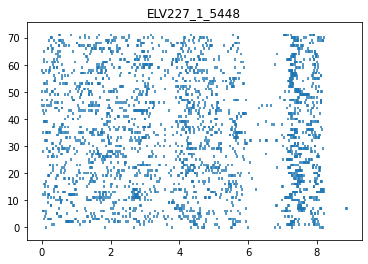

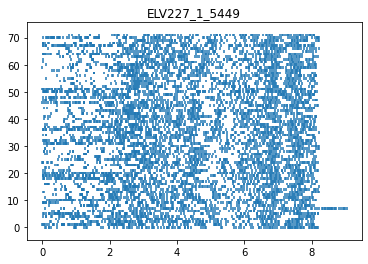

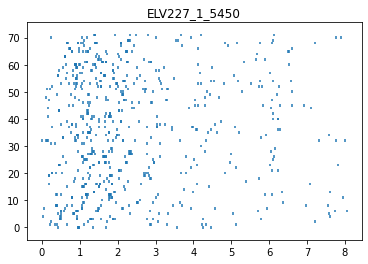

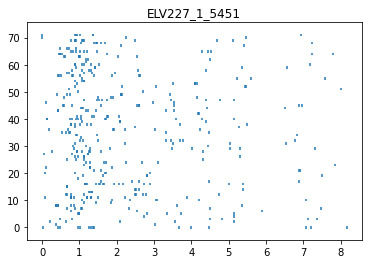

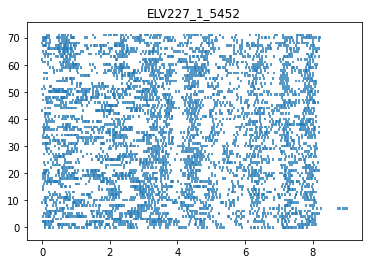

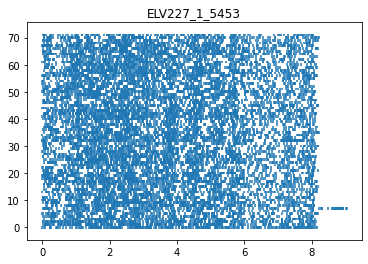

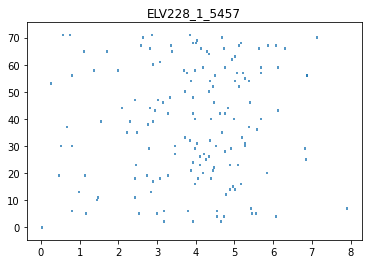

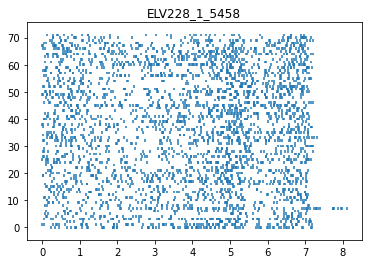

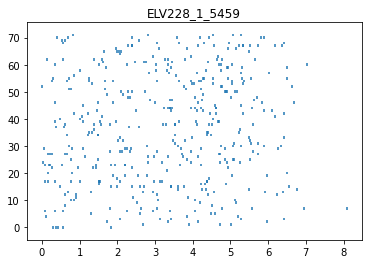

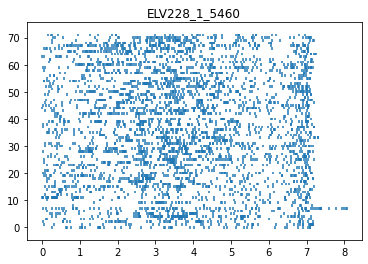

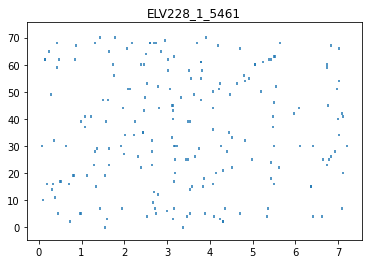

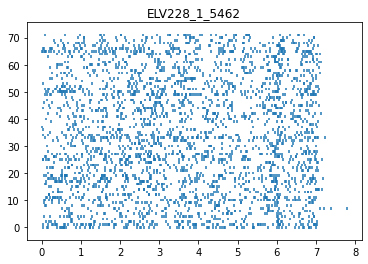

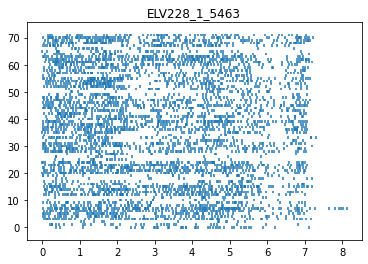

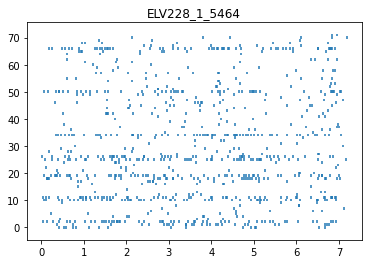

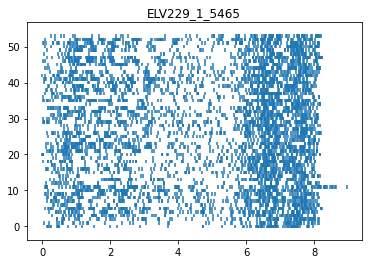

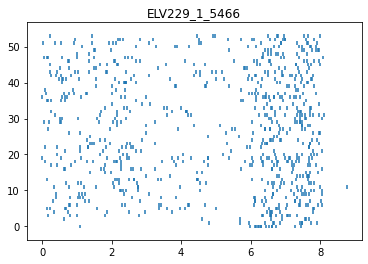

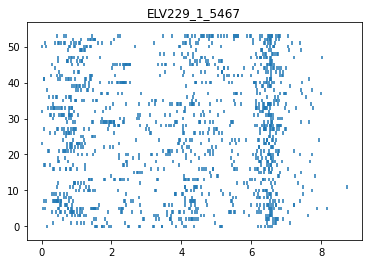

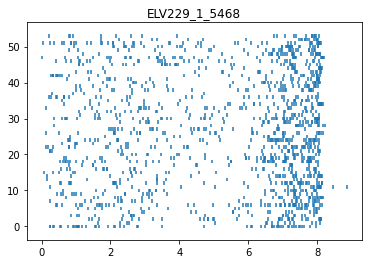

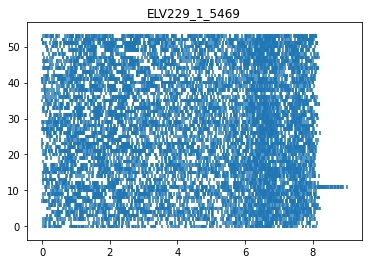

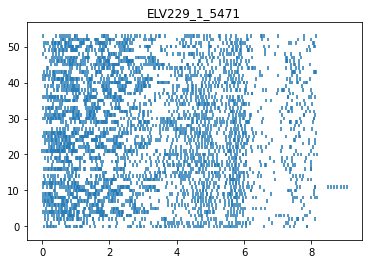

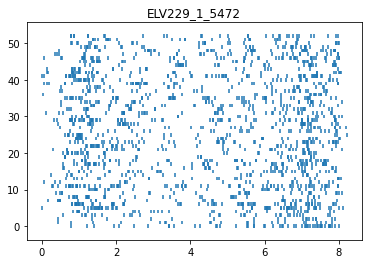

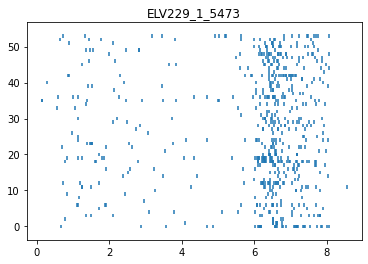

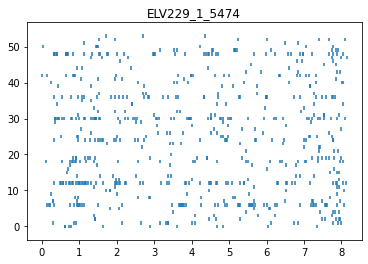

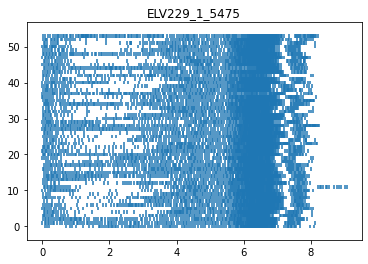

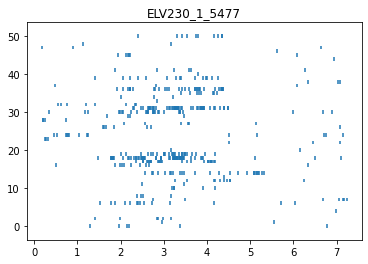

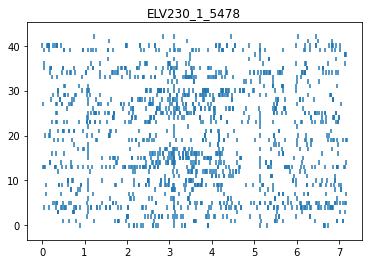

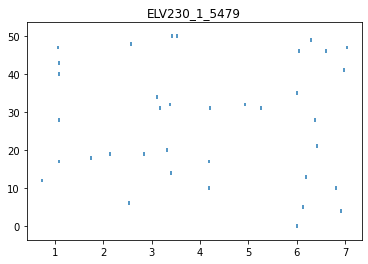

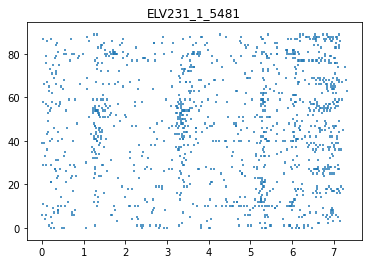

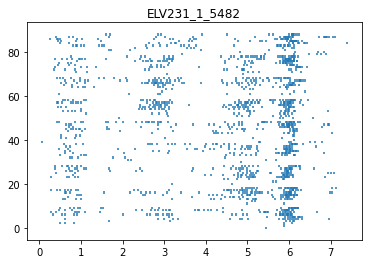

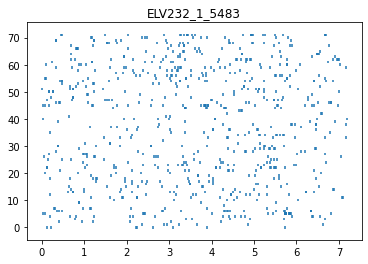

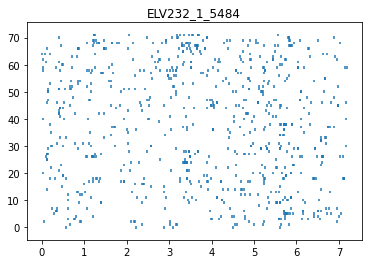

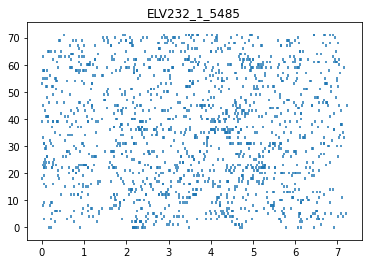

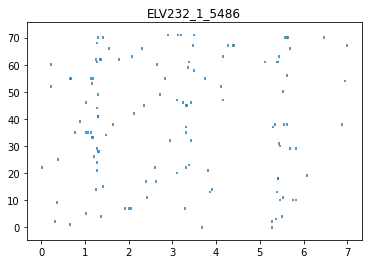

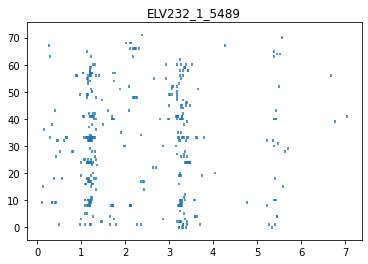

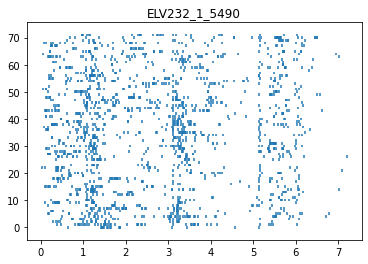

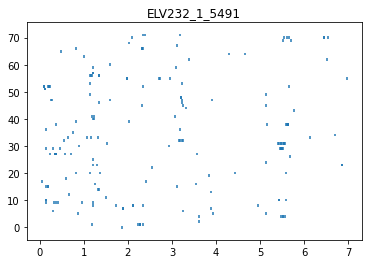

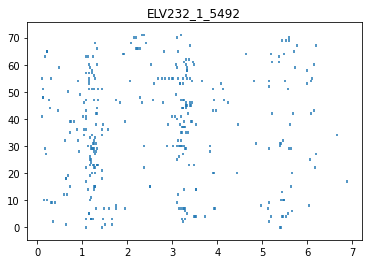

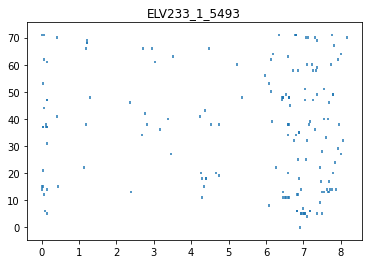

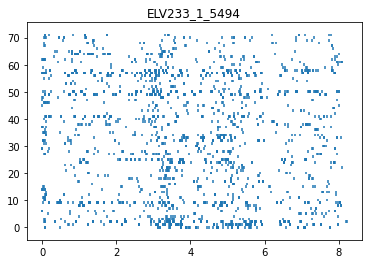

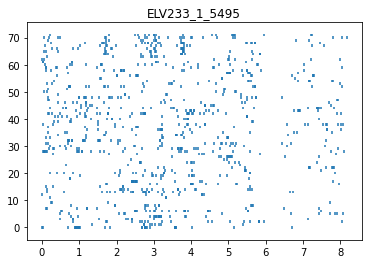

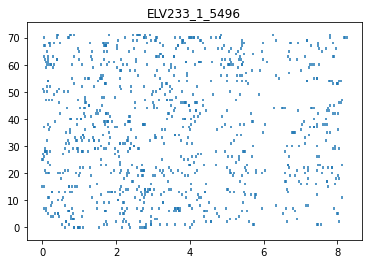

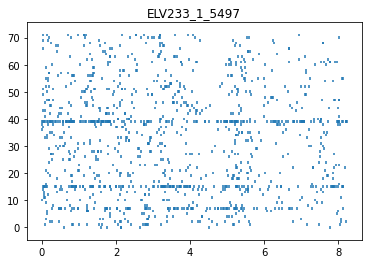

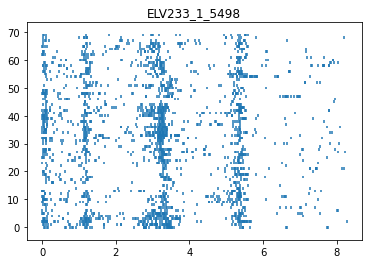

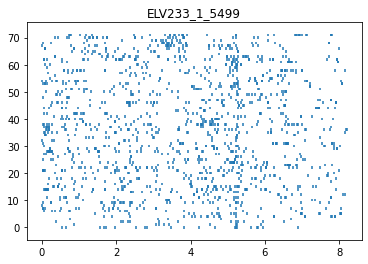

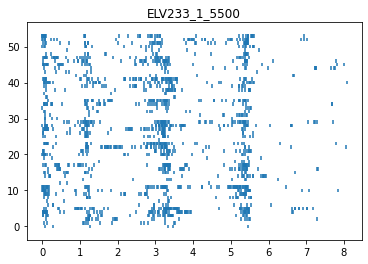

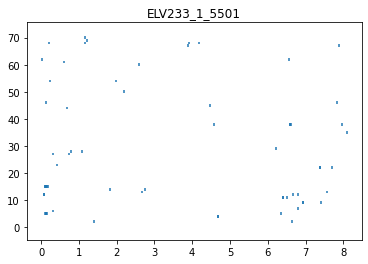

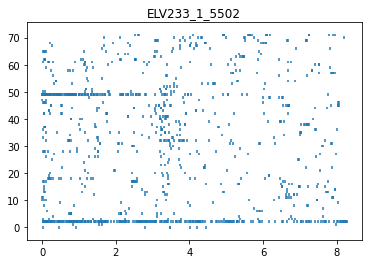

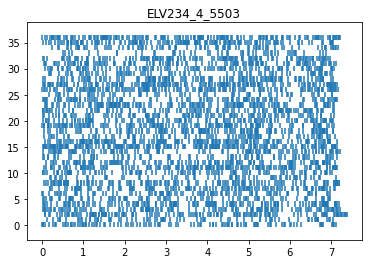

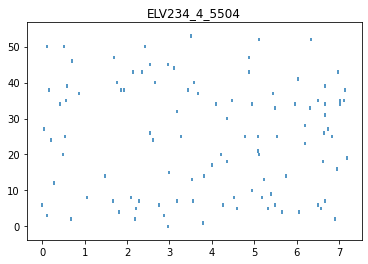

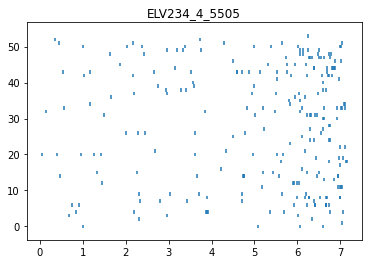

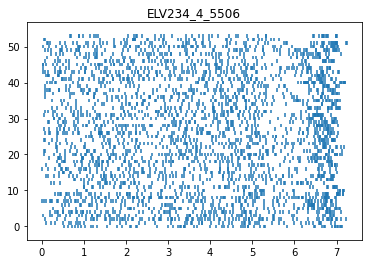

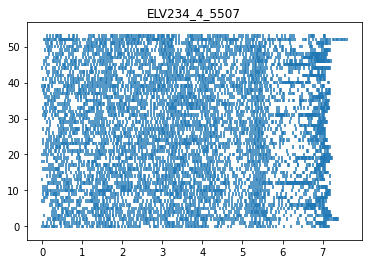

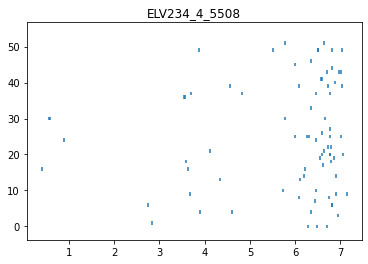

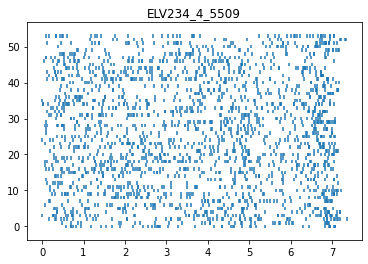

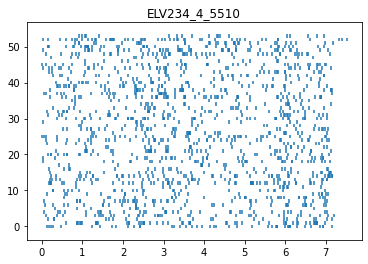

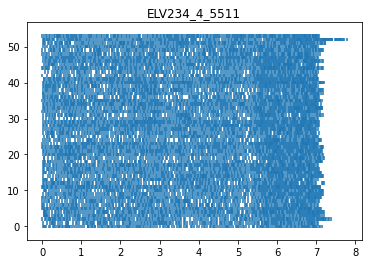

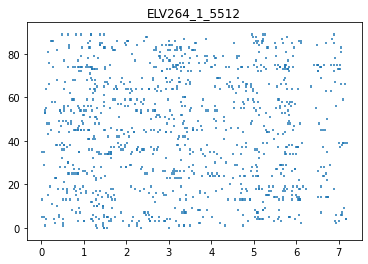

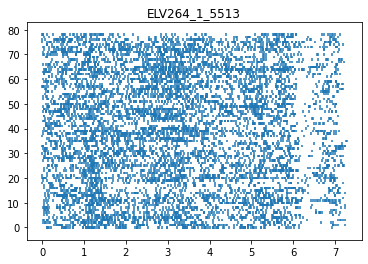

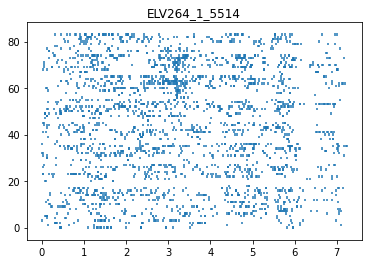

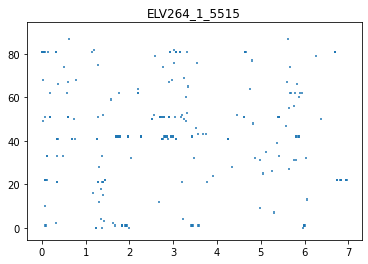

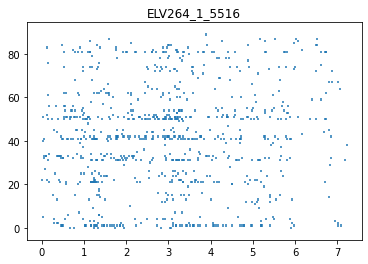

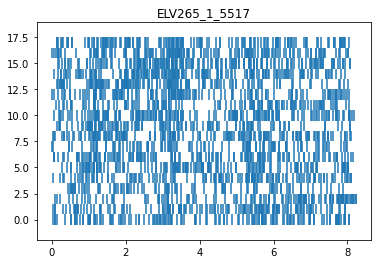

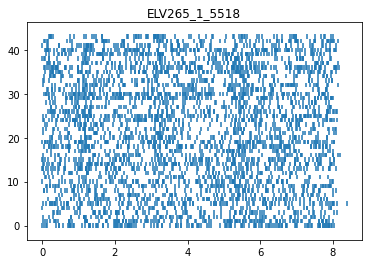

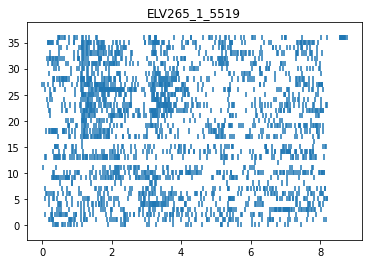

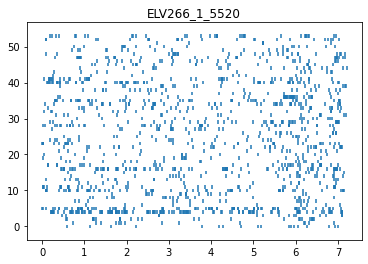

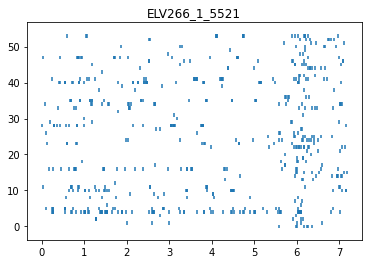

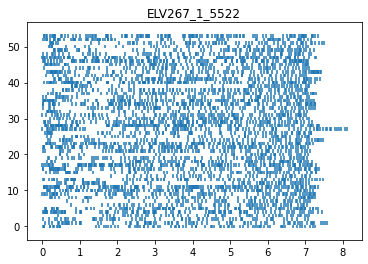

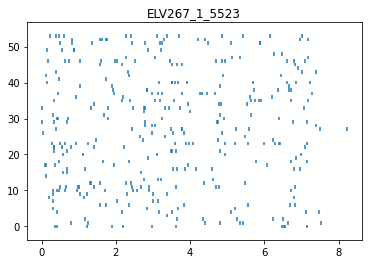

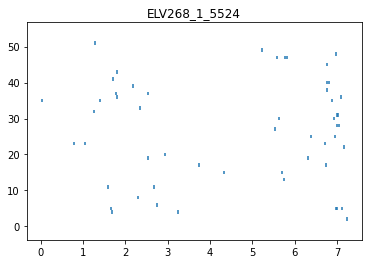

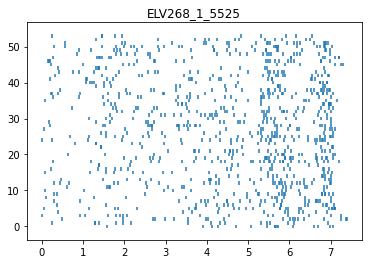

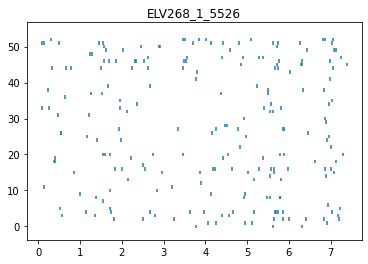

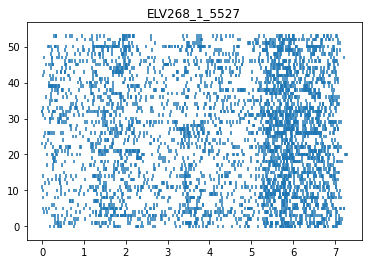

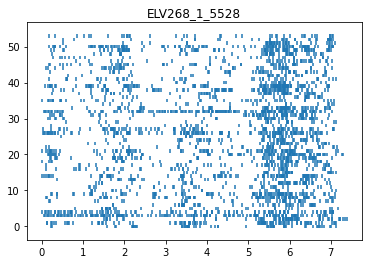

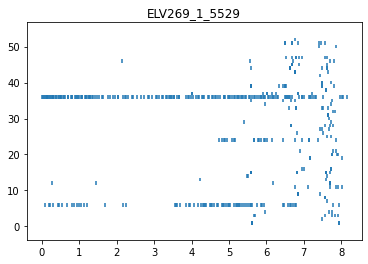

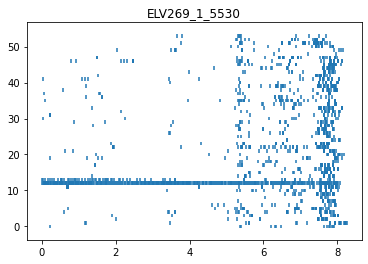

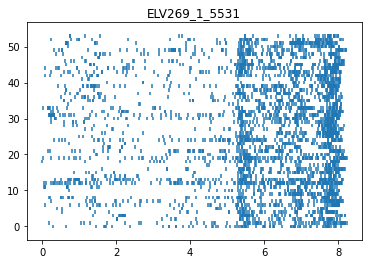

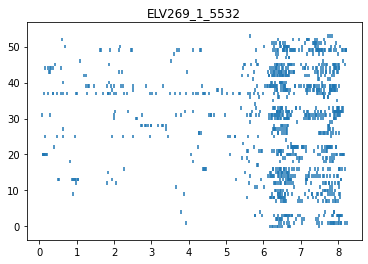

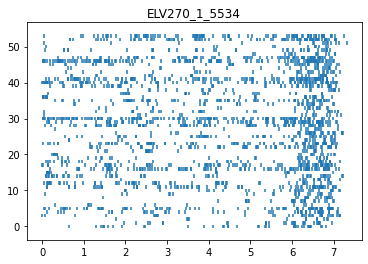

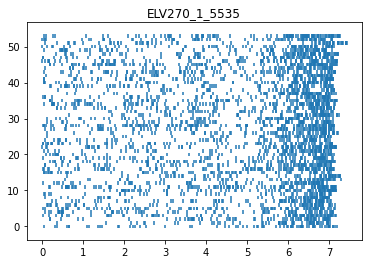

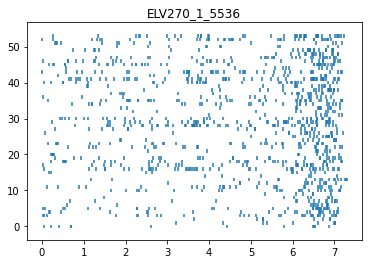

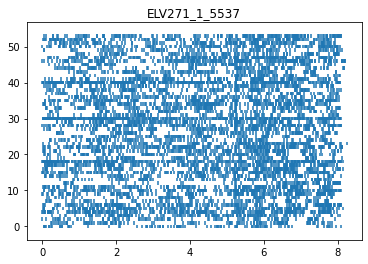

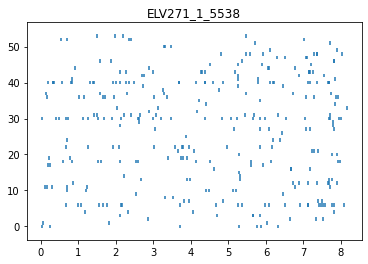

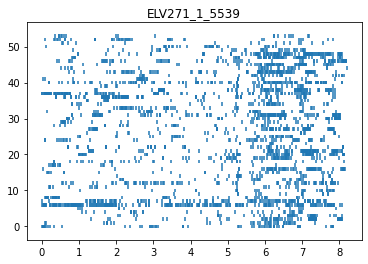

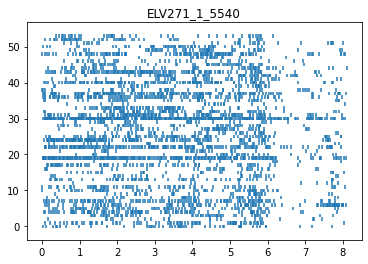

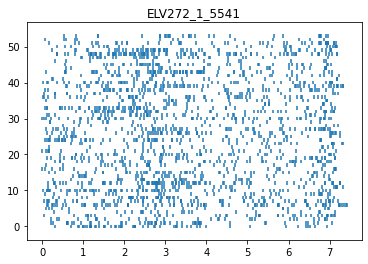

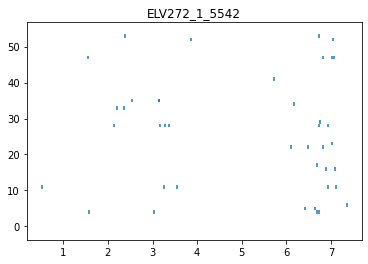

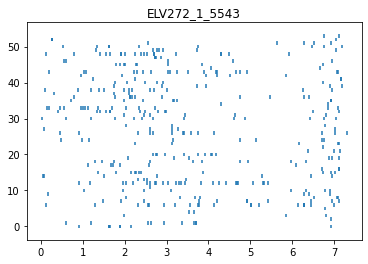

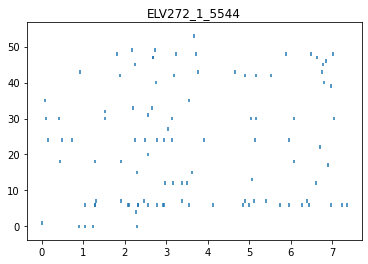

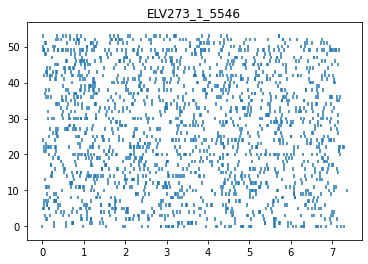

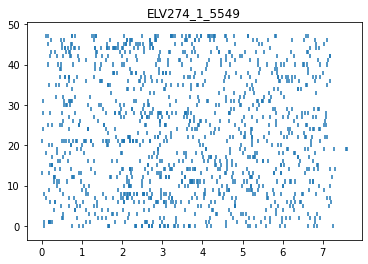

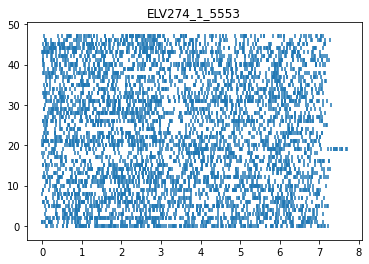

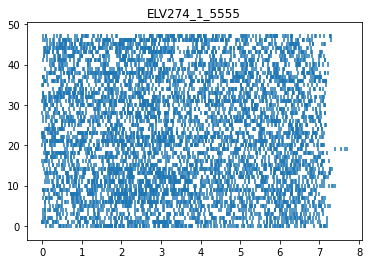

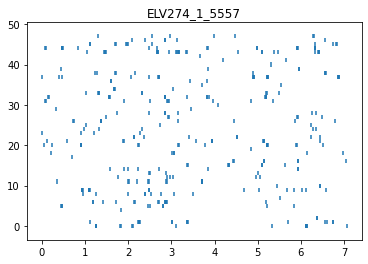

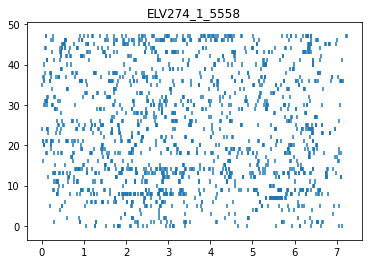

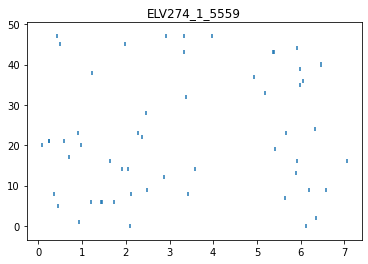

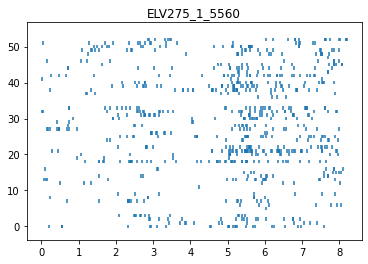

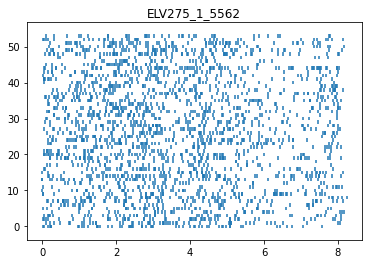

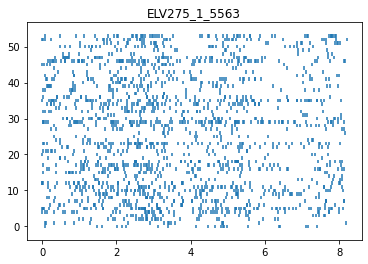

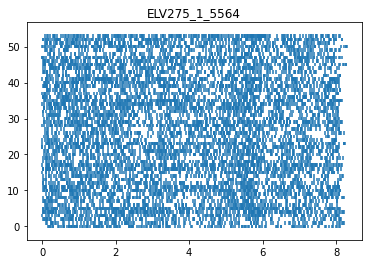

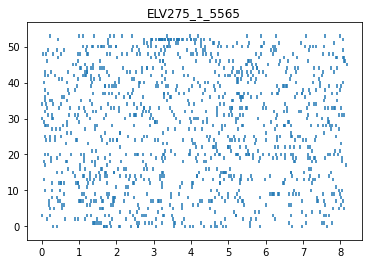

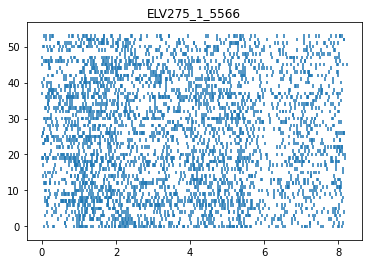

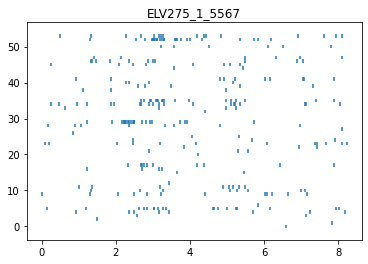

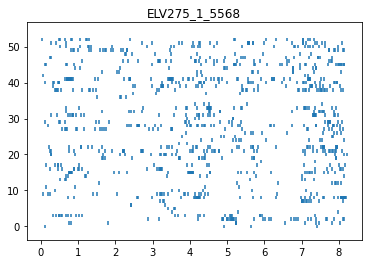

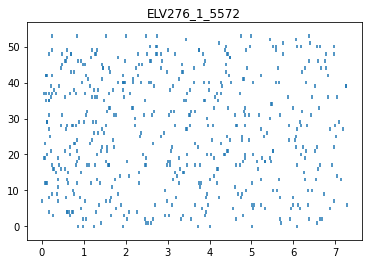

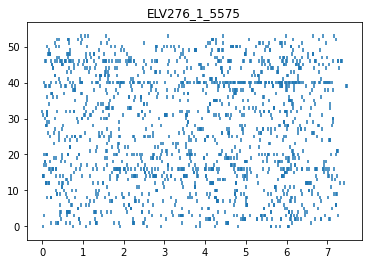

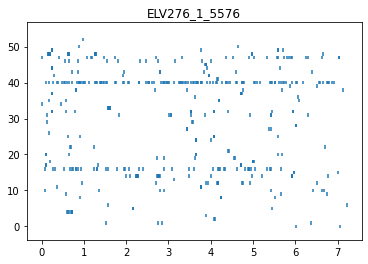

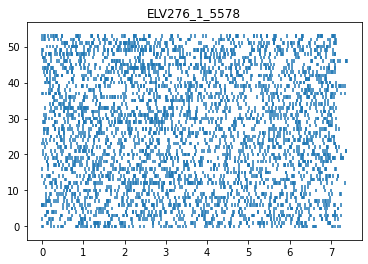

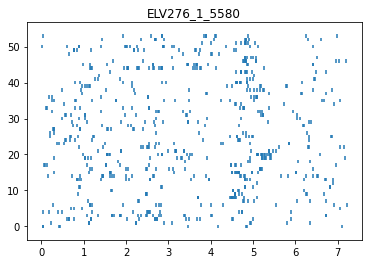

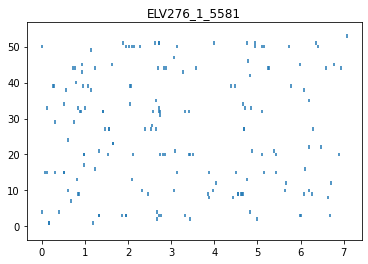

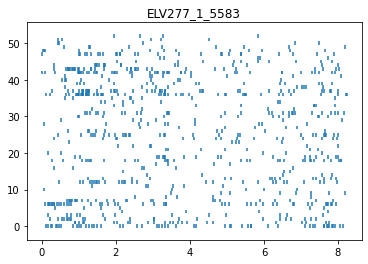

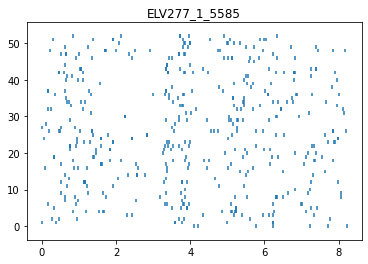

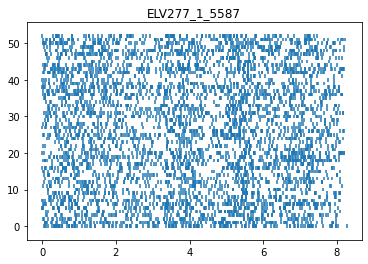

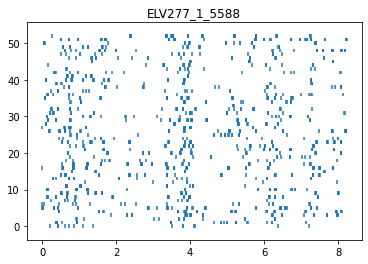

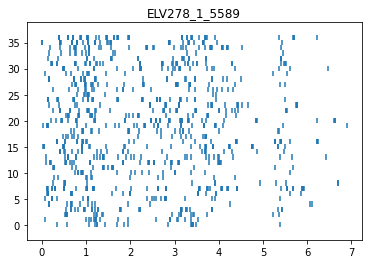

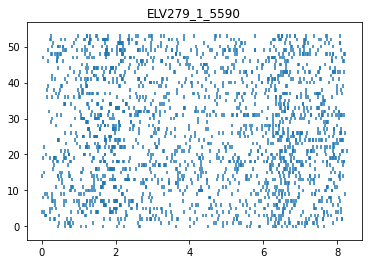

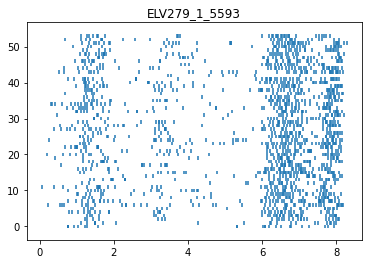

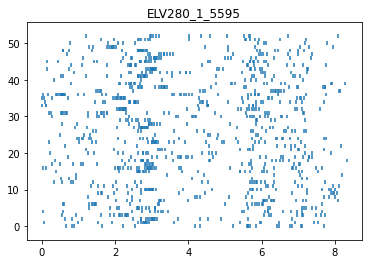

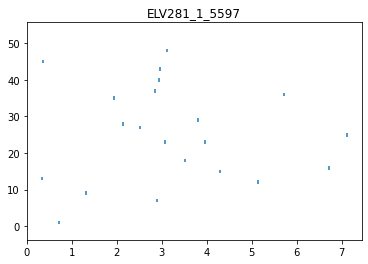

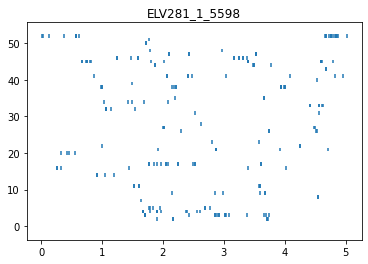

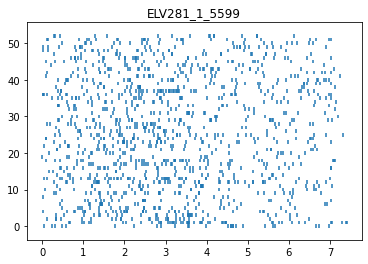

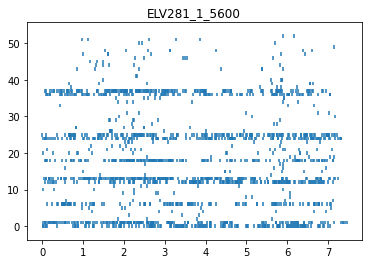

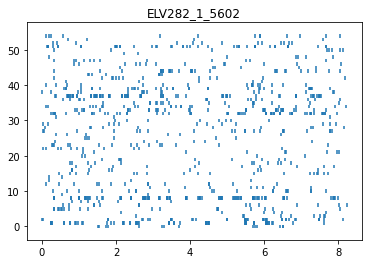

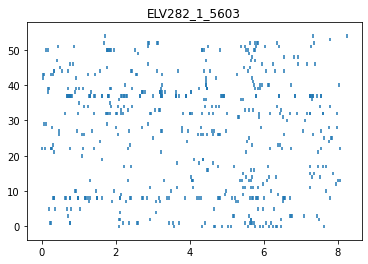

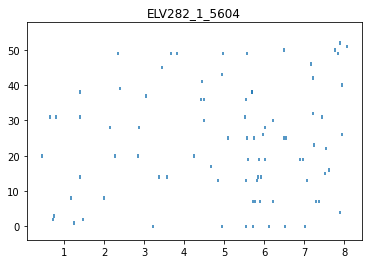

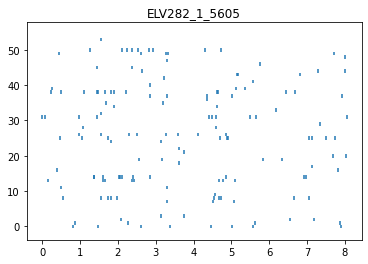

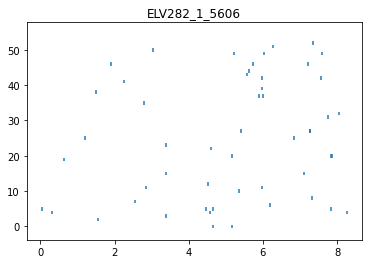

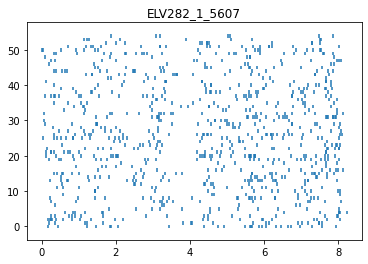

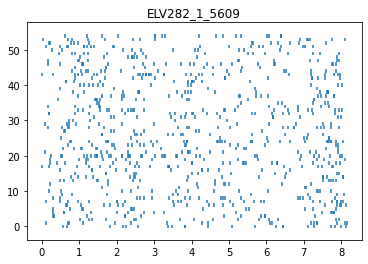

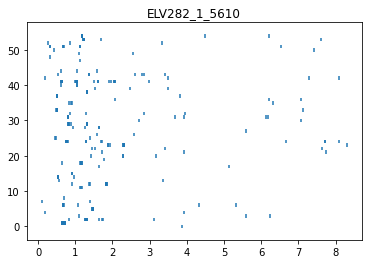

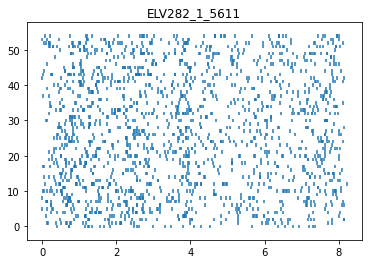

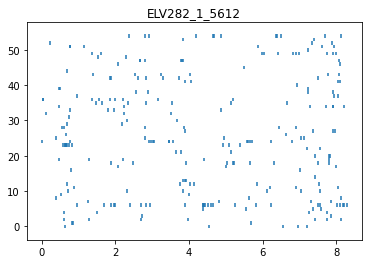

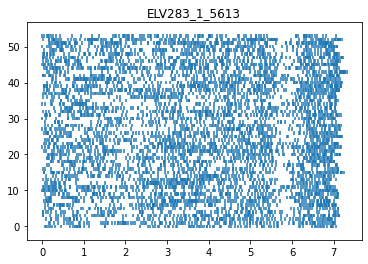

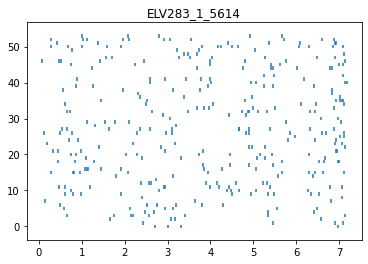

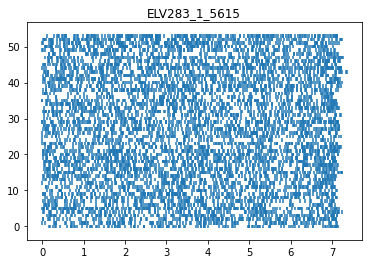

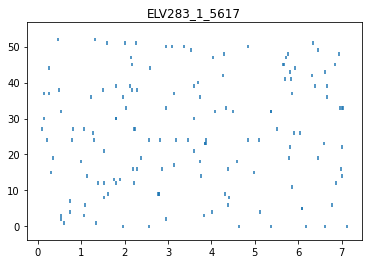

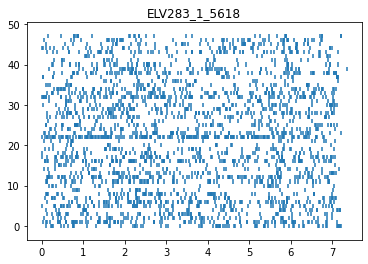

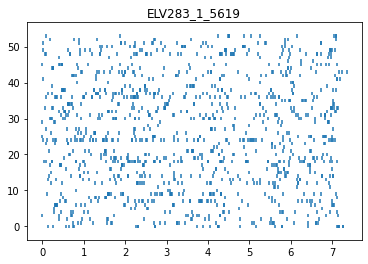

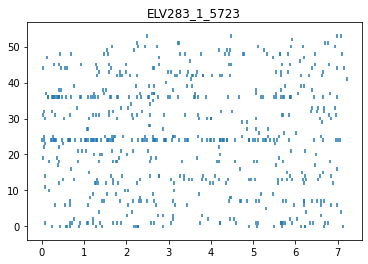

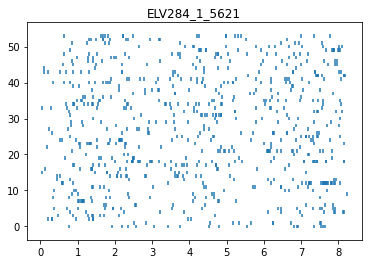

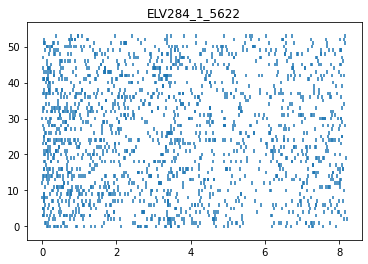

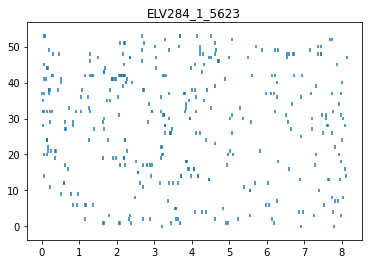

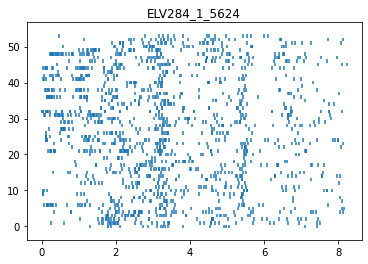

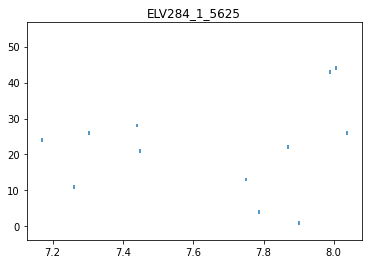

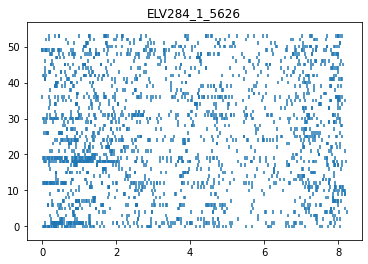

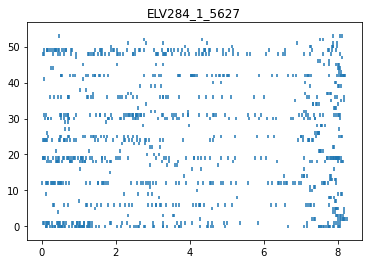

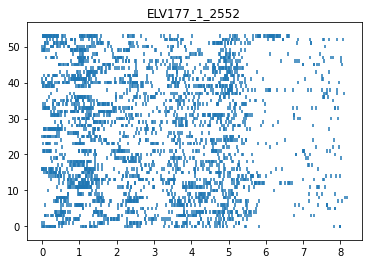

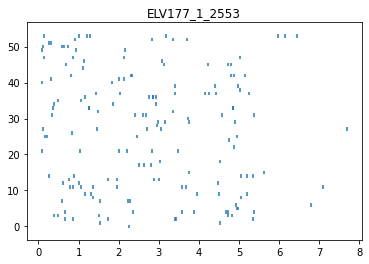

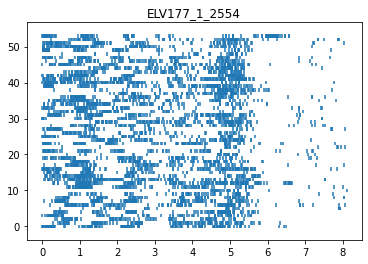

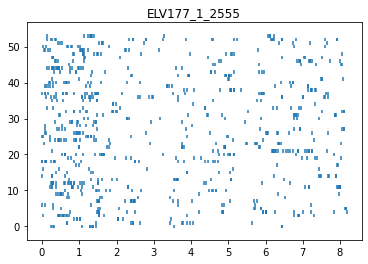

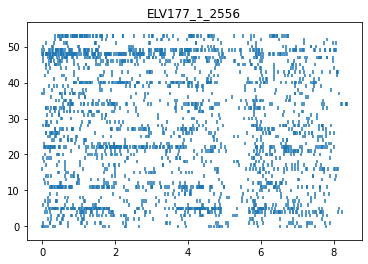

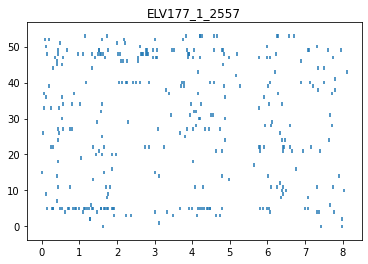

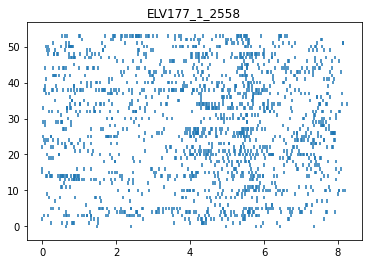

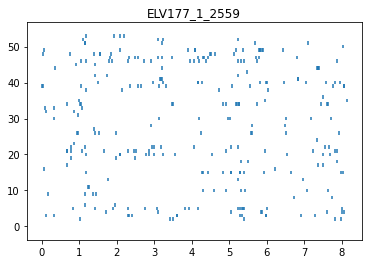

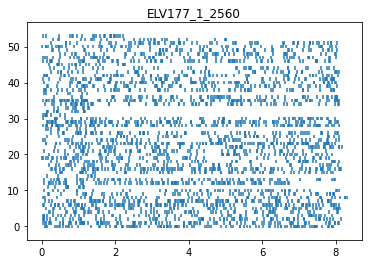

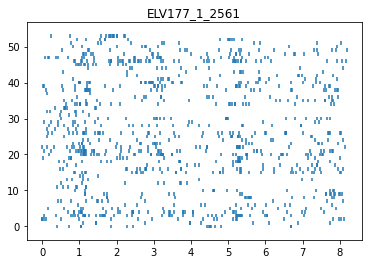

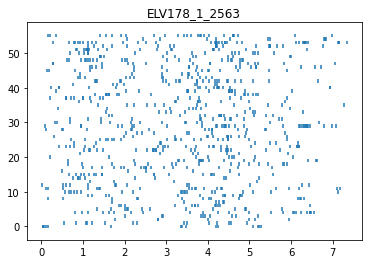

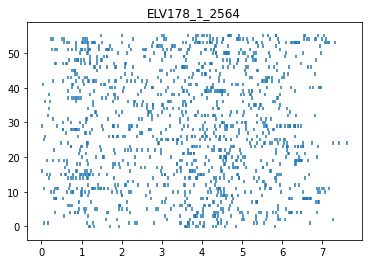

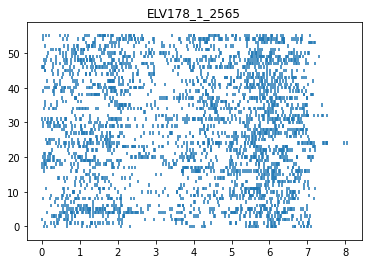

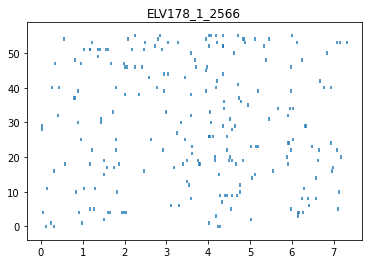

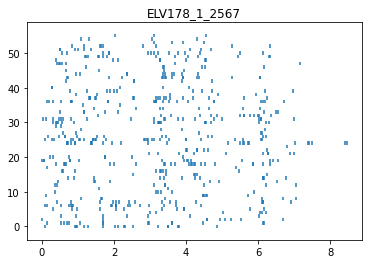

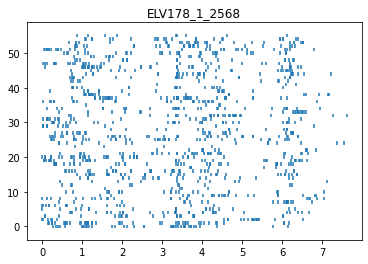

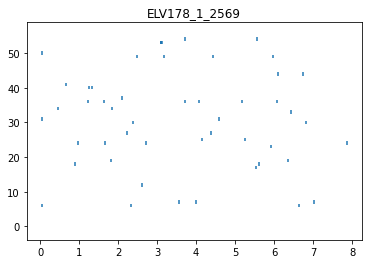

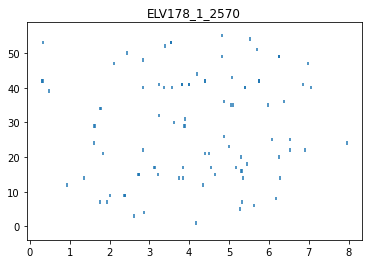

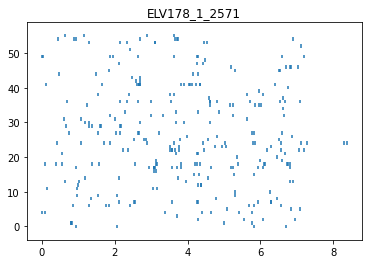

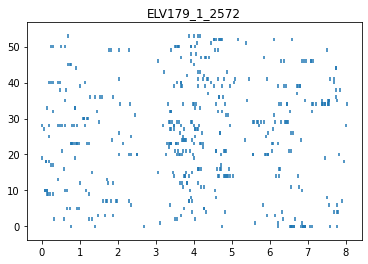

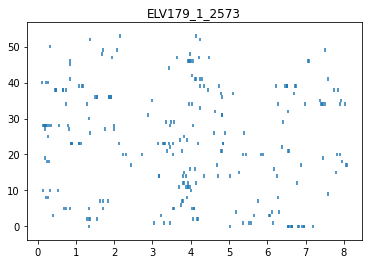

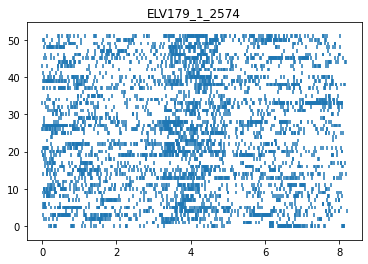

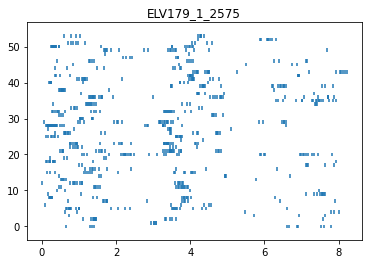

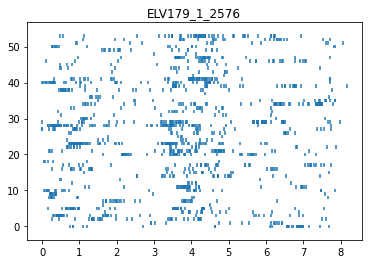

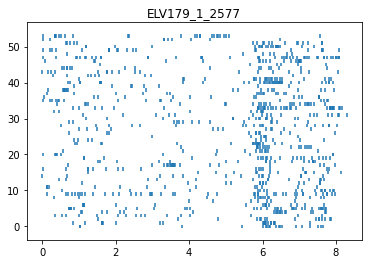

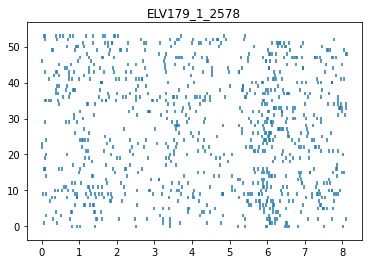

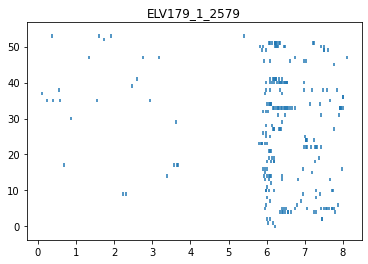

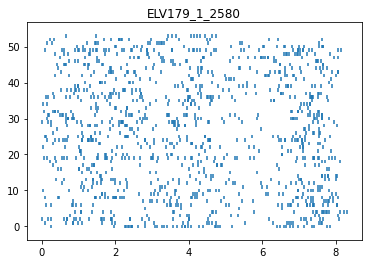

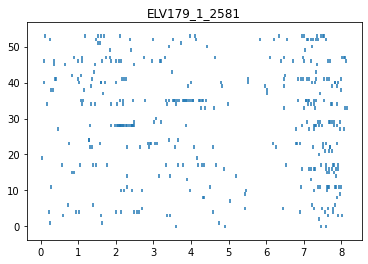

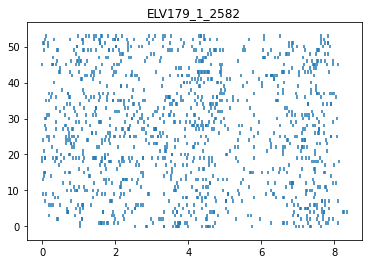

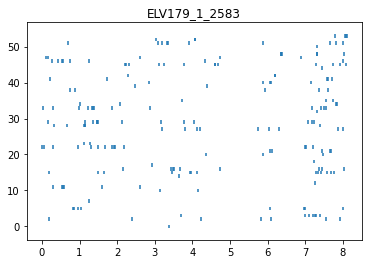

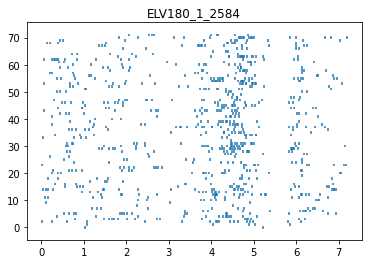

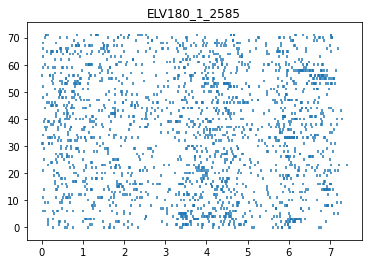

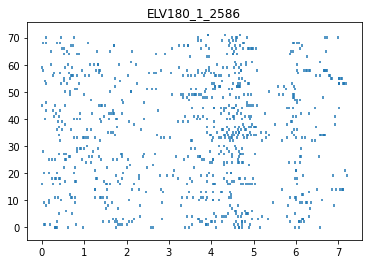

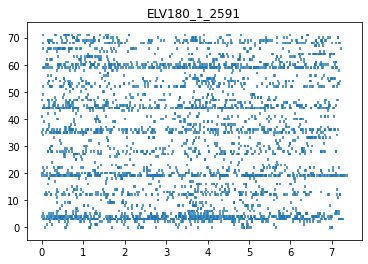

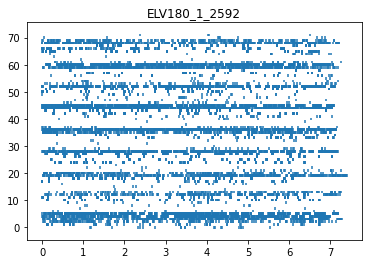

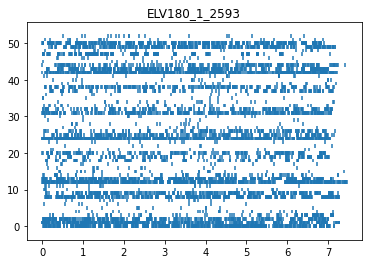

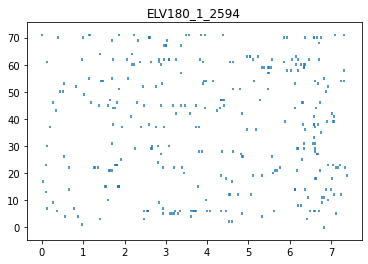

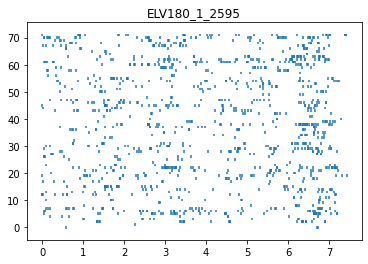

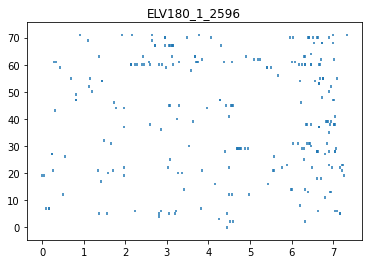

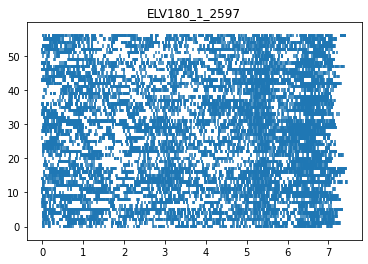

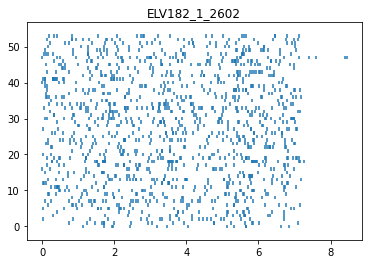

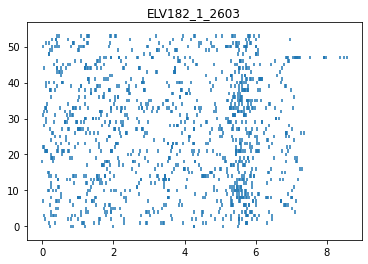

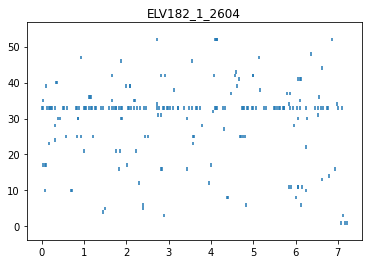

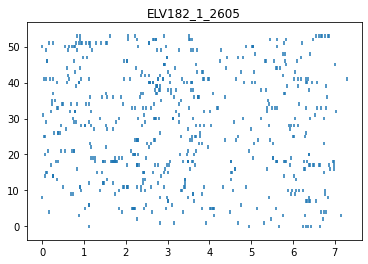

In [21]:
for key, val in all_ST.items():
    plt.title(key)
    plt.eventplot(get_spike_trains_as_list(val))
    plt.show()

## Binarising spike times into spike trains

## Kernel Smoothing

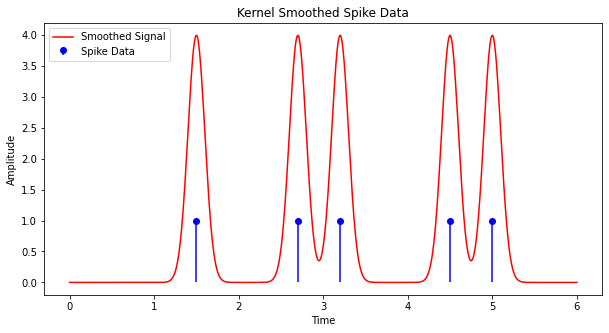

In [22]:
def gaussian_kernel(x, sigma=1.0):
    return np.exp(-(x ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))

def kernel_smooth_spike_data(spike_times, time_range, kernel_sigma=0.1, num_points=1000):
    time_points = np.linspace(time_range[0], time_range[1], num_points)
    smoothed_signal = np.zeros_like(time_points)

    for spike_time in spike_times:
        kernel = gaussian_kernel(time_points - spike_time, sigma=kernel_sigma)
        smoothed_signal += kernel

    return smoothed_signal

# Sample spike data (replace this with your actual spike data)
spike_times = [1.5, 2.7, 3.2, 4.5, 5.0]
time_range = [0, 6]  # Define the time range for kernel smoothing

# Smooth the spike data
smoothed_signal = kernel_smooth_spike_data(spike_times, time_range)

# Plot the original spike data and the smoothed signal
plt.figure(figsize=(10, 5))
plt.stem(spike_times, np.ones_like(spike_times), linefmt='b-', markerfmt='bo', basefmt=' ')
plt.plot(np.linspace(time_range[0], time_range[1], len(smoothed_signal)), smoothed_signal, 'r-')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Kernel Smoothed Spike Data')
plt.legend(['Smoothed Signal', 'Spike Data'])
plt.show()


In [23]:
non_zero_mask = [i for i in range(len(all_ST['ELV104_1_2071'])) if all_ST['ELV104_1_2071'][i].shape[0]>0]

time_range = [min([all_ST['ELV104_1_2071'][i].min() for i in non_zero_mask]), max([all_ST['ELV104_1_2071'][i].max() for i in non_zero_mask])]
print('time_range',time_range)

trial_fr = [kernel_smooth_spike_data(all_ST['ELV104_1_2071'][i][0], time_range) for i in non_zero_mask]

time_range [0.0013, 7.258324999999999]


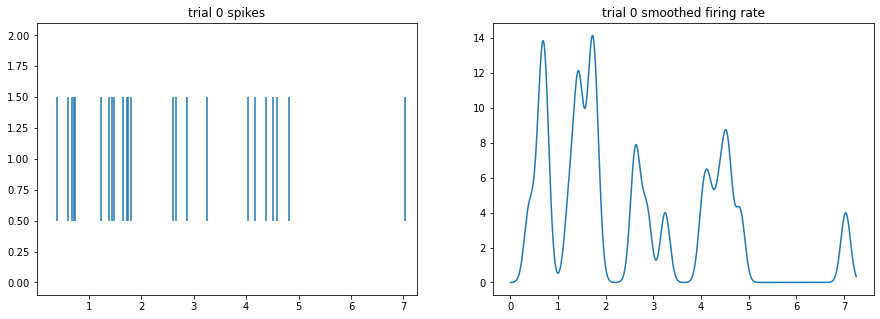

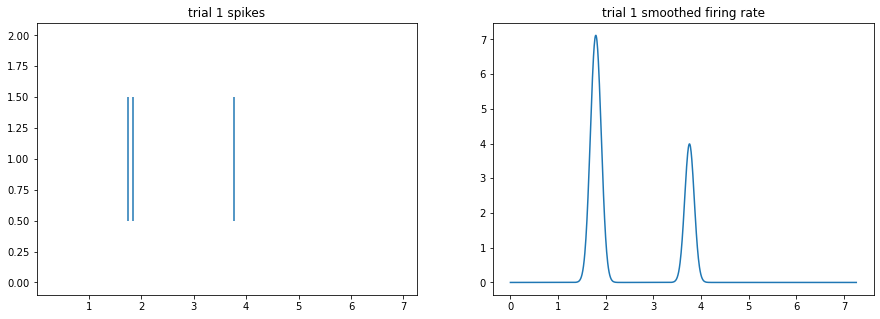

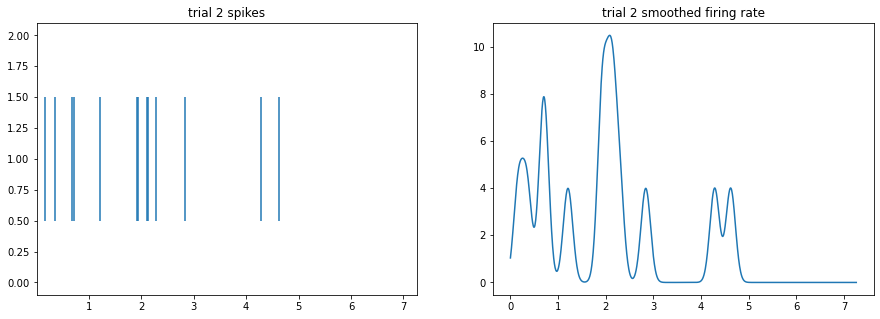

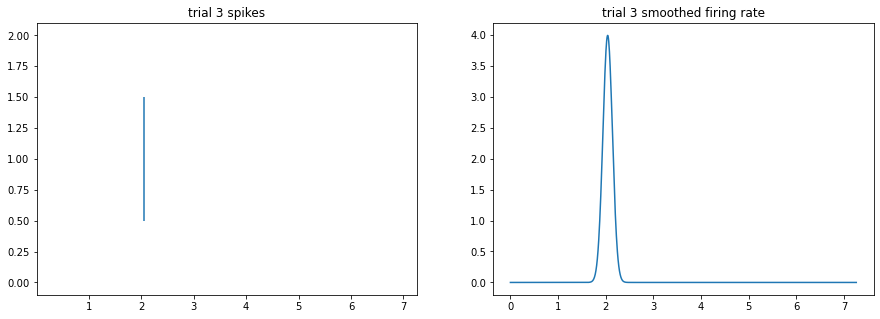

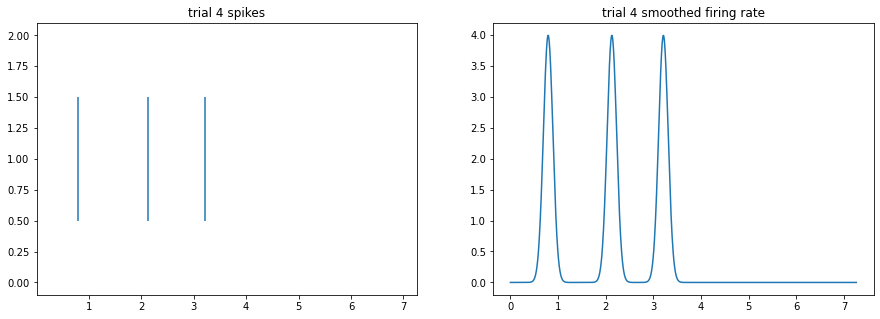

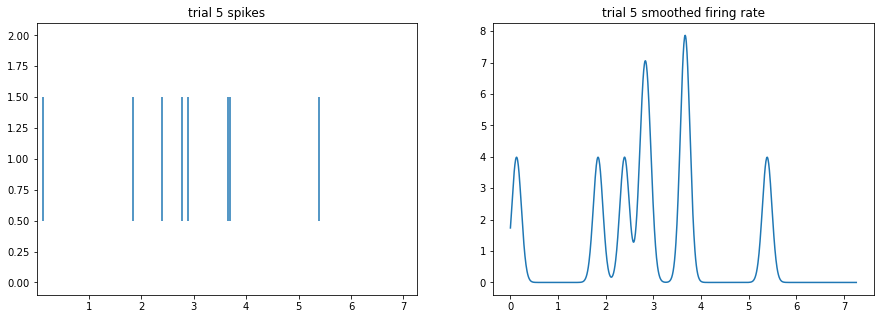

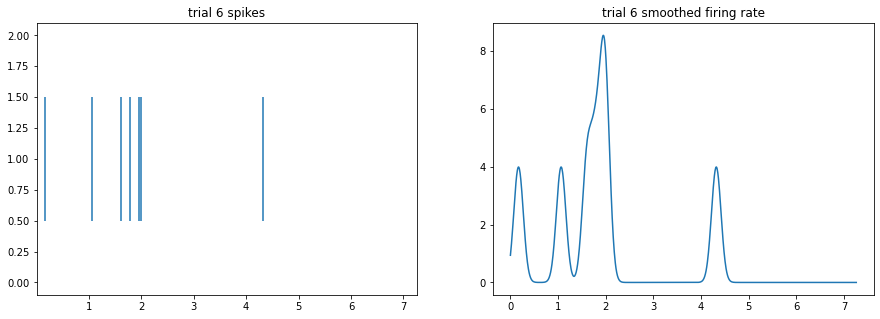

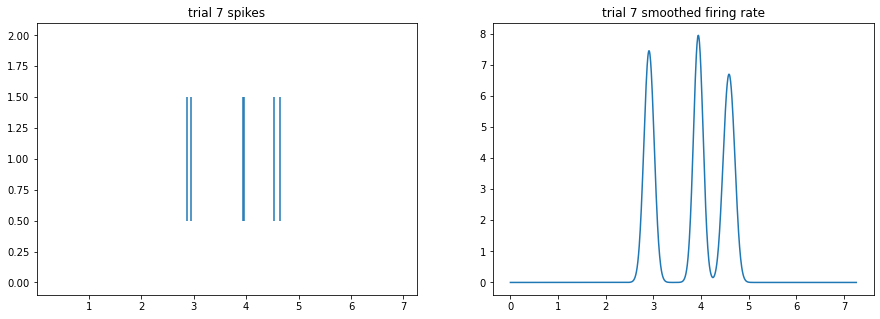

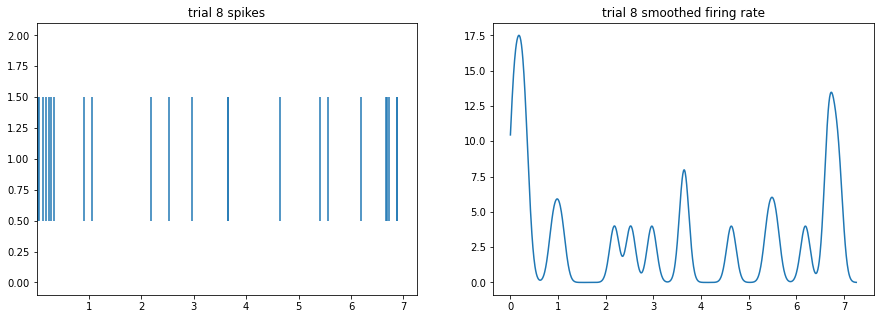

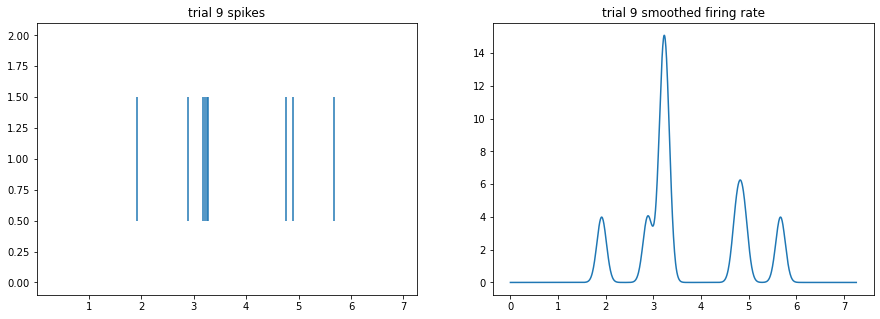

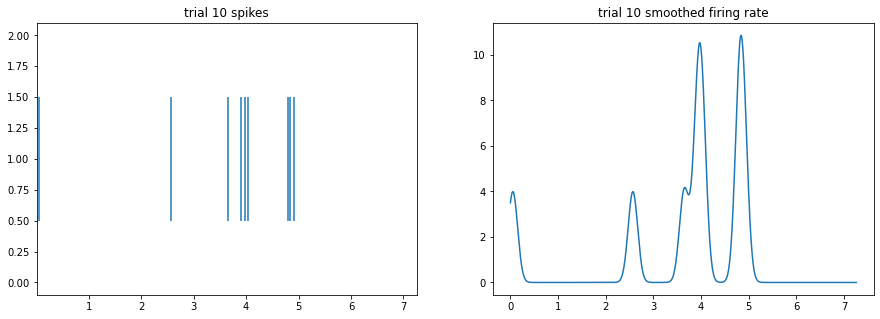

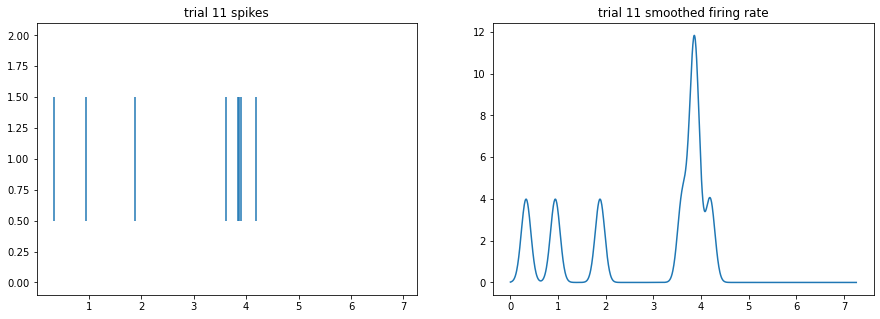

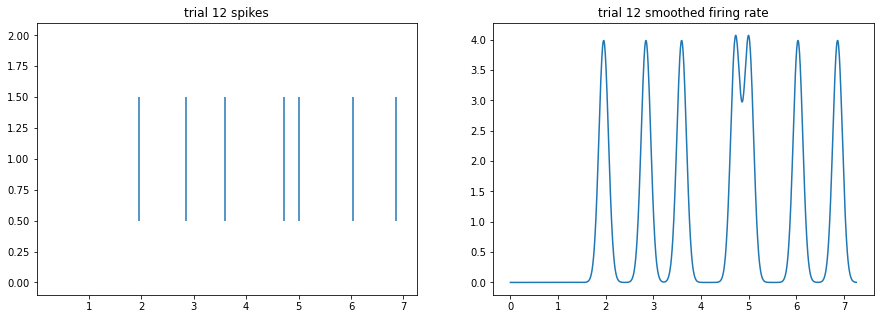

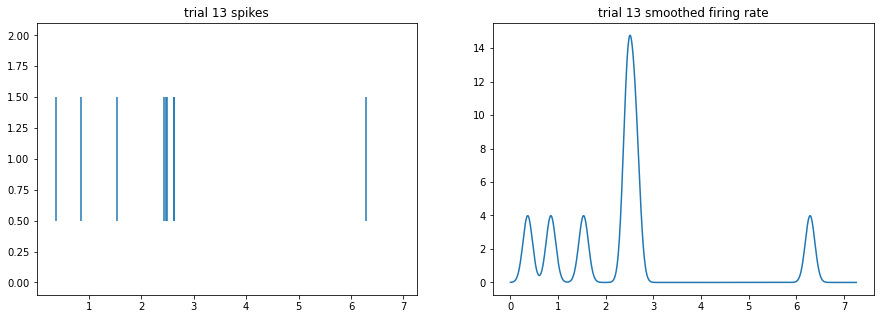

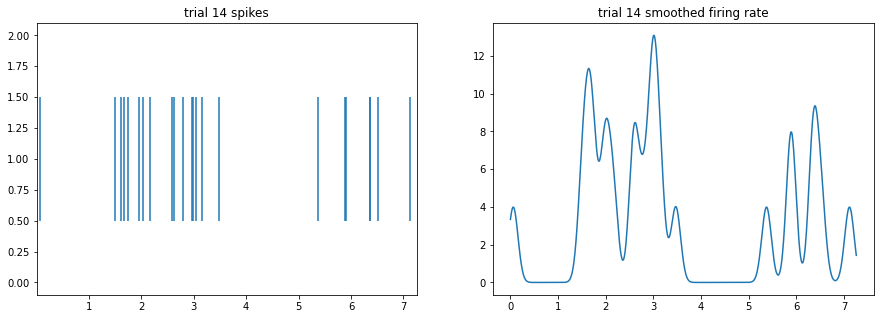

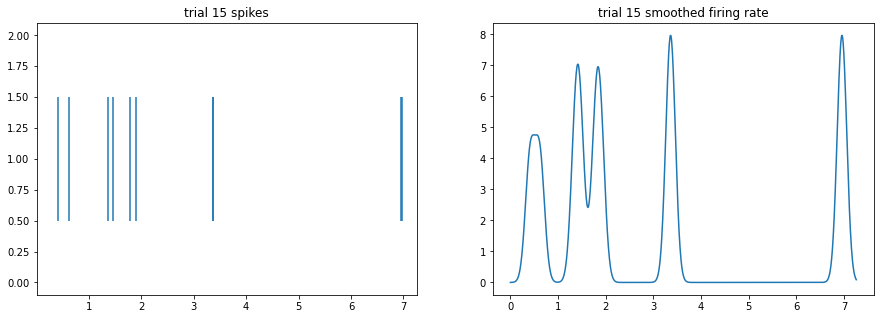

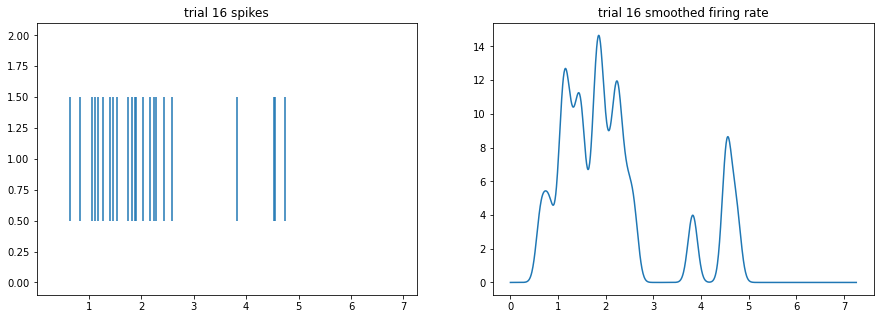

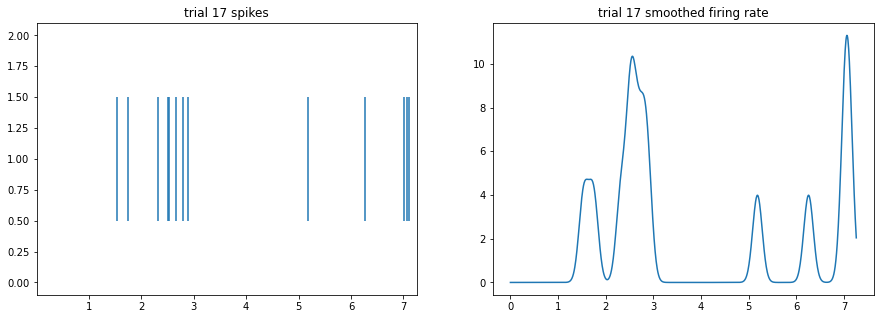

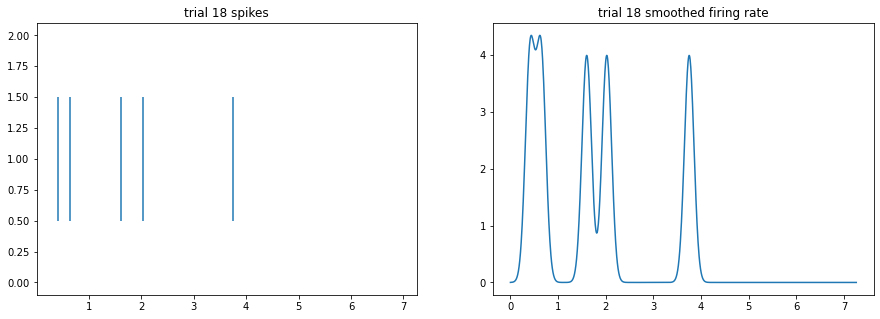

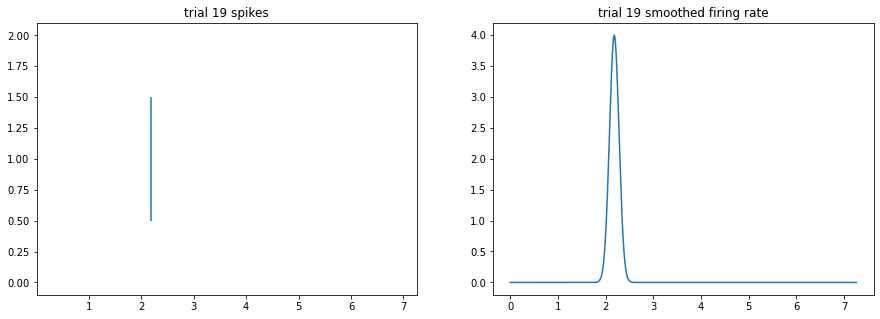

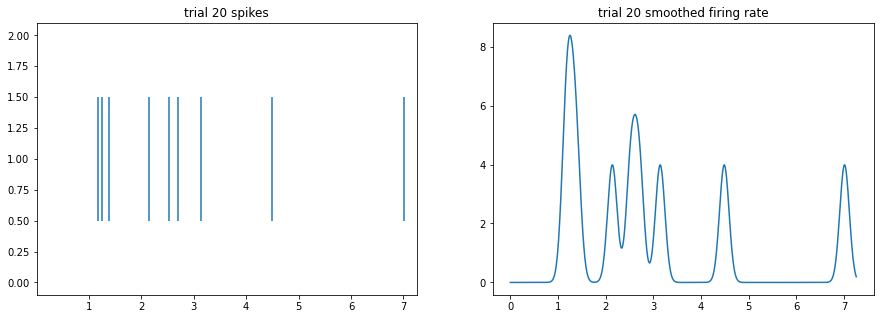

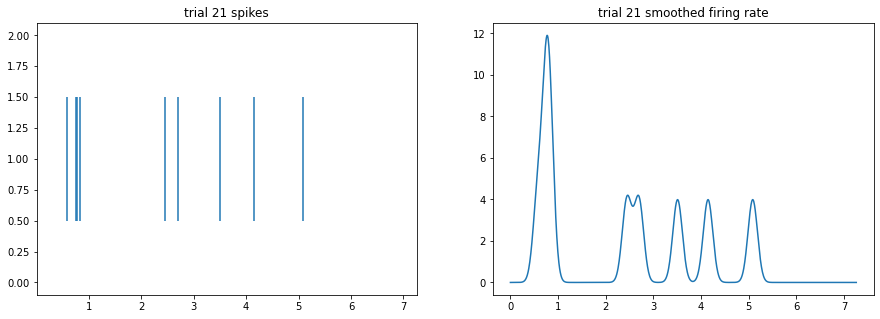

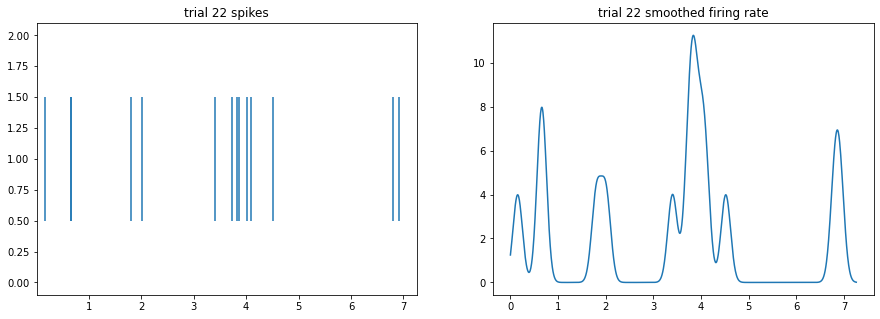

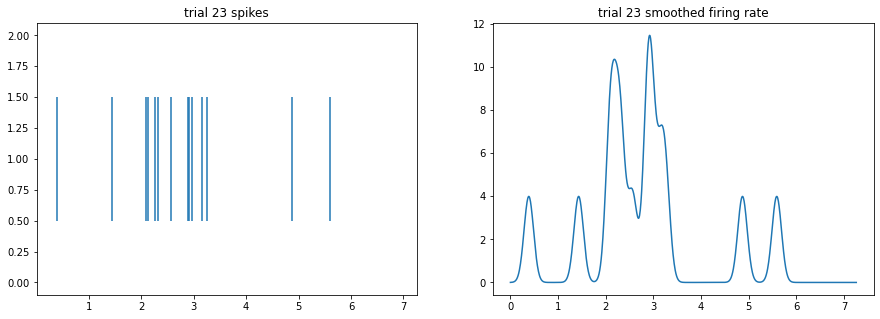

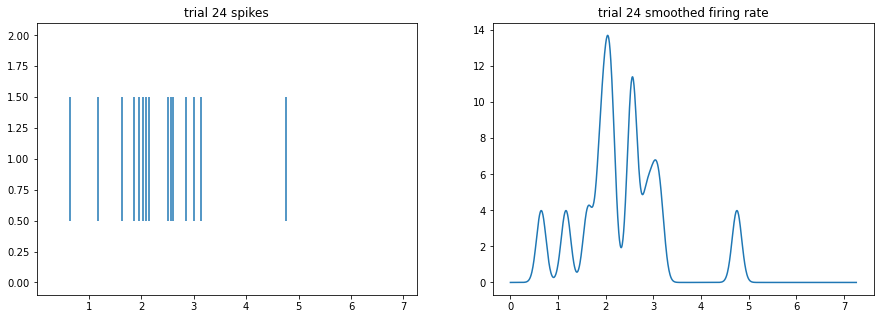

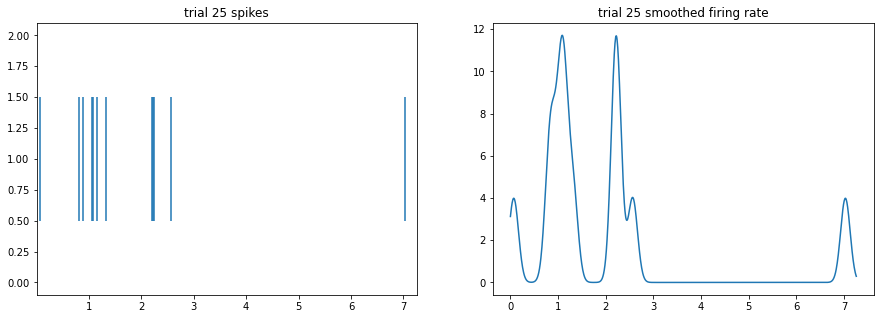

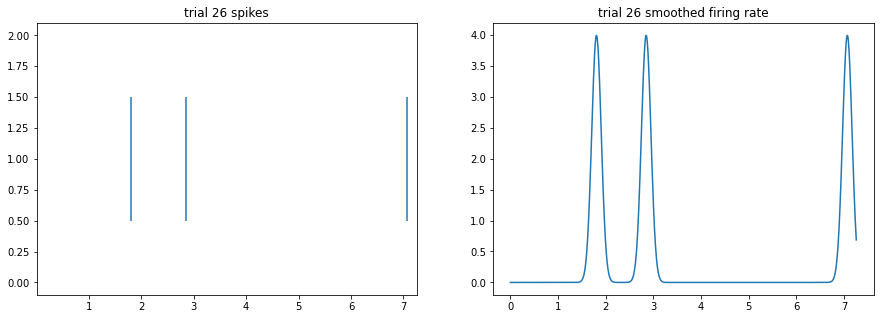

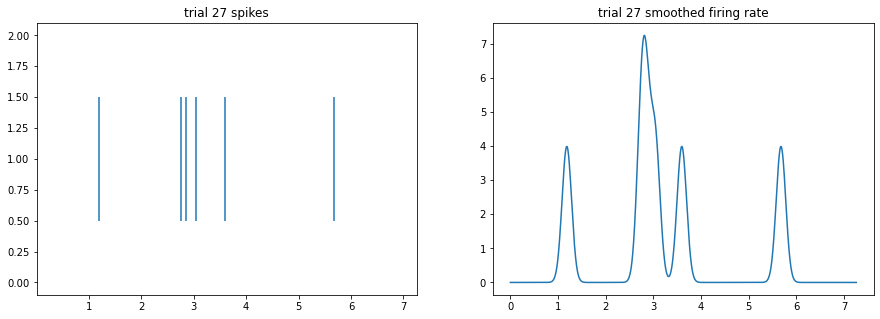

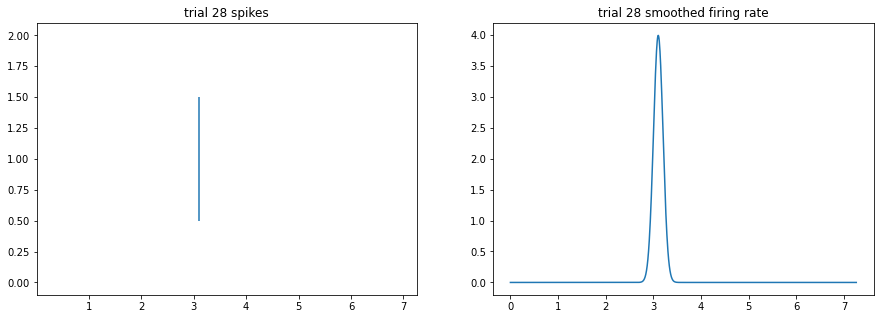

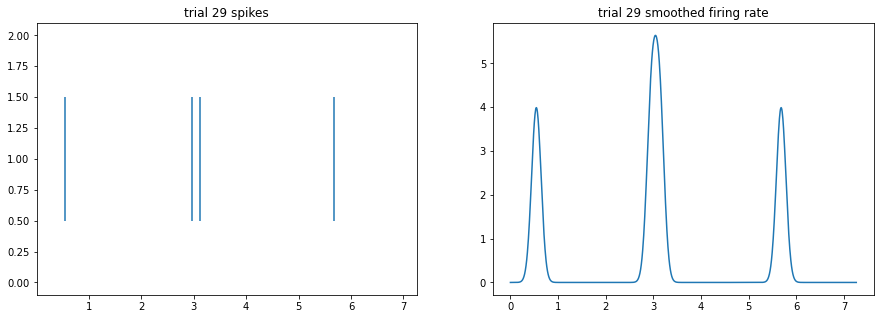

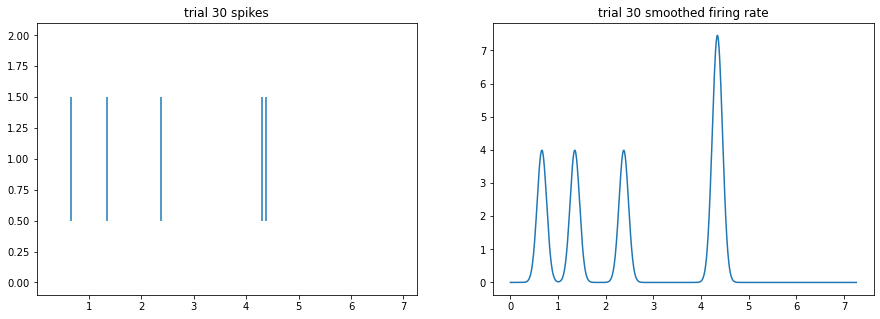

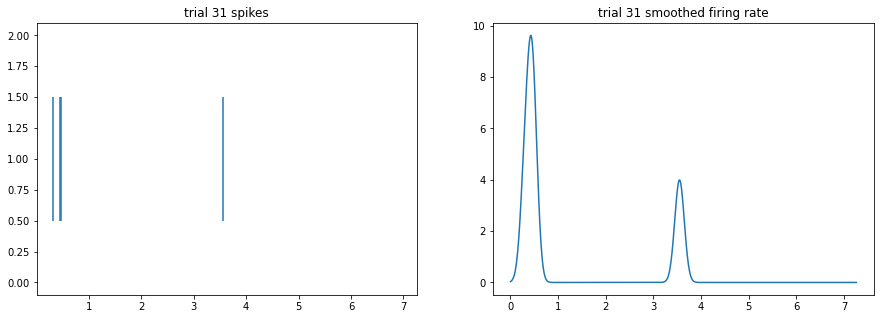

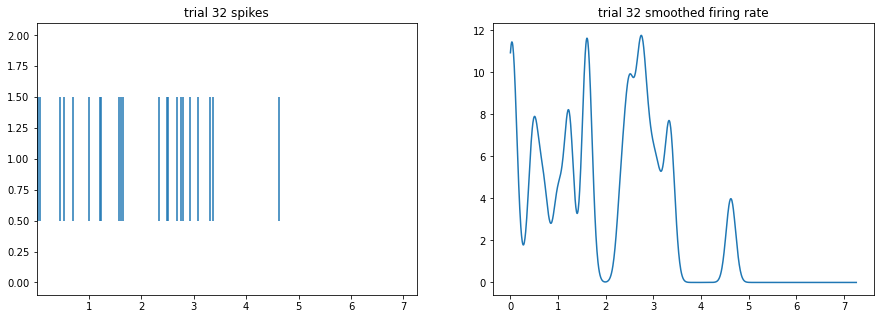

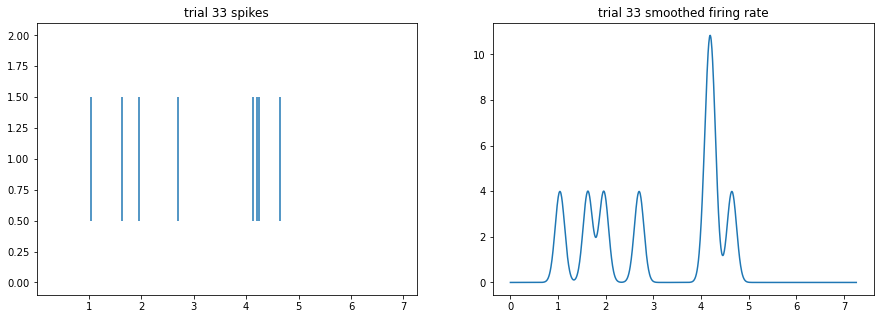

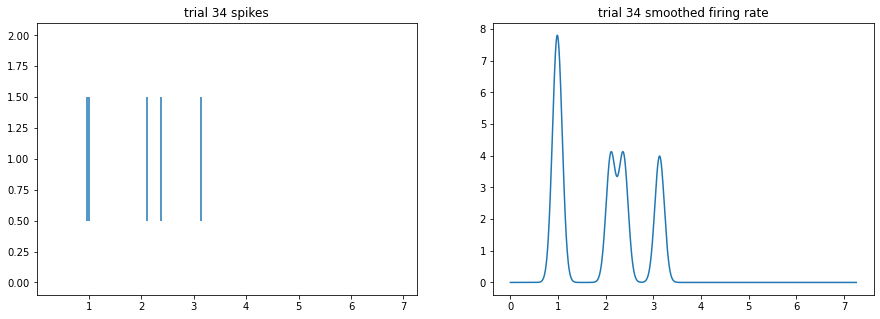

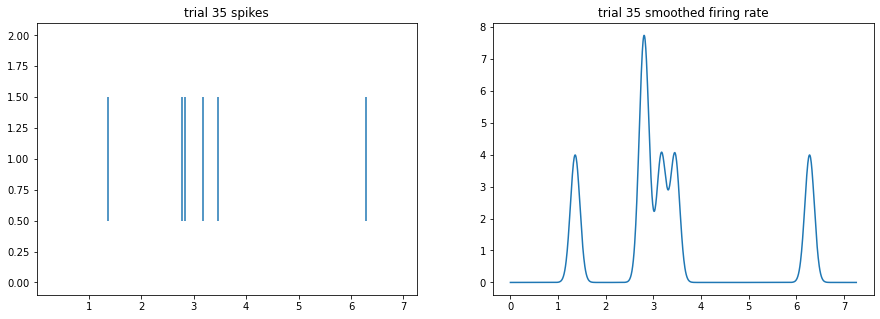

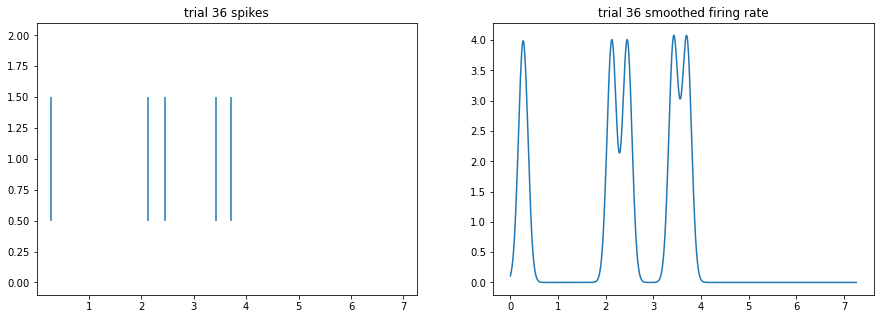

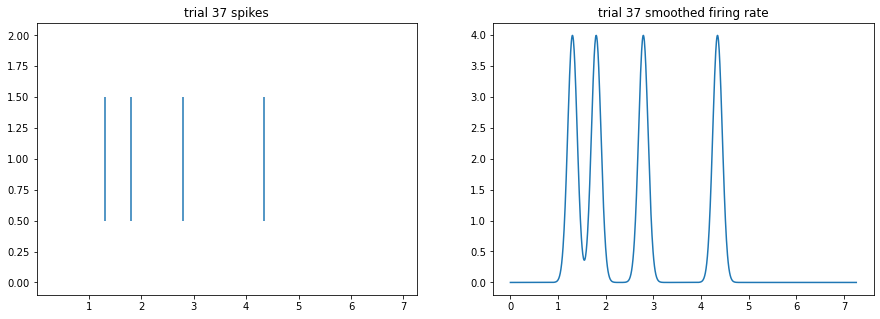

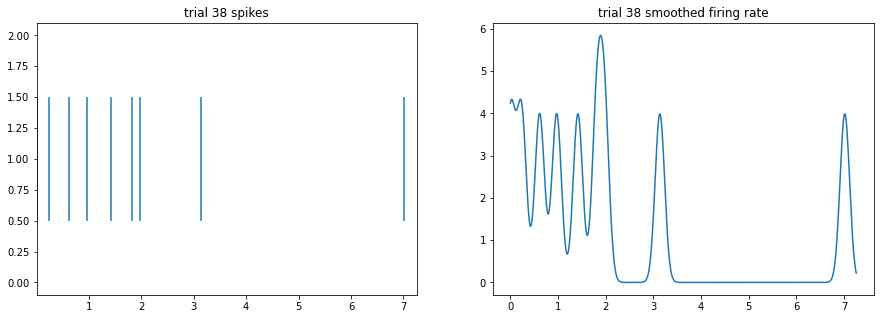

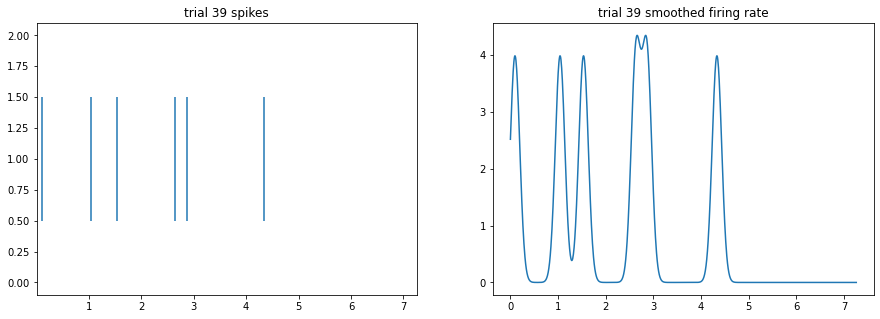

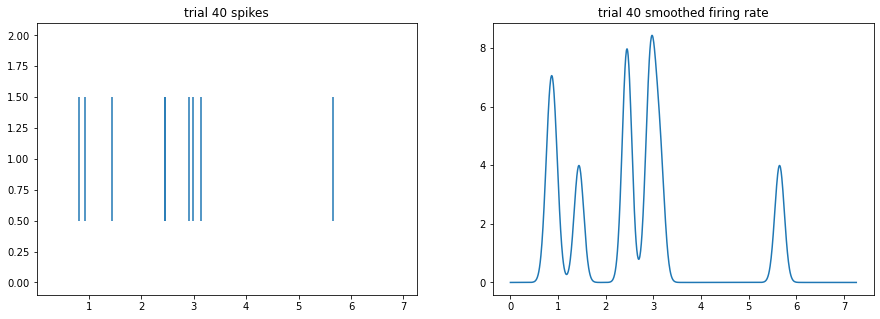

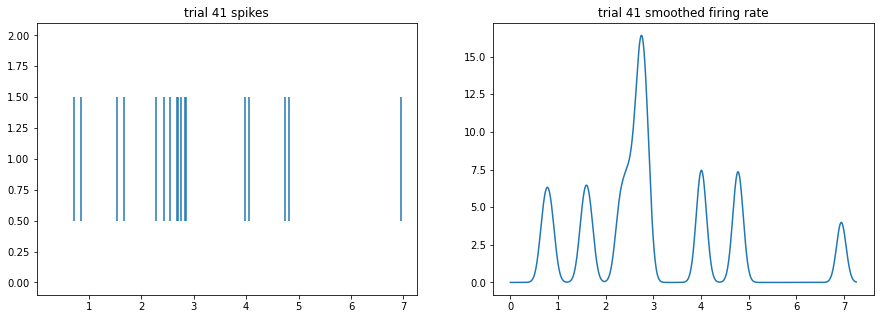

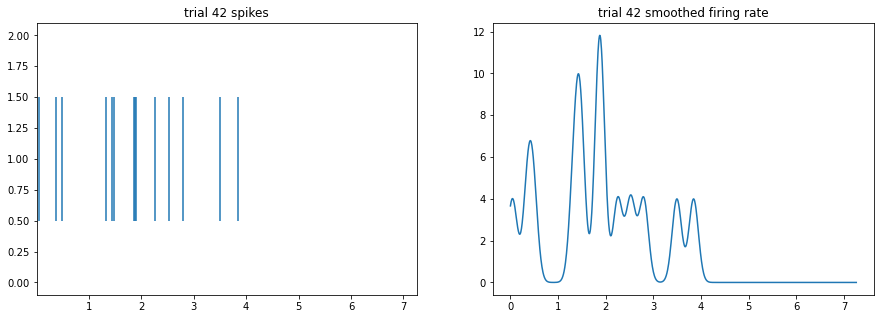

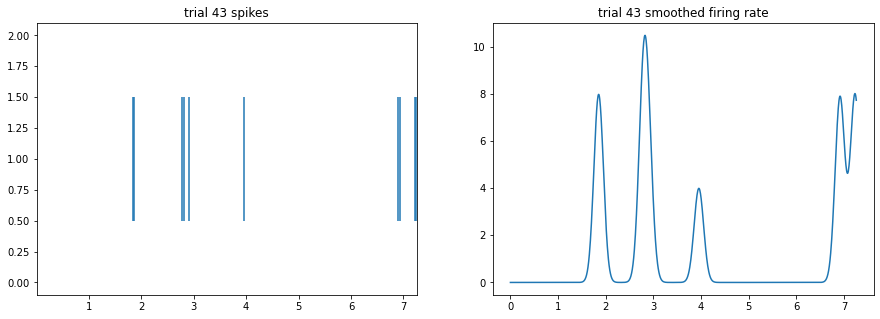

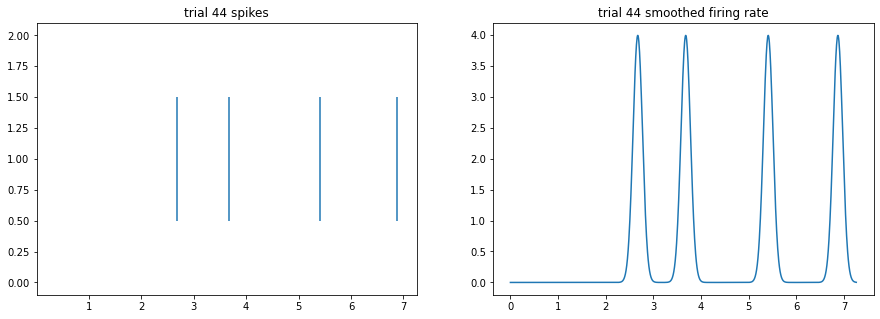

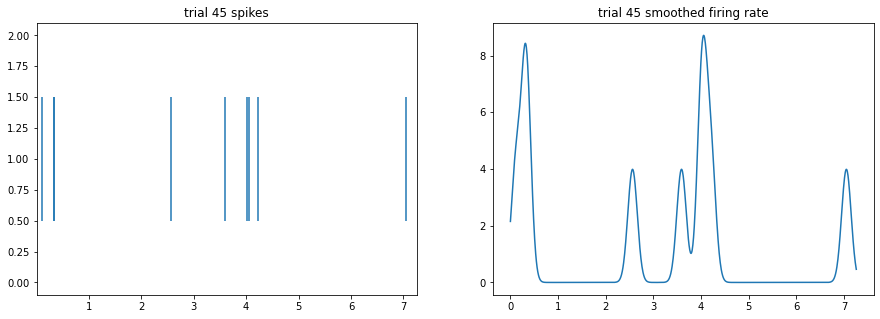

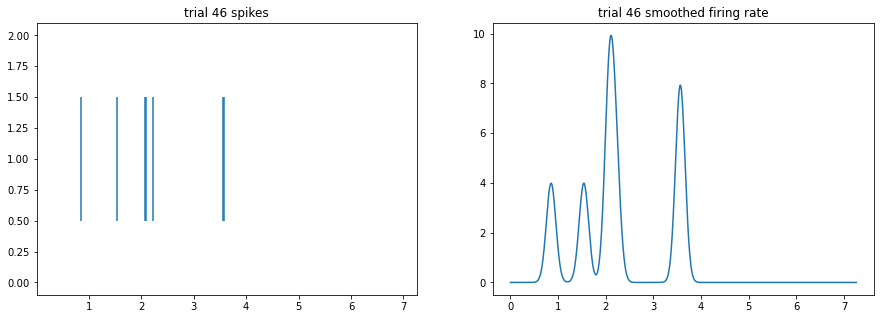

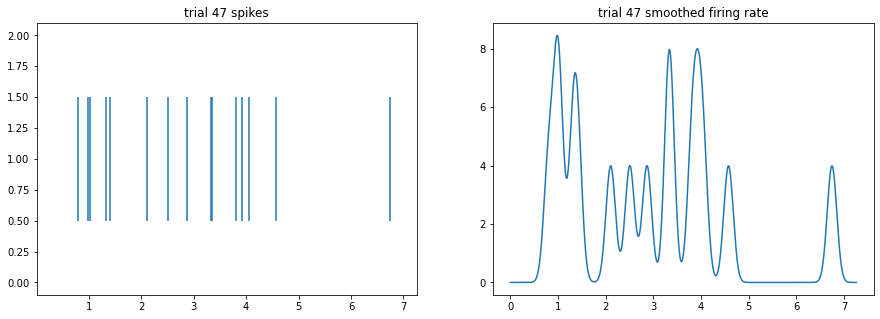

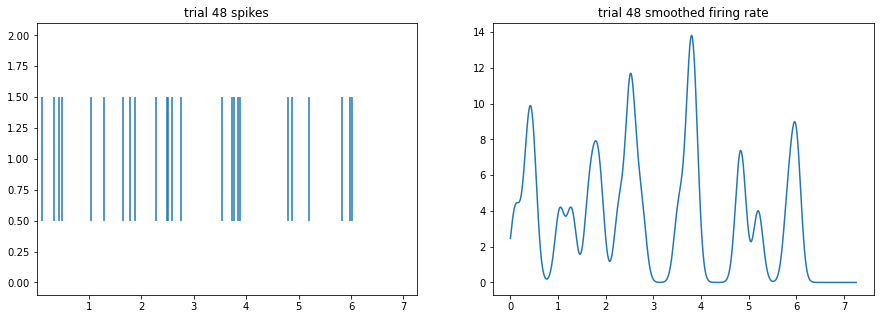

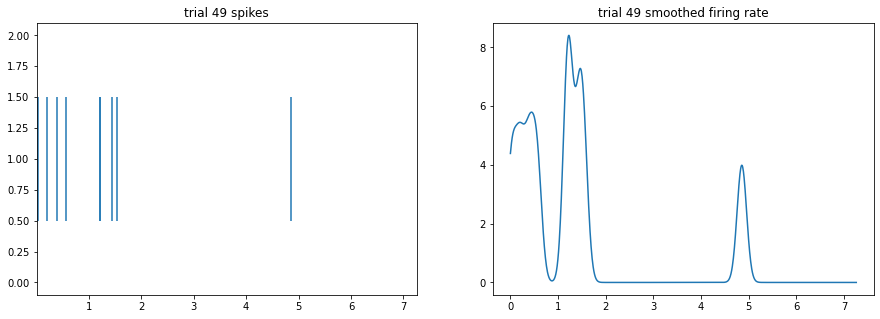

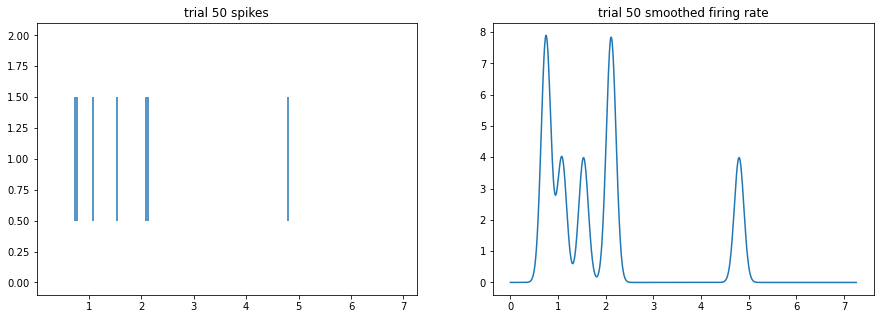

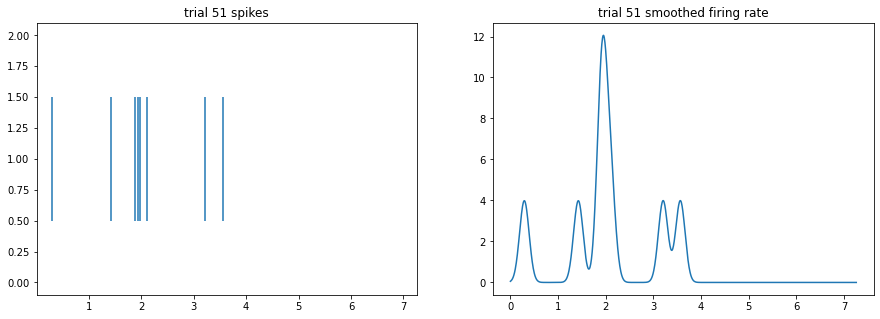

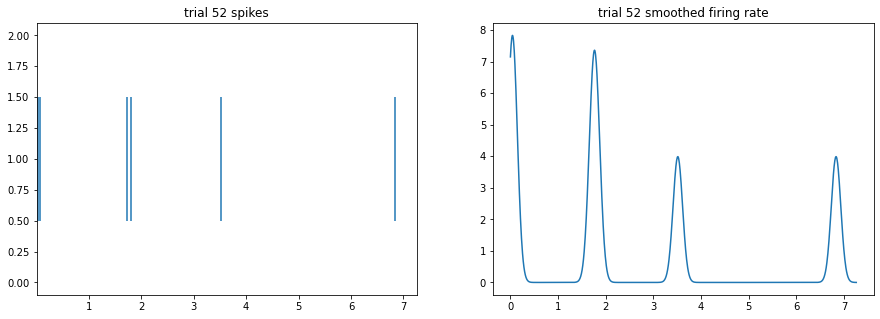

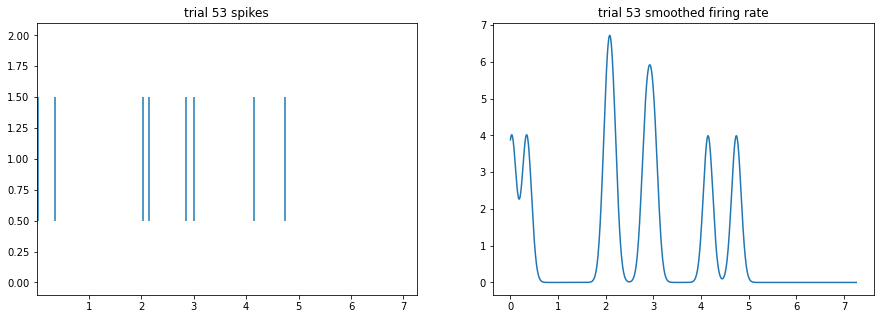

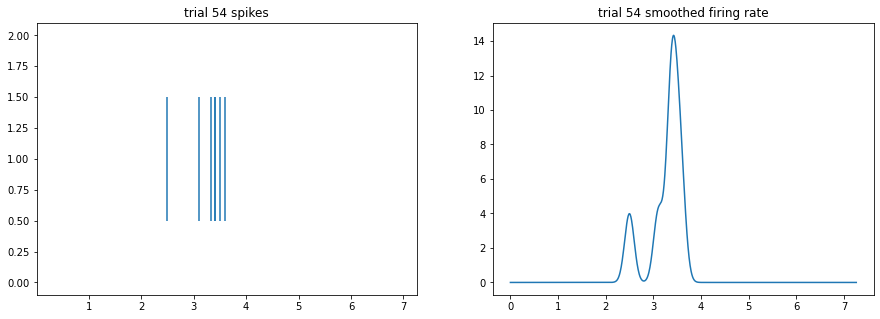

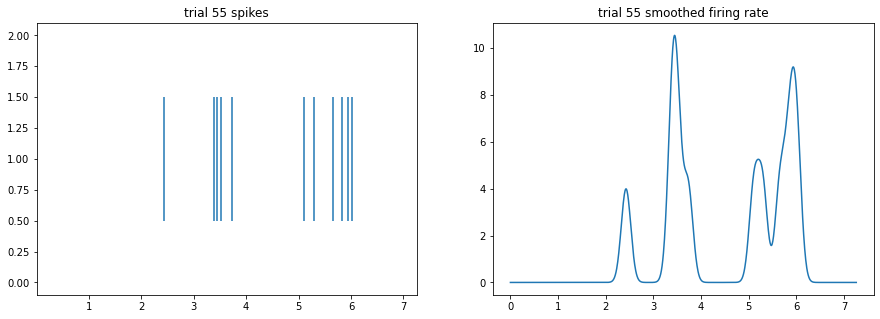

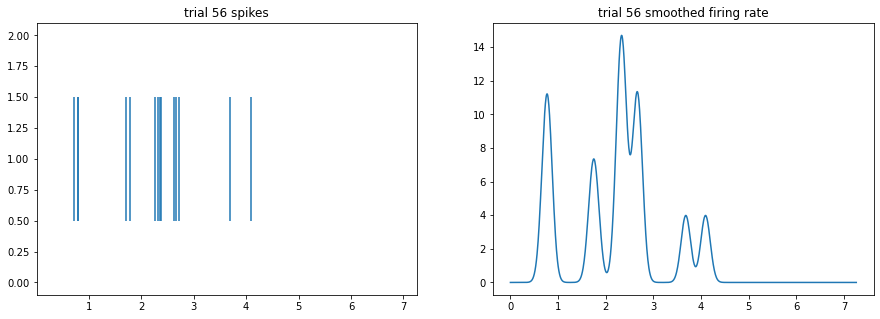

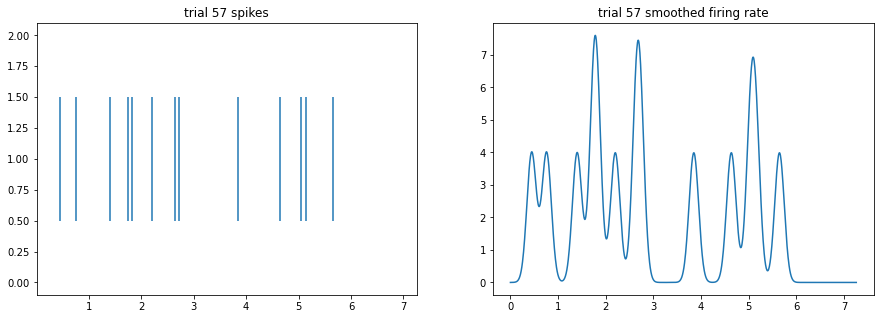

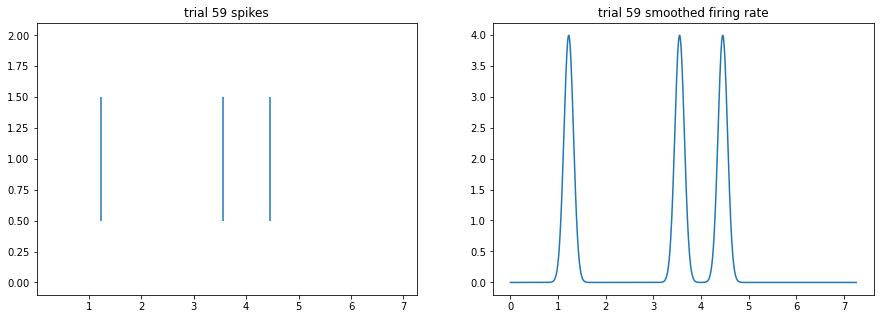

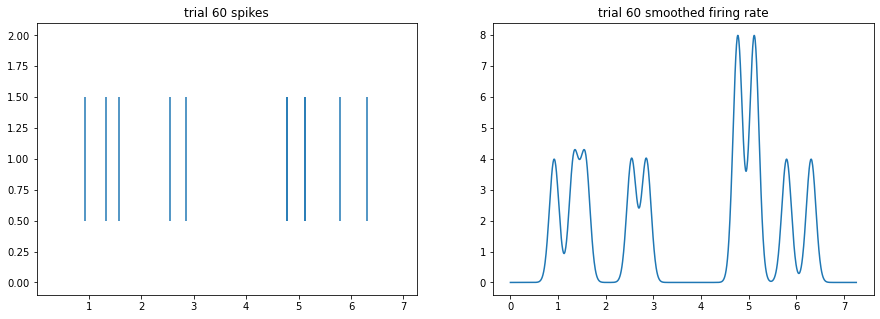

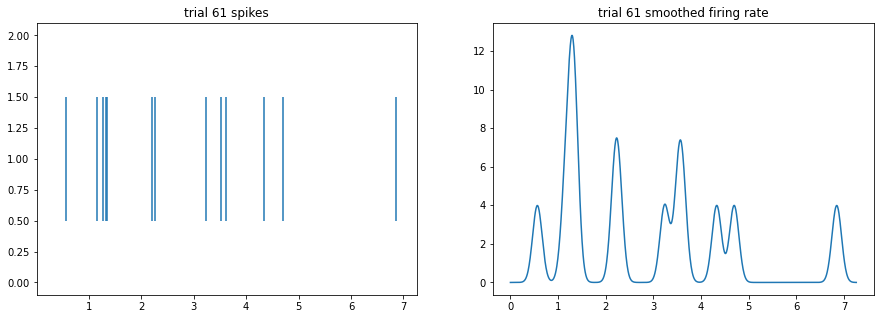

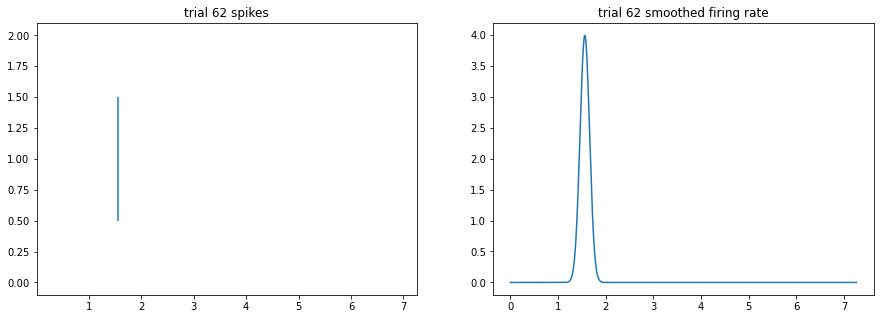

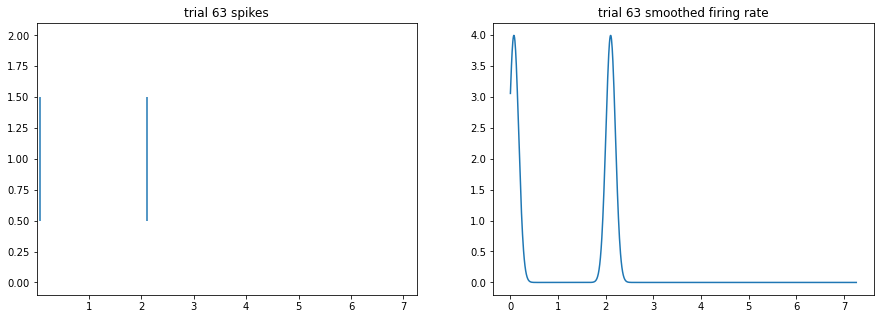

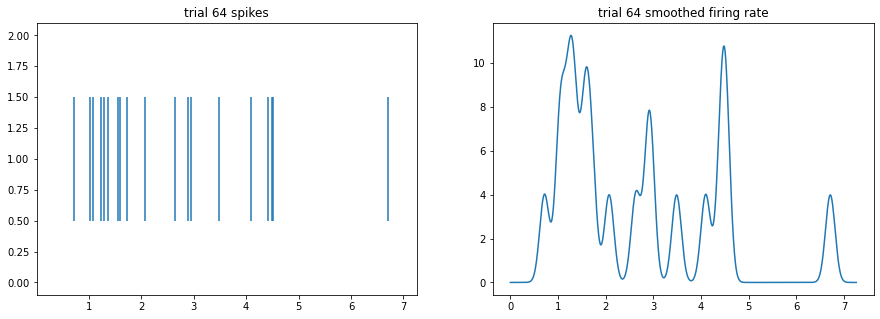

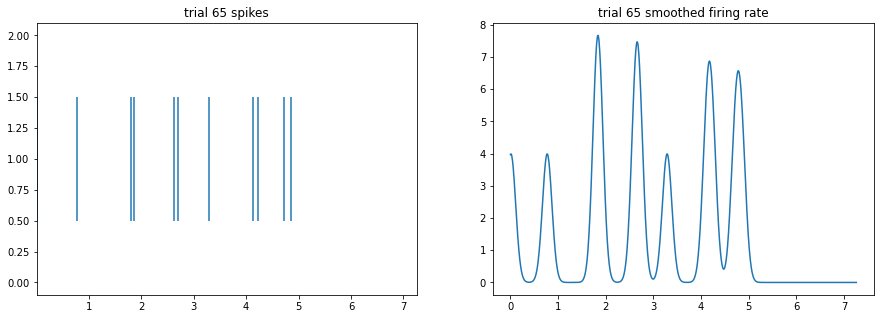

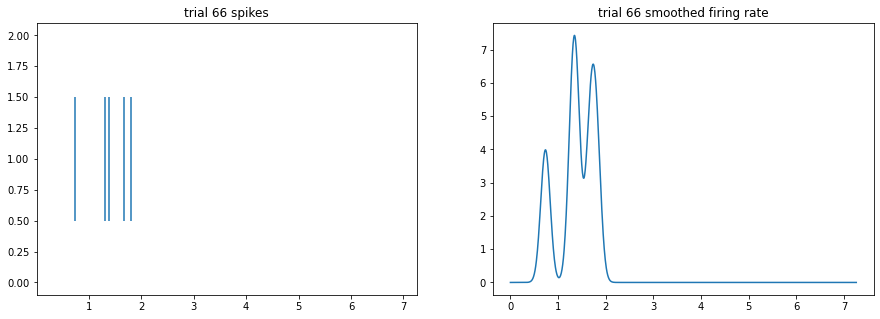

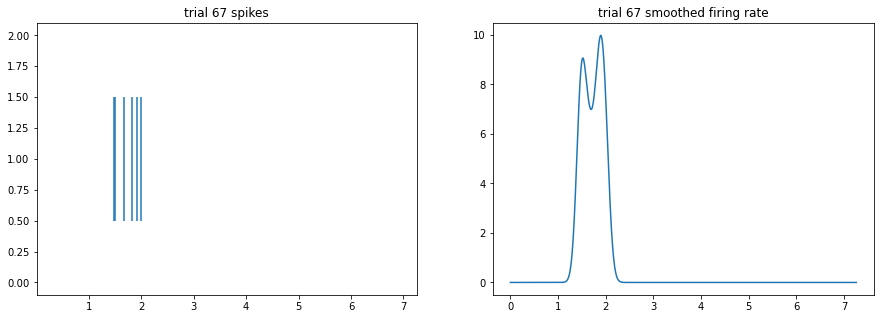

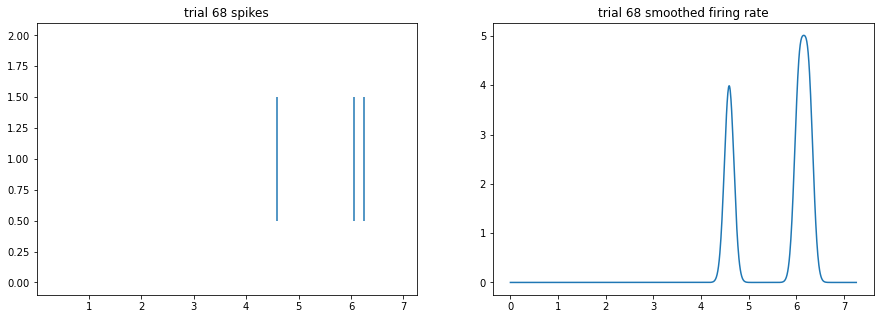

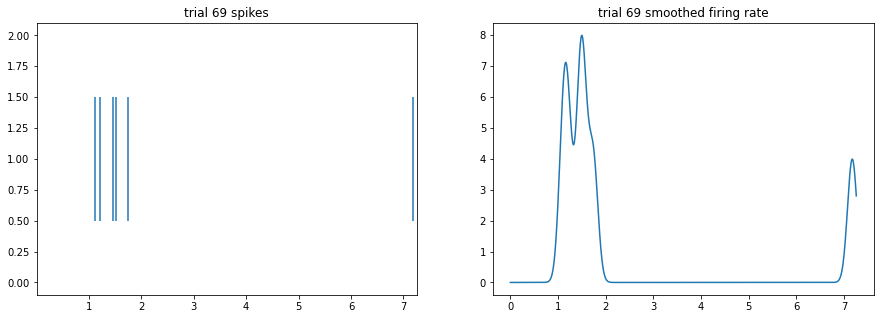

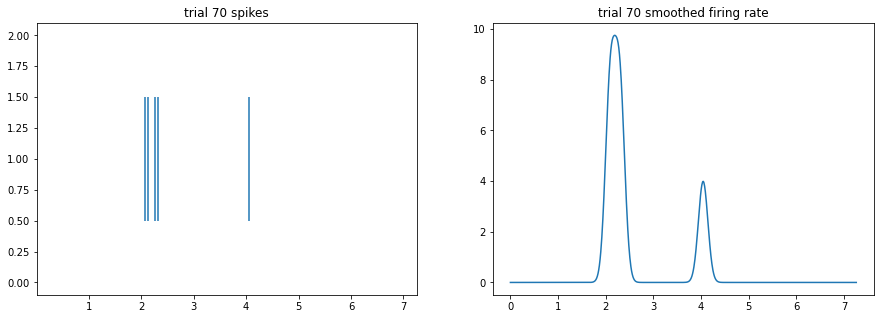

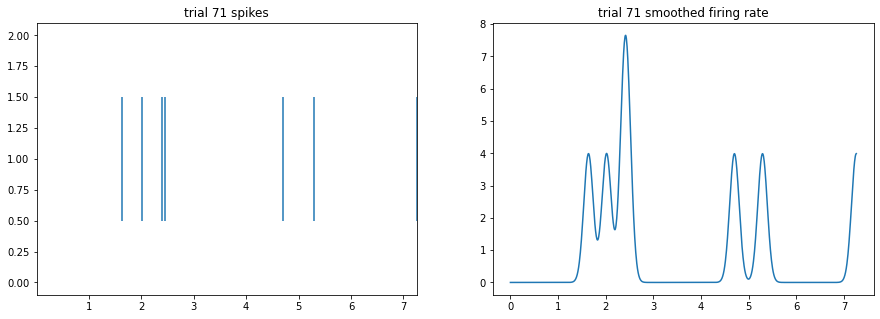

In [24]:
for i in non_zero_mask:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

    ax[0].set_title(f'trial {i} spikes')
    ax[0].eventplot(get_spike_trains_as_list(all_ST['ELV104_1_2071'])[i])
    ax[0].set_xlim(time_range)

    ax[1].set_title(f'trial {i} smoothed firing rate')
    fr = trial_fr[non_zero_mask.index(i)]
    ax[1].plot(np.linspace(time_range[0], time_range[1], len(fr)), fr)

    plt.show()

(1000,)


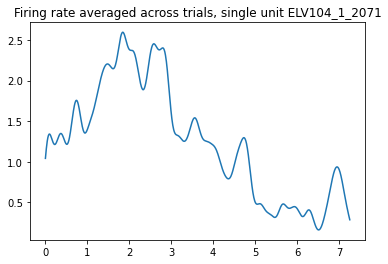

In [25]:
mean_fr = np.array(trial_fr).mean(axis=0)
print(mean_fr.shape)

plt.title('Firing rate averaged across trials, single unit ELV104_1_2071')
plt.plot(np.linspace(time_range[0], time_range[1], len(mean_fr)), mean_fr)
plt.show()

## Computing firing rates of all neurons

In [26]:
def compute_fr(spike_times_list):
    non_zero_mask = [i for i in range(len(spike_times_list)) if spike_times_list[i].shape[0]>0] # trials with zero spikes are removed

    time_range = [min([spike_times_list[i].min() for i in non_zero_mask]), max([spike_times_list[i].max() for i in non_zero_mask])]
    # time_range = [0,8]
    # print('time_range',time_range)

    trial_fr = np.array([kernel_smooth_spike_data(spike_times_list[i][0], time_range) for i in non_zero_mask])

    return trial_fr

In [27]:
X_match = []

for key, val in tqdm(all_ST.items()):
    # X_match.append(compute_fr(val).mean(axis=0))
    fr_array = compute_fr(val)
    print(fr_array.shape)
    X_match.append(fr_array)

  0%|          | 0/579 [00:00<?, ?it/s]

(90, 1000)
(79, 1000)
(67, 1000)
(89, 1000)


  1%|          | 5/579 [00:00<00:15, 36.74it/s]

(90, 1000)
(86, 1000)


  2%|▏         | 9/579 [00:00<00:19, 29.61it/s]

(88, 1000)
(89, 1000)
(87, 1000)
(31, 1000)
(89, 1000)


  2%|▏         | 14/579 [00:00<00:17, 32.93it/s]

(87, 1000)
(74, 1000)
(88, 1000)
(71, 1000)
(90, 1000)
(56, 1000)


  4%|▍         | 22/579 [00:00<00:17, 31.57it/s]

(48, 1000)
(54, 1000)
(65, 1000)
(90, 1000)
(90, 1000)
(85, 1000)
(83, 1000)
(85, 1000)


  4%|▍         | 26/579 [00:00<00:20, 26.66it/s]

(90, 1000)
(79, 1000)
(75, 1000)


  5%|▌         | 29/579 [00:01<00:26, 20.52it/s]

(90, 1000)
(89, 1000)


  6%|▌         | 33/579 [00:01<00:23, 22.91it/s]

(88, 1000)
(89, 1000)
(89, 1000)
(75, 1000)
(54, 1000)
(53, 1000)


  7%|▋         | 38/579 [00:01<00:19, 28.25it/s]

(84, 1000)
(73, 1000)


  7%|▋         | 42/579 [00:01<00:20, 26.61it/s]

(90, 1000)
(71, 1000)
(72, 1000)
(72, 1000)
(57, 1000)
(71, 1000)
(10, 1000)
(72, 1000)
(39, 1000)


  8%|▊         | 49/579 [00:01<00:17, 30.91it/s]

(70, 1000)
(72, 1000)
(71, 1000)


 10%|█         | 58/579 [00:02<00:18, 28.13it/s]

(56, 1000)
(66, 1000)
(43, 1000)
(21, 1000)
(54, 1000)
(53, 1000)
(54, 1000)
(39, 1000)
(52, 1000)


 11%|█         | 64/579 [00:02<00:15, 34.04it/s]

(41, 1000)
(52, 1000)
(53, 1000)
(35, 1000)
(52, 1000)
(46, 1000)
(90, 1000)
(84, 1000)
(44, 1000)


 13%|█▎        | 75/579 [00:02<00:13, 37.47it/s]

(90, 1000)
(43, 1000)
(47, 1000)
(43, 1000)
(49, 1000)
(51, 1000)
(52, 1000)
(46, 1000)
(43, 1000)
(49, 1000)


 14%|█▍        | 80/579 [00:02<00:18, 27.05it/s]

(90, 1000)
(88, 1000)
(55, 1000)
(45, 1000)
(34, 1000)
(54, 1000)
(24, 1000)
(55, 1000)
(53, 1000)
(24, 1000)


 16%|█▌        | 94/579 [00:03<00:13, 36.06it/s]

(54, 1000)
(54, 1000)
(53, 1000)
(27, 1000)
(25, 1000)
(67, 1000)


 17%|█▋        | 99/579 [00:03<00:14, 33.34it/s]

(72, 1000)
(8, 1000)
(88, 1000)
(85, 1000)
(83, 1000)
(81, 1000)
(69, 1000)


 18%|█▊        | 103/579 [00:03<00:20, 23.67it/s]

(84, 1000)
(90, 1000)
(90, 1000)
(89, 1000)
(54, 1000)


 20%|█▉        | 114/579 [00:03<00:14, 32.83it/s]

(54, 1000)
(49, 1000)
(54, 1000)
(13, 1000)
(33, 1000)
(54, 1000)
(50, 1000)
(54, 1000)


 21%|██        | 119/579 [00:04<00:18, 24.31it/s]

(57, 1000)
(57, 1000)
(33, 1000)
(55, 1000)
(57, 1000)
(90, 1000)
(90, 1000)
(90, 1000)


 22%|██▏       | 128/579 [00:04<00:21, 21.48it/s]

(84, 1000)
(89, 1000)
(86, 1000)
(79, 1000)
(39, 1000)
(88, 1000)
(51, 1000)
(34, 1000)


 23%|██▎       | 133/579 [00:04<00:18, 24.45it/s]

(35, 1000)
(90, 1000)
(88, 1000)
(61, 1000)
(90, 1000)
(80, 1000)


 24%|██▎       | 137/579 [00:04<00:17, 25.94it/s]

(90, 1000)
(88, 1000)
(90, 1000)


 24%|██▍       | 141/579 [00:05<00:19, 22.14it/s]

(90, 1000)
(90, 1000)
(90, 1000)


 25%|██▌       | 147/579 [00:05<00:22, 19.35it/s]

(90, 1000)
(57, 1000)
(90, 1000)
(76, 1000)
(31, 1000)


 26%|██▌       | 150/579 [00:05<00:23, 18.58it/s]

(89, 1000)
(79, 1000)
(89, 1000)
(90, 1000)
(57, 1000)


 27%|██▋       | 156/579 [00:06<00:21, 19.57it/s]

(55, 1000)
(71, 1000)
(90, 1000)
(29, 1000)
(89, 1000)


 28%|██▊       | 162/579 [00:06<00:18, 22.31it/s]

(72, 1000)
(54, 1000)
(54, 1000)
(54, 1000)
(52, 1000)
(53, 1000)


 29%|██▊       | 166/579 [00:06<00:19, 21.70it/s]

(54, 1000)
(54, 1000)
(90, 1000)


 30%|███       | 174/579 [00:06<00:14, 27.59it/s]

(90, 1000)
(90, 1000)
(71, 1000)
(82, 1000)
(69, 1000)
(56, 1000)
(42, 1000)
(90, 1000)
(87, 1000)


 31%|███       | 178/579 [00:06<00:14, 27.78it/s]

(75, 1000)
(90, 1000)
(90, 1000)
(84, 1000)


 32%|███▏      | 185/579 [00:07<00:15, 26.07it/s]

(90, 1000)
(83, 1000)
(87, 1000)
(39, 1000)
(82, 1000)
(90, 1000)
(64, 1000)
(69, 1000)


 33%|███▎      | 189/579 [00:07<00:15, 25.65it/s]

(84, 1000)
(90, 1000)
(90, 1000)


 33%|███▎      | 192/579 [00:07<00:16, 23.39it/s]

(90, 1000)
(90, 1000)


 34%|███▍      | 197/579 [00:07<00:21, 17.75it/s]

(89, 1000)
(90, 1000)
(90, 1000)
(90, 1000)
(90, 1000)


 35%|███▍      | 201/579 [00:07<00:17, 21.40it/s]

(61, 1000)
(89, 1000)
(79, 1000)
(90, 1000)


 35%|███▌      | 204/579 [00:08<00:19, 19.47it/s]

(84, 1000)
(25, 1000)
(87, 1000)
(90, 1000)


 36%|███▌      | 209/579 [00:08<00:20, 17.89it/s]

(90, 1000)
(64, 1000)
(64, 1000)
(90, 1000)
(54, 1000)


 37%|███▋      | 215/579 [00:08<00:17, 21.13it/s]

(54, 1000)
(54, 1000)
(54, 1000)
(54, 1000)
(54, 1000)
(54, 1000)
(53, 1000)
(54, 1000)
(54, 1000)


 38%|███▊      | 222/579 [00:09<00:19, 18.21it/s]

(73, 1000)
(73, 1000)
(73, 1000)
(48, 1000)
(69, 1000)
(48, 1000)
(68, 1000)


 39%|███▉      | 227/579 [00:09<00:14, 23.62it/s]

(73, 1000)
(73, 1000)


 41%|████      | 236/579 [00:10<00:21, 16.07it/s]

(72, 1000)
(90, 1000)
(59, 1000)
(37, 1000)
(89, 1000)
(83, 1000)
(35, 1000)
(87, 1000)


 41%|████▏     | 240/579 [00:10<00:35,  9.62it/s]

(88, 1000)
(90, 1000)
(88, 1000)
(70, 1000)
(77, 1000)
(29, 1000)
(83, 1000)
(70, 1000)
(48, 1000)
(54, 1000)
(54, 1000)


 44%|████▍     | 254/579 [00:11<00:16, 20.23it/s]

(54, 1000)
(21, 1000)
(53, 1000)
(40, 1000)
(37, 1000)
(25, 1000)
(53, 1000)
(45, 1000)
(90, 1000)
(85, 1000)
(90, 1000)


 45%|████▍     | 259/579 [00:11<00:20, 15.95it/s]

(88, 1000)
(84, 1000)
(56, 1000)


 45%|████▌     | 263/579 [00:12<00:28, 11.20it/s]

(76, 1000)
(18, 1000)
(90, 1000)


 46%|████▌     | 266/579 [00:12<00:35,  8.89it/s]

(85, 1000)
(88, 1000)


 46%|████▋     | 268/579 [00:13<00:34,  9.06it/s]

(90, 1000)
(71, 1000)


 47%|████▋     | 270/579 [00:13<00:36,  8.52it/s]

(90, 1000)
(85, 1000)
(90, 1000)

 47%|████▋     | 272/579 [00:13<00:34,  9.02it/s]


(77, 1000)
(50, 1000)


 47%|████▋     | 274/579 [00:13<00:33,  9.02it/s]

(90, 1000)
(81, 1000)


 48%|████▊     | 277/579 [00:14<00:57,  5.28it/s]

(72, 1000)
(90, 1000)
(71, 1000)


 49%|████▊     | 282/579 [00:15<00:34,  8.62it/s]

(27, 1000)
(47, 1000)
(36, 1000)
(54, 1000)
(53, 1000)
(42, 1000)

 49%|████▉     | 285/579 [00:15<00:29,  9.84it/s]


(54, 1000)


 50%|████▉     | 287/579 [00:15<00:27, 10.67it/s]

(54, 1000)
(20, 1000)
(53, 1000)
(49, 1000)
(54, 1000)

 51%|█████     | 293/579 [00:15<00:20, 13.95it/s]


(50, 1000)
(53, 1000)
(54, 1000)


 51%|█████     | 295/579 [00:16<00:19, 14.94it/s]

(54, 1000)
(40, 1000)
(35, 1000)
(52, 1000)
(54, 1000)
(54, 1000)

 52%|█████▏    | 299/579 [00:16<00:15, 17.65it/s]


(52, 1000)
(20, 1000)


 52%|█████▏    | 302/579 [00:16<00:23, 11.73it/s]

(72, 1000)
(72, 1000)


 53%|█████▎    | 304/579 [00:17<00:29,  9.18it/s]

(71, 1000)


 53%|█████▎    | 306/579 [00:17<00:38,  7.15it/s]

(72, 1000)
(71, 1000)


 53%|█████▎    | 307/579 [00:17<00:45,  5.97it/s]

(72, 1000)


 54%|█████▎    | 310/579 [00:18<00:45,  5.90it/s]

(72, 1000)
(71, 1000)
(50, 1000)


 54%|█████▎    | 311/579 [00:19<01:03,  4.20it/s]

(57, 1000)


 54%|█████▍    | 312/579 [00:19<01:02,  4.25it/s]

(54, 1000)
(54, 1000)


 54%|█████▍    | 314/579 [00:19<00:59,  4.47it/s]

(54, 1000)


 54%|█████▍    | 315/579 [00:19<00:59,  4.42it/s]

(54, 1000)


 55%|█████▍    | 316/579 [00:20<01:05,  4.00it/s]

(54, 1000)


 55%|█████▍    | 317/579 [00:20<01:36,  2.72it/s]

(54, 1000)


 55%|█████▌    | 320/579 [00:21<00:55,  4.67it/s]

(54, 1000)
(54, 1000)
(54, 1000)


 56%|█████▌    | 322/579 [00:21<01:02,  4.12it/s]

(54, 1000)
(54, 1000)


 56%|█████▌    | 323/579 [00:22<00:59,  4.29it/s]

(54, 1000)


 56%|█████▌    | 324/579 [00:22<01:12,  3.54it/s]

(72, 1000)
(66, 1000)


 56%|█████▋    | 326/579 [00:23<01:18,  3.21it/s]

(72, 1000)
(71, 1000)


 57%|█████▋    | 330/579 [00:23<00:45,  5.46it/s]

(72, 1000)
(72, 1000)
(69, 1000)


 58%|█████▊    | 333/579 [00:23<00:34,  7.16it/s]

(72, 1000)
(48, 1000)
(72, 1000)


 58%|█████▊    | 334/579 [00:24<00:35,  6.88it/s]

(72, 1000)


 58%|█████▊    | 335/579 [00:24<00:42,  5.79it/s]

(54, 1000)
(34, 1000)
(23, 1000)


 59%|█████▊    | 340/579 [00:25<00:36,  6.59it/s]

(48, 1000)
(54, 1000)
(54, 1000)


 59%|█████▉    | 341/579 [00:25<00:39,  5.99it/s]

(54, 1000)


 59%|█████▉    | 342/579 [00:25<00:50,  4.66it/s]

(72, 1000)


 59%|█████▉    | 343/579 [00:26<01:22,  2.87it/s]

(72, 1000)


 60%|█████▉    | 345/579 [00:27<01:07,  3.45it/s]

(72, 1000)
(72, 1000)


 60%|█████▉    | 346/579 [00:27<00:57,  4.05it/s]

(72, 1000)


 60%|██████    | 348/579 [00:27<00:57,  4.05it/s]

(72, 1000)
(72, 1000)


 60%|██████    | 349/579 [00:28<01:06,  3.45it/s]

(72, 1000)
(72, 1000)

 60%|██████    | 350/579 [00:28<00:59,  3.88it/s]

 61%|██████    | 351/579 [00:28<01:05,  3.50it/s]

(54, 1000)


 61%|██████    | 352/579 [00:28<01:02,  3.65it/s]

(53, 1000)


 61%|██████    | 353/579 [00:29<01:12,  3.14it/s]

(54, 1000)
(54, 1000)


 61%|██████▏   | 355/579 [00:30<01:20,  2.78it/s]

(54, 1000)


 62%|██████▏   | 357/579 [00:30<01:15,  2.94it/s]

(54, 1000)
(54, 1000)


 62%|██████▏   | 358/579 [00:31<02:03,  1.79it/s]

(54, 1000)
(66, 1000)


 62%|██████▏   | 361/579 [00:32<01:13,  2.96it/s]

(72, 1000)
(72, 1000)
(30, 1000)


 63%|██████▎   | 364/579 [00:32<00:45,  4.71it/s]

(84, 1000)
(88, 1000)


 63%|██████▎   | 366/579 [00:32<00:37,  5.61it/s]

(73, 1000)
(86, 1000)


 63%|██████▎   | 367/579 [00:33<00:39,  5.38it/s]

(90, 1000)


 64%|██████▎   | 368/579 [00:33<00:39,  5.28it/s]

(90, 1000)


 64%|██████▎   | 369/579 [00:33<00:44,  4.75it/s]

(75, 1000)
(90, 1000)

 64%|██████▍   | 370/579 [00:33<00:43,  4.82it/s]

 64%|██████▍   | 372/579 [00:34<00:40,  5.15it/s]

(90, 1000)
(90, 1000)


 65%|██████▍   | 375/579 [00:34<00:26,  7.64it/s]

(53, 1000)
(50, 1000)
(53, 1000)


 65%|██████▍   | 376/579 [00:36<01:35,  2.12it/s]

(53, 1000)


 65%|██████▌   | 377/579 [00:36<01:41,  1.99it/s]

(53, 1000)


 65%|██████▌   | 378/579 [00:36<01:28,  2.27it/s]

(72, 1000)


 66%|██████▌   | 380/579 [00:37<01:27,  2.27it/s]

(72, 1000)
(72, 1000)
(72, 1000)


 66%|██████▌   | 382/579 [00:38<01:18,  2.52it/s]

(72, 1000)


 66%|██████▌   | 383/579 [00:40<02:20,  1.39it/s]

(72, 1000)
(63, 1000)


 66%|██████▋   | 385/579 [00:40<01:37,  1.99it/s]

(72, 1000)
(72, 1000)


 67%|██████▋   | 387/579 [00:41<01:15,  2.54it/s]

(72, 1000)
(66, 1000)


 67%|██████▋   | 389/579 [00:41<00:59,  3.21it/s]

(72, 1000)


 67%|██████▋   | 390/579 [00:41<01:03,  2.97it/s]

(72, 1000)
(71, 1000)


 68%|██████▊   | 392/579 [00:42<01:05,  2.84it/s]

(54, 1000)
(54, 1000)


 68%|██████▊   | 395/579 [00:43<00:47,  3.84it/s]

(54, 1000)
(54, 1000)


 68%|██████▊   | 396/579 [00:44<01:36,  1.90it/s]

(54, 1000)


 69%|██████▊   | 398/579 [00:45<01:18,  2.32it/s]

(54, 1000)
(53, 1000)


 69%|██████▉   | 400/579 [00:45<00:50,  3.53it/s]

(54, 1000)
(53, 1000)


 69%|██████▉   | 401/579 [00:46<01:27,  2.03it/s]

(54, 1000)
(42, 1000)
(43, 1000)

 70%|██████▉   | 405/579 [00:46<00:41,  4.15it/s]


(26, 1000)
(89, 1000)


 70%|███████   | 406/579 [00:47<00:39,  4.39it/s]

(82, 1000)
(72, 1000)
(72, 1000)

 71%|███████   | 409/579 [00:47<00:29,  5.85it/s]


(72, 1000)
(58, 1000)


 71%|███████   | 412/579 [00:47<00:21,  7.78it/s]

(67, 1000)
(72, 1000)
(63, 1000)

 72%|███████▏  | 415/579 [00:47<00:14, 10.96it/s]


(71, 1000)
(59, 1000)


 73%|███████▎  | 420/579 [00:48<00:12, 12.92it/s]

(72, 1000)
(71, 1000)
(72, 1000)
(72, 1000)
(70, 1000)


 73%|███████▎  | 422/579 [00:48<00:11, 13.23it/s]

(72, 1000)
(54, 1000)
(30, 1000)
(72, 1000)


 74%|███████▍  | 428/579 [00:48<00:09, 15.57it/s]

(37, 1000)
(46, 1000)
(51, 1000)
(54, 1000)


 75%|███████▍  | 432/579 [00:48<00:10, 13.98it/s]

(54, 1000)
(35, 1000)
(54, 1000)
(54, 1000)


 75%|███████▍  | 434/579 [00:49<00:12, 11.19it/s]

(54, 1000)
(88, 1000)
(79, 1000)


 76%|███████▌  | 439/579 [00:49<00:10, 13.01it/s]

(83, 1000)
(55, 1000)
(87, 1000)
(18, 1000)


 76%|███████▌  | 441/579 [00:49<00:12, 11.28it/s]

(44, 1000)
(37, 1000)
(54, 1000)
(53, 1000)


 77%|███████▋  | 444/579 [00:50<00:11, 11.44it/s]

(54, 1000)
(53, 1000)
(33, 1000)
(54, 1000)
(49, 1000)


 78%|███████▊  | 452/579 [00:50<00:09, 14.09it/s]

(54, 1000)
(54, 1000)
(43, 1000)
(54, 1000)


 78%|███████▊  | 454/579 [00:50<00:10, 11.80it/s]

(54, 1000)
(52, 1000)


 79%|███████▉  | 456/579 [00:51<00:11, 10.86it/s]

(54, 1000)
(54, 1000)
(54, 1000)


 79%|███████▉  | 460/579 [00:51<00:14,  8.10it/s]

(54, 1000)
(52, 1000)
(54, 1000)


 80%|███████▉  | 461/579 [00:51<00:14,  8.17it/s]

(54, 1000)
(54, 1000)
(17, 1000)
(52, 1000)
(29, 1000)


 81%|████████  | 469/579 [00:52<00:07, 14.30it/s]

(54, 1000)
(54, 1000)
(42, 1000)
(48, 1000)
(42, 1000)


 81%|████████▏ | 471/579 [00:52<00:08, 12.67it/s]

(48, 1000)
(47, 1000)


 83%|████████▎ | 478/579 [00:53<00:06, 14.80it/s]

(48, 1000)
(45, 1000)
(47, 1000)
(48, 1000)
(32, 1000)
(47, 1000)
(54, 1000)
(54, 1000)


 83%|████████▎ | 481/579 [00:53<00:09,  9.83it/s]

(54, 1000)
(54, 1000)


 84%|████████▍ | 488/579 [00:53<00:06, 13.92it/s]

(54, 1000)
(39, 1000)
(52, 1000)
(54, 1000)
(15, 1000)
(54, 1000)
(49, 1000)


 85%|████████▌ | 494/579 [00:54<00:05, 16.49it/s]

(54, 1000)
(54, 1000)
(54, 1000)
(39, 1000)
(53, 1000)
(53, 1000)


 86%|████████▌ | 497/579 [00:54<00:04, 18.06it/s]

(53, 1000)
(53, 1000)
(48, 1000)


 86%|████████▋ | 500/579 [00:54<00:06, 13.14it/s]

(53, 1000)
(53, 1000)
(37, 1000)


 87%|████████▋ | 504/579 [00:55<00:05, 12.73it/s]

(54, 1000)
(54, 1000)
(54, 1000)
(53, 1000)


 88%|████████▊ | 510/579 [00:55<00:03, 19.05it/s]

(37, 1000)
(20, 1000)
(36, 1000)
(53, 1000)
(51, 1000)
(55, 1000)
(54, 1000)
(36, 1000)
(43, 1000)


 90%|████████▉ | 520/579 [00:55<00:02, 27.53it/s]

(33, 1000)
(55, 1000)
(55, 1000)
(49, 1000)
(55, 1000)
(54, 1000)
(54, 1000)
(53, 1000)


 91%|█████████ | 527/579 [00:56<00:03, 16.47it/s]

(54, 1000)
(44, 1000)
(48, 1000)
(54, 1000)
(54, 1000)


 92%|█████████▏| 530/579 [00:56<00:02, 17.93it/s]

(54, 1000)
(54, 1000)
(54, 1000)
(54, 1000)
(11, 1000)


 93%|█████████▎| 536/579 [00:56<00:02, 17.71it/s]

(54, 1000)
(54, 1000)
(54, 1000)
(47, 1000)


 93%|█████████▎| 539/579 [00:56<00:02, 15.17it/s]

(54, 1000)
(54, 1000)
(54, 1000)
(52, 1000)
(54, 1000)
(46, 1000)


 94%|█████████▍| 546/579 [00:57<00:01, 18.86it/s]

(54, 1000)
(54, 1000)
(56, 1000)
(56, 1000)
(56, 1000)


 95%|█████████▍| 549/579 [00:57<00:01, 20.24it/s]

(56, 1000)
(55, 1000)
(56, 1000)
(23, 1000)
(43, 1000)
(54, 1000)
(54, 1000)
(51, 1000)


 97%|█████████▋| 559/579 [00:57<00:00, 25.48it/s]

(52, 1000)
(54, 1000)
(53, 1000)
(54, 1000)
(54, 1000)
(48, 1000)


 98%|█████████▊| 567/579 [00:57<00:00, 26.58it/s]

(54, 1000)
(45, 1000)
(54, 1000)
(38, 1000)
(72, 1000)
(72, 1000)
(69, 1000)
(72, 1000)


 98%|█████████▊| 570/579 [00:58<00:00, 14.16it/s]

(72, 1000)


 99%|█████████▉| 573/579 [00:58<00:00, 11.62it/s]

(53, 1000)
(64, 1000)
(72, 1000)
(60, 1000)


100%|██████████| 579/579 [01:00<00:00,  9.62it/s]

(57, 1000)
(54, 1000)
(54, 1000)
(39, 1000)
(54, 1000)


In [29]:
X_match = np.array(X_match)
print(X_match[0].shape)
X_match= X_match.reshape((X_match.shape[2], X_match.shape[1], X_match.shape[0]))

(90, 1000)


IndexError: tuple index out of range

In [ ]:
X_match.shape

In [30]:
# Repeating for non-match trials

ELV_df = metadata[metadata.Filename.str.contains('ELV')]
post_training_non_match_trials = ELV_df[(ELV_df.IsMatch==0.0) & (ELV_df.Training=='POST')]

cue_directions = [i for i in range(9)]
# cue_directions = [0]

all_non_match_ST = retrieve_ST_data_from_metadata(post_training_non_match_trials, cue_directions)

X_non_match = []

for key, val in tqdm(all_non_match_ST.items()):
    X_non_match.append(compute_fr(val).mean(axis=0))

X_non_match = np.array(X_non_match)
X_non_match= X_non_match.reshape((X_non_match.shape[1], X_non_match.shape[0]))

100%|██████████| 579/579 [00:31<00:00, 18.66it/s]


In [31]:
X_non_match.shape

(1000, 579)

## PCA

In [32]:
from sklearn.decomposition import PCA

In [33]:
X_match_mean_subtracted = X_match.copy()
X_non_match_mean_subtracted = X_non_match.copy()

X_match_mean_subtracted = X_match_mean_subtracted - X_match_mean_subtracted.mean()
X_non_match_mean_subtracted = X_non_match_mean_subtracted - X_non_match_mean_subtracted.mean()

ValueError: operands could not be broadcast together with shapes (90,1000) (79,1000) 

In [ ]:
stacked_X = np.vstack((X_match_mean_subtracted, X_non_match_mean_subtracted))
stacked_X.shape

In [ ]:
# Computing PCA

pca = PCA(n_components=8)
x_pca = pca.fit_transform(np.array(trial_fr).reshape((1000,71))) # flattened trials and timepoints, reducing dimensionality of units
# x_pca = pca.fit_transform(stacked_X) # flattened trials and timepoints, reducing dimensionality of units

# x_pca = pca.fit_transform(np.swapaxes(RNN_firing_rates_centered[:,:,5], 1,0)) # one hidden unit, all timepoints, all trials
x_pca.shape

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

x_range = [x for x in range(0, len(explained_variance_ratio))]
x_range_labels = [x+1 for x in range(0, len(explained_variance_ratio))]
plt.plot(x_range, explained_variance_ratio, marker='o')
plt.xticks(ticks=x_range,labels=x_range_labels)
plt.xlabel('Number of Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

In [ ]:
# trials_to_plot = [i for i in range(50)]
# trials_to_plot = [45]
# trials_to_plot = [5,6,0,11]
# trials_to_plot = match_trials[0]
# trials_to_plot = [6,10,13,14,16,18,21,22,28,32] # double reversal trials, all match trials

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection="3d")

# Set the axis labels
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")


trajectories_collected = []
# for i in trials_to_plot:
pc_space_points = pca.transform(np.array(trial_fr).reshape((1000,71)))
# pc_space_points = pca.transform(X_match_mean_subtracted)
ax.scatter(pc_space_points[:,0], pc_space_points[:,1], pc_space_points[:,2], c='black')
# pc_space_points = pca.transform(X_non_match_mean_subtracted)
# ax.scatter(pc_space_points[:,0], pc_space_points[:,1], pc_space_points[:,2], c='red')
    # ax.scatter(pc_space_points[:,0][delay_mask], pc_space_points[:,1][delay_mask], pc_space_points[:,2][delay_mask], s=5.5, c='blue')
    # ax.scatter(pc_space_points[:,0][stim_1_mask], pc_space_points[:,1][stim_1_mask], pc_space_points[:,2][stim_1_mask], s=5.5, c='r')
    # ax.scatter(pc_space_points[:,0][stim_2_mask], pc_space_points[:,1][stim_1_mask], pc_space_points[:,2][stim_2_mask], s=5.5, c='r')
    # ax.scatter(pc_space_points[:,0][decision_time_mask], pc_space_points[:,1][decision_time_mask], pc_space_points[:,2][decision_time_mask], s=5.5, c='g')
    # trajectories_collected.append(pc_space_points[:,:3])
# trajectories_collected = np.array(trajectories_collected)
# print('trajectories_collected shape',trajectories_collected.shape)
# trials_to_plot = non_match_trials[0]
# for i in trials_to_plot:
#     pc_space_points = pca.transform(RNN_firing_rates[i,:,:])
#     ax.plot(pc_space_points[:,0], pc_space_points[:,1], pc_space_points[:,2], c='red')

plt.show()

## Finding neurons shared between trials

In [103]:
# SEARCHED_DF = post_training_match_trials
# SEARCHED_DF = post_training_non_match_trials
SEARCHED_DF = metadata

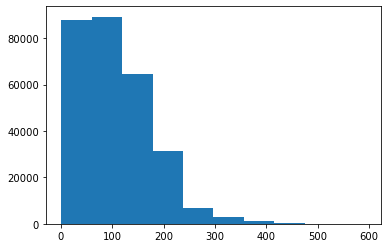

In [104]:
plt.hist(SEARCHED_DF.trialnum.to_list())
plt.show()

In [105]:
candidate_trials = SEARCHED_DF.trialnum.unique()
len(candidate_trials)

481

In [106]:
SEARCHED_DF[SEARCHED_DF.trialnum==22].Neuron.unique().shape

(1511,)

In [107]:
SEARCHED_DF.Neuron.unique().shape

(2112,)

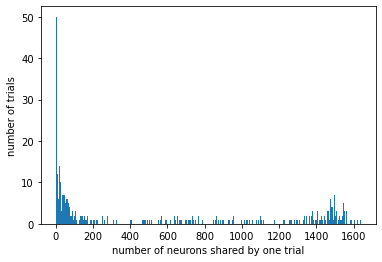

In [108]:
trial_shared_neurons_nums = []
for trial in candidate_trials:
    num = SEARCHED_DF[SEARCHED_DF.trialnum==trial].Neuron.unique().shape[0]
    trial_shared_neurons_nums.append(num)
    # print(f'trial {trial} is shared between {num} neurons')
plt.hist(trial_shared_neurons_nums,bins=len(trial_shared_neurons_nums))
plt.xlabel('number of neurons shared by one trial')
plt.ylabel('number of trials')
plt.show()

In [109]:
# get the indices of trials which have more than 100 neurons
trial_shared_neurons_nums_arr = np.array(trial_shared_neurons_nums)
np.where(trial_shared_neurons_nums_arr>100)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [110]:
trial_shared_neurons_nums_arr # numbers of neurons for each of trial numbers

array([1428, 1511, 1546, 1559, 1328, 1463, 1481, 1443,  864,  628,  671,
        253, 1425, 1407, 1486, 1499, 1618, 1291, 1421, 1229,  716,  638,
        466,  166, 1336, 1406, 1394, 1555, 1522, 1475, 1588, 1487,  735,
        472,  280,  170, 1496, 1473, 1541, 1492, 1554, 1483, 1333, 1264,
        927,  787,  725,  223, 1255, 1481, 1496, 1487, 1554, 1384, 1382,
       1346,  996,  713,  572,  311, 1521, 1473, 1522, 1548, 1499, 1375,
       1345, 1106,  857,  751,  494,  302, 1381, 1406, 1375, 1497, 1465,
       1603, 1173,  989,  588,  500,  400,  334, 1402, 1545, 1531, 1637,
       1559, 1502, 1099,  952,  900,  845,  766,  662, 1378, 1414, 1486,
       1501, 1444, 1465, 1145,  949,  742,  712,  562,  453, 1337, 1552,
       1552, 1387, 1459, 1175,  895,  873,  736, 1490, 1468, 1257,  507,
        362, 1476, 1545, 1604, 1509,  883,  513,  610, 1544, 1551, 1502,
       1363,  956,  652, 1261, 1499, 1528, 1380, 1057,  956,  614,  594,
        569, 1547, 1474, 1495, 1365, 1224, 1078,  6

In [111]:
candidate_trials_arr = np.array(candidate_trials)
chosen_candidate_trials_arr = candidate_trials_arr[np.where(trial_shared_neurons_nums_arr>100)]

In [112]:
chosen_candidate_trials_arr # trial numbers which have more than 100 neurons

array([ 13,  22,  34,  54,  82,  85,  90, 112, 177, 196, 197, 241,   8,
        12,  35,  42, 121, 126, 128, 139, 198, 201, 214, 240,   5,   6,
        27,  72,  83,  89, 104, 120, 184, 219, 229, 244,  33,  44,  53,
        57,  96, 101, 127, 134, 164, 176, 181, 239,   2,  24,  31,  43,
        95, 111, 129, 133, 166, 200, 209, 230,  20,  45,  69,  71, 119,
       125, 130, 145, 168, 182, 218, 231,  18,  23,  50,  56,  84, 103,
       143, 158, 208, 210, 222, 227,  11,  19,  68,  80, 108, 118, 140,
       157, 161, 163, 183, 195,  39,  48,  62,  70, 105, 113, 142, 153,
       175, 189, 212, 220,  15,  58,  79,  97, 100, 138, 165, 169, 187,
       109, 131, 136, 215, 223,  21,  25,  86,  88, 160, 204, 207,  73,
        94,  98, 135, 156, 191,   3,  17,  46,  59, 148, 170, 202, 203,
       211,  52,  55,  78, 132, 137, 151, 180,  38,  41, 154, 185, 217,
         9,  49,  77, 141, 147, 149, 159, 178, 192,  63,  81,  87, 116,
       172, 190,  60,  92, 144, 155, 162, 237, 238, 262,   4,  1

In [113]:
# saving the actual IDs of neurons from trials above into numpy arrays
sets_of_neurons_from_trials = []
for trial in chosen_candidate_trials_arr:
    sets_of_neurons_from_trials.append(np.array(SEARCHED_DF[SEARCHED_DF.trialnum==trial].Neuron.unique()))
    
len(sets_of_neurons_from_trials)

270

In [114]:
import itertools

def find_shared_minimum(arrays):
    if len(arrays) == 0:
        return []

    # Convert the arrays into sets for easier intersection
    sets = [set(array) for array in arrays]

    # Calculate the intersection of all sets
    shared_numbers = set.intersection(*sets)

    # Convert the set back to a sorted numpy array
    result = np.array(sorted(shared_numbers))
    return result

# def find_arrays_with_max_shared_set(arrays):
#     max_shared_size = 0
#     arrays_with_max_shared_set = []

#     for r in tqdm(range(1, len(arrays) + 1), 'Searching for a maximum set of trials shared between neurons'):
#         for combination in itertools.combinations(arrays, r):
#             shared_set = find_shared_minimum(combination)
#             shared_size = len(shared_set)

#             if shared_size > max_shared_size:
#                 max_shared_size = shared_size
#                 arrays_with_max_shared_set = combination

#     return arrays_with_max_shared_set

"""
itertools.combinations:
Return successive r-length combinations of elements in the iterable.
combinations(range(4), 3) --> (0,1,2), (0,1,3), (0,2,3), (1,2,3)
"""

def find_shared_set_of_trials_and_neurons(arrays):
    
    max_neuron_set_size_so_far = 0
    max_neuron_set_so_far = []
    max_numpy_arr_indices_combination = ()
    
    for r in range(len(arrays), 1, -1):
        i = 1

        has_maximum_set_been_updated_for_this_combination = False

        for indices_combination in tqdm(itertools.combinations(range(len(arrays)), r), f'Searching for a maximum set of {r} trials shared between neurons'):

            numpy_arr_indices_combination = np.array(indices_combination)
            trial_set_combination = list(np.array(arrays)[numpy_arr_indices_combination])

            # Finding the shared neuron set between the chosen trial set
            shared_neuron_set_found = find_shared_minimum(trial_set_combination) 
            shared_neuron_set_found_size = len(shared_neuron_set_found)
            # print(f'Combination #{i} of {len(indices_combination)} trials = set of {shared_neuron_set_found_size} neurons')

            if shared_neuron_set_found_size > max_neuron_set_size_so_far:
                
                print(f'Combination #{i} of {len(indices_combination)} trials = set of {shared_neuron_set_found_size} neurons')
                
                max_neuron_set_size_so_far = shared_neuron_set_found_size
                max_neuron_set_so_far = shared_neuron_set_found
                max_numpy_arr_indices_combination = numpy_arr_indices_combination
                print('MAXIMUM SET UPDATED')
                has_maximum_set_been_updated_for_this_combination = True
                
                
                if max_numpy_arr_indices_combination.shape[0]<max_neuron_set_size_so_far:
                    print('STOPPING because trials < neurons in the set')
                    return max_numpy_arr_indices_combination, max_neuron_set_so_far

            i+=1
        # print('=== === ===')

        # # If there has been no maximum set update after we decreased the number of selected trials by one, we stop
        # # Because we want to maximise the number of trials used
        # if not has_maximum_set_been_updated_for_this_combination and max_neuron_set_size_so_far != 0:
        #     return max_numpy_arr_indices_combination, max_neuron_set_so_far
        
    return max_numpy_arr_indices_combination, max_neuron_set_so_far

In [115]:
shared_trial_set_inds, shared_neuron_set = find_shared_set_of_trials_and_neurons(sets_of_neurons_from_trials[:10])
print(shared_trial_set_inds, shared_neuron_set)

Searching for a maximum set of 10 trials shared between neurons: 0it [00:00, ?it/s]C:\Users\sarfi\AppData\Local\Temp\ipykernel_22436\3348998931.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  trial_set_combination = list(np.array(arrays)[numpy_arr_indices_combination])
Searching for a maximum set of 10 trials shared between neurons: 0it [00:00, ?it/s]

Combination #1 of 10 trials = set of 48 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set
[0 1 2 3 4 5 6 7 8 9] [1120 1122 1126 1127 1135 1136 1137 1270 1271 1272 1273 1280 1281 1282
 1429 1430 1431 1432 1434 1435 1436 1437 1438 1439 1440 1634 1635 1636
 1637 1638 1639 1640 1641 1689 1690 1692 1693 1694 1695 1696 1697 2007
 2008 3000 3001 3002 5481 5482]


In [116]:
results = {}

for i in range(20):
    inds = np.random.choice(np.arange(len(sets_of_neurons_from_trials)), size=15)
    chosen_sets = list(np.array(sets_of_neurons_from_trials)[inds])
    shared_trial_set_inds, shared_neuron_set = find_shared_set_of_trials_and_neurons(chosen_sets)
    # print(shared_trial_set_inds, shared_neuron_set)
    results[i] = [inds, shared_trial_set_inds, shared_neuron_set]

C:\Users\sarfi\AppData\Local\Temp\ipykernel_22436\3623805005.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  chosen_sets = list(np.array(sets_of_neurons_from_trials)[inds])
Searching for a maximum set of 15 trials shared between neurons: 0it [00:00, ?it/s]C:\Users\sarfi\AppData\Local\Temp\ipykernel_22436\3348998931.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  trial_set_combination = list(np.array(arrays)[numpy_arr_indices_combination])
Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 662.08it/s]
Searching for a

Combination #148 of 12 trials = set of 4 neurons
MAXIMUM SET UPDATED



Searching for a maximum set of 11 trials shared between neurons: 450it [00:00, 1394.10it/s]


Combination #451 of 11 trials = set of 15 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 993.20it/s]
Searching for a maximum set of 14 trials shared between neurons: 15it [00:00, 829.62it/s]
Searching for a maximum set of 13 trials shared between neurons: 105it [00:00, 1056.34it/s]


Combination #81 of 13 trials = set of 7 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 12 trials shared between neurons: 317it [00:00, 1097.10it/s]


Combination #200 of 12 trials = set of 8 neurons
MAXIMUM SET UPDATED
Combination #318 of 12 trials = set of 32 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 500.45it/s]
Searching for a maximum set of 14 trials shared between neurons: 15it [00:00, 928.77it/s]
Searching for a maximum set of 13 trials shared between neurons: 105it [00:00, 1142.79it/s]
Searching for a maximum set of 12 trials shared between neurons: 344it [00:00, 1080.57it/s]

Combination #122 of 12 trials = set of 1 neurons
MAXIMUM SET UPDATED
Combination #305 of 12 trials = set of 10 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 12 trials shared between neurons: 455it [00:00, 1110.42it/s]
Searching for a maximum set of 11 trials shared between neurons: 1365it [00:01, 1260.64it/s]
Searching for a maximum set of 10 trials shared between neurons: 2801it [00:02, 1351.66it/s]


Combination #2802 of 10 trials = set of 12 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 973.38it/s]


Combination #1 of 15 trials = set of 7 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 14 trials shared between neurons: 0it [00:00, ?it/s]


Combination #1 of 14 trials = set of 67 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 1000.31it/s]
Searching for a maximum set of 14 trials shared between neurons: 14it [00:00, 696.52it/s]


Combination #15 of 14 trials = set of 27 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 992.73it/s]
Searching for a maximum set of 14 trials shared between neurons: 15it [00:00, 1426.50it/s]
Searching for a maximum set of 13 trials shared between neurons: 105it [00:00, 1582.96it/s]
Searching for a maximum set of 12 trials shared between neurons: 0it [00:00, ?it/s]

Combination #7 of 12 trials = set of 1 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 12 trials shared between neurons: 455it [00:00, 1424.53it/s]
Searching for a maximum set of 11 trials shared between neurons: 1365it [00:00, 1795.77it/s]

Combination #1013 of 11 trials = set of 4 neurons
MAXIMUM SET UPDATED



Searching for a maximum set of 10 trials shared between neurons: 339it [00:00, 1768.90it/s]


Combination #264 of 10 trials = set of 8 neurons
MAXIMUM SET UPDATED
Combination #340 of 10 trials = set of 14 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 505.28it/s]
Searching for a maximum set of 14 trials shared between neurons: 15it [00:00, 724.28it/s]
Searching for a maximum set of 13 trials shared between neurons: 92it [00:00, 784.10it/s]

Combination #90 of 13 trials = set of 8 neurons
MAXIMUM SET UPDATED
Combination #93 of 13 trials = set of 14 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set



Searching for a maximum set of 15 trials shared between neurons: 0it [00:00, ?it/s]


Combination #1 of 15 trials = set of 32 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 397.49it/s]
Searching for a maximum set of 14 trials shared between neurons: 15it [00:00, 854.93it/s]
Searching for a maximum set of 13 trials shared between neurons: 105it [00:00, 893.23it/s]
Searching for a maximum set of 12 trials shared between neurons: 383it [00:00, 1004.69it/s]


Combination #384 of 12 trials = set of 27 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 992.50it/s]
Searching for a maximum set of 14 trials shared between neurons: 15it [00:00, 746.85it/s]
Searching for a maximum set of 13 trials shared between neurons: 105it [00:00, 948.48it/s]
Searching for a maximum set of 12 trials shared between neurons: 350it [00:00, 1133.45it/s]

Combination #209 of 12 trials = set of 3 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 12 trials shared between neurons: 455it [00:00, 1118.29it/s]
Searching for a maximum set of 11 trials shared between neurons: 376it [00:00, 1257.04it/s]

Combination #141 of 11 trials = set of 7 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 11 trials shared between neurons: 803it [00:00, 1171.80it/s]


Combination #490 of 11 trials = set of 8 neurons
MAXIMUM SET UPDATED
Combination #804 of 11 trials = set of 16 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 1000.31it/s]
Searching for a maximum set of 14 trials shared between neurons: 15it [00:00, 934.96it/s]


Combination #2 of 14 trials = set of 5 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 13 trials shared between neurons: 105it [00:00, 866.27it/s]


Combination #68 of 13 trials = set of 7 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 12 trials shared between neurons: 210it [00:00, 973.16it/s]


Combination #211 of 12 trials = set of 14 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 499.80it/s]


Combination #1 of 15 trials = set of 12 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 14 trials shared between neurons: 3it [00:00, 571.87it/s]


Combination #4 of 14 trials = set of 20 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 397.26it/s]
Searching for a maximum set of 14 trials shared between neurons: 15it [00:00, 822.83it/s]
Searching for a maximum set of 13 trials shared between neurons: 95it [00:00, 1062.50it/s]


Combination #96 of 13 trials = set of 18 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 523.76it/s]


Combination #1 of 15 trials = set of 6 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 14 trials shared between neurons: 15it [00:00, 854.88it/s]


Combination #10 of 14 trials = set of 11 neurons
MAXIMUM SET UPDATED
Combination #15 of 14 trials = set of 13 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 13 trials shared between neurons: 66it [00:00, 863.44it/s]


Combination #67 of 13 trials = set of 15 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 333.07it/s]


Combination #1 of 15 trials = set of 9 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 14 trials shared between neurons: 2it [00:00, 306.70it/s]


Combination #3 of 14 trials = set of 38 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 843.58it/s]
Searching for a maximum set of 14 trials shared between neurons: 15it [00:00, 894.32it/s]


Combination #13 of 14 trials = set of 12 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 13 trials shared between neurons: 70it [00:00, 1017.52it/s]


Combination #71 of 13 trials = set of 38 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 999.83it/s]
Searching for a maximum set of 14 trials shared between neurons: 15it [00:00, 878.24it/s]


Combination #11 of 14 trials = set of 8 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 13 trials shared between neurons: 46it [00:00, 956.46it/s]

Combination #47 of 13 trials = set of 17 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set



Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 397.45it/s]


Combination #1 of 15 trials = set of 1 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 14 trials shared between neurons: 7it [00:00, 604.16it/s]


Combination #5 of 14 trials = set of 8 neurons
MAXIMUM SET UPDATED
Combination #6 of 14 trials = set of 9 neurons
MAXIMUM SET UPDATED
Combination #7 of 14 trials = set of 13 neurons
MAXIMUM SET UPDATED
Combination #8 of 14 trials = set of 25 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 499.50it/s]
Searching for a maximum set of 14 trials shared between neurons: 15it [00:00, 1068.21it/s]
Searching for a maximum set of 13 trials shared between neurons: 105it [00:00, 1113.89it/s]

Combination #10 of 13 trials = set of 1 neurons
MAXIMUM SET UPDATED
Combination #95 of 13 trials = set of 10 neurons
MAXIMUM SET UPDATED



Searching for a maximum set of 12 trials shared between neurons: 0it [00:00, ?it/s]

Combination #4 of 12 trials = set of 12 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 12 trials shared between neurons: 455it [00:00, 1168.25it/s]
Searching for a maximum set of 11 trials shared between neurons: 4it [00:00, 1070.11it/s]


Combination #5 of 11 trials = set of 13 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


Searching for a maximum set of 15 trials shared between neurons: 1it [00:00, 499.74it/s]
Searching for a maximum set of 14 trials shared between neurons: 15it [00:00, 935.89it/s]
Searching for a maximum set of 13 trials shared between neurons: 105it [00:00, 1019.11it/s]
Searching for a maximum set of 12 trials shared between neurons: 0it [00:00, ?it/s]

Combination #46 of 12 trials = set of 1 neurons
MAXIMUM SET UPDATED


Searching for a maximum set of 12 trials shared between neurons: 84it [00:00, 924.08it/s]

Combination #85 of 12 trials = set of 13 neurons
MAXIMUM SET UPDATED
STOPPING because trials < neurons in the set


In [117]:
[f'From {i[0].shape[0]} trials selected randomly, {i[1].shape[0]} share {i[2].shape[0]} neurons' for i in results.values()]

['From 15 trials selected randomly, 11 share 15 neurons',
 'From 15 trials selected randomly, 12 share 32 neurons',
 'From 15 trials selected randomly, 10 share 12 neurons',
 'From 15 trials selected randomly, 14 share 67 neurons',
 'From 15 trials selected randomly, 14 share 27 neurons',
 'From 15 trials selected randomly, 10 share 14 neurons',
 'From 15 trials selected randomly, 13 share 14 neurons',
 'From 15 trials selected randomly, 15 share 32 neurons',
 'From 15 trials selected randomly, 12 share 27 neurons',
 'From 15 trials selected randomly, 11 share 16 neurons',
 'From 15 trials selected randomly, 12 share 14 neurons',
 'From 15 trials selected randomly, 14 share 20 neurons',
 'From 15 trials selected randomly, 13 share 18 neurons',
 'From 15 trials selected randomly, 13 share 15 neurons',
 'From 15 trials selected randomly, 14 share 38 neurons',
 'From 15 trials selected randomly, 13 share 38 neurons',
 'From 15 trials selected randomly, 13 share 17 neurons',
 'From 15 tria

In [133]:
# actual trial numbers selected:

row_chosen = 3
final_chosen_trials = chosen_candidate_trials_arr[results[row_chosen][0][results[row_chosen][1]]]
print(final_chosen_trials)

# actual neuron set chosen

final_chosen_neurons = results[row_chosen][2]
print(final_chosen_neurons)

[ 52 214  61 107 171  64 207  40  34 108 189  34  85 108]
[1120 1122 1126 1127 1135 1136 1137 1294 1295 1296 1297 1298 1299 1301
 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453 1454
 1455 1456 1457 1458 1459 1460 1553 1554 1555 1557 1558 1559 1560 1561
 1787 1788 1789 1790 1791 1792 1793 1794 1795 1796 1797 1799 1800 1801
 1802 5429 5430 5431 5432 5433 5434 5435 5437 5438 5439]


In [134]:
metadata[metadata.trialnum.isin(final_chosen_trials)].trialnum.unique().tolist()

[34, 85, 214, 108, 189, 207, 52, 171, 107, 64, 40, 61]

In [119]:
with open(f'Monkey_data_neuron_sets_20_random_choices_of_15_trials.pkl', 'wb') as fff:
    pickle.dump(results, fff)